# Bayesian A/B Testing 🚀
A/B test with Bayesian!
1. AB testing is a randomized experiment: for example we divide users in 2 group (A and B)
2. Expose each group to a different version of something (ex website layout)
3. compare which group scores better on some metric (CTR)

## A/B testing: frequentist way 📍
- based on hypothesis testing
- check wether A and B performed the same or not
- does not say how much better is A and B

## A/B testing: Bayesian approach 🗳️
- calculate posterior click-through rates for website layouts A and B and compare them
- directly calculate the probability that A is better than B
- quantify how much better it is
- estimate expected loss in case we make a wrong decision


mainly the source is from datacamp bayesian course

now lets do A/b testing: bayesion approach:
1. when a user lands on the website, there are two scenarios:
- click (success)
- no click (failure)

2. use binomial distribution! (probability of success = click rate)

we can simulate beta posterior:
we know that if the prior is Beta(a,b), then the posterior is Beta(x,y) with:
x = NumberOfSuccesses + a
y = NumberOfObservations - NumberOfSuccesses + b

here is the function for simulate beta posterior:

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
  num_succeses = np.sum(trials)
  posterior_draws = np.random.beta(
      num_succeses + beta_prior_a,
      len(trials) - num_succeses + beta_prior_b,
      10000
  )
  return posterior_draws

### Comparing posterior 📐

In [ ]:
#for example we have A and B version, we have the click data
A_clicks = [0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0]
B_clicks = [1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,1]

In [ ]:
#simulate posterior draws for each layout
A_posterior = simulate_beta_posterior(A_clicks,1,1)
B_posterior = simulate_beta_posterior(B_clicks,1,1)

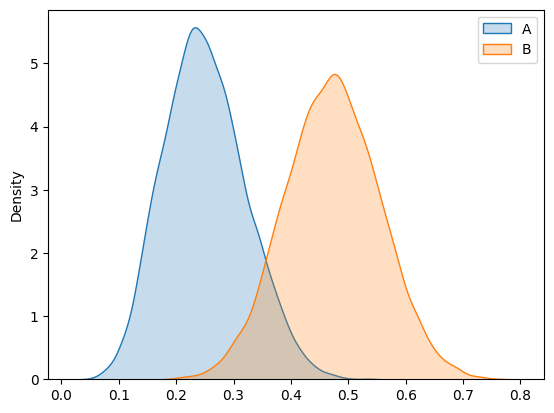

In [ ]:
#plot posterior
sns.kdeplot(A_posterior, fill=True,legend=True)
sns.kdeplot(B_posterior, fill=True,legend=True)
plt.legend(["A","B"])
plt.show()

#B seems to be better!

### Comparing Posterior
we can substract one from the other to calculate the posterior difference between click rates. its very likely to positive, which corresponds to B being better.

to get the explicit probability of B being better than A, we can create a boolean array that is true when B is better and False otherwise, and compute its mean.



<ipython-input-31-818ae0338f98>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff, shade=True, label="difference: A-B")


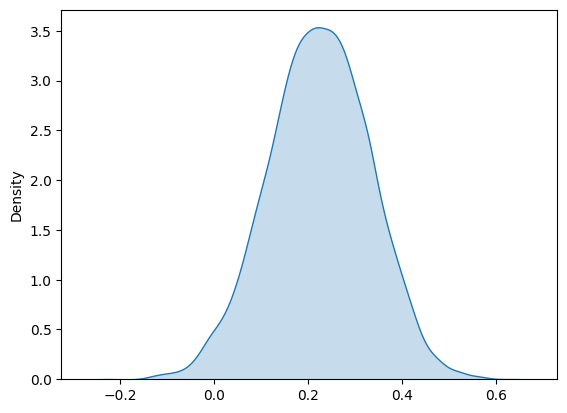

In [ ]:
#posterior difference between B and A:
diff = B_posterior - A_posterior
sns.kdeplot(diff, shade=True, label="difference: A-B")
plt.show()

In [ ]:
#Probability of B being better:
#here there is 97% probability that the B website layout is better!
print((diff > 0).mean())

0.9778


# Expected Loss 📋
if we deploy the worse website version, how many clicks do we lose?


In [ ]:
#difference (B-A) when A is better
loss = diff[diff < 0] #we take the rare cases where A is better than B
loss

array([-3.89913075e-03, -8.34282034e-03, -6.64525360e-02, -1.12860872e-02,
       -1.81034379e-02, -1.28580816e-01, -1.07280537e-01, -2.80712736e-02,
       -2.88670006e-02, -4.90873356e-02, -2.26689918e-01, -2.92097555e-02,
       -1.12928172e-01, -1.04325558e-02, -4.62944103e-02, -1.02407708e-01,
       -4.69337768e-02, -3.51394773e-03, -1.87282953e-02, -1.00847751e-02,
       -3.26199867e-02, -9.03091430e-03, -7.63130548e-03, -6.09581785e-02,
       -6.28476296e-02, -6.60508249e-02, -5.61347072e-02, -1.09927103e-02,
       -3.69532993e-02, -2.74828977e-02, -8.78945188e-02, -3.43937860e-02,
       -1.35198469e-01, -1.63133547e-02, -1.10650145e-02, -8.14714250e-03,
       -2.05459503e-02, -4.07493545e-02, -7.07414301e-02, -1.29067876e-01,
       -2.56894120e-02, -4.40956192e-02, -9.51906144e-02, -1.73783415e-02,
       -1.80428168e-02, -2.91919598e-02, -2.98752189e-02, -1.64422560e-03,
       -1.45140975e-01, -9.24477251e-03, -4.75018766e-03, -1.38438332e-01,
       -1.06587754e-02, -

In [ ]:
#expected average loss
expected_loss = loss.mean()
print(expected_loss)

#this is mean if we deploy version B, which we know better with 96% probability,
#but the 4% risk materializes an it turns out A was better, we will only lose 3.9
#percentage points in the click-through rate

-0.03958843952415395


# More A/B Testing Case! 🔆

In [ ]:
#imagined we have the data of coin tosses, 1 is head 0 tail
tosses = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

Lets recall that if the prior is beta(a,b), then the posterior is beta(x,y) with:

x = NumberOfHeads + a

y = NumberOfTosses - NumberOfHeads + b

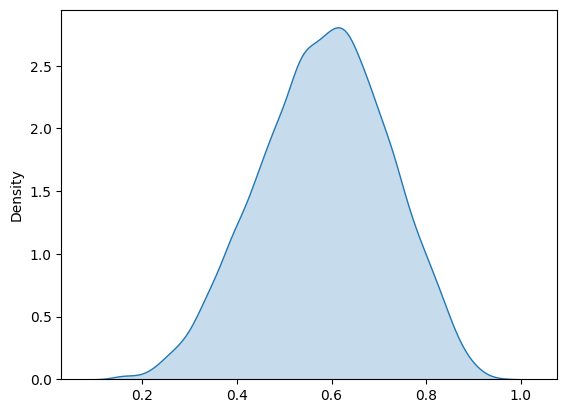

In [ ]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a,
  len(tosses) - num_successes + beta_prior_b,
  10000)

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)
plt.show()

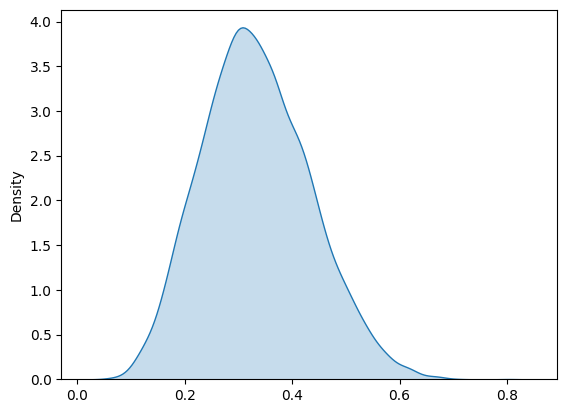

In [ ]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a,
  len(tosses) - num_successes + beta_prior_b,
  10000)

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)
plt.show()

Now you see what simulate_beta_posterior() is doing: based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. Let's move on to A/B testing!

# Marketing Case 💠
so the current condition, the current CTR for the previous ads has been around 15% recently, with results varying between 5% and 30%. now based on this we decided using Beta(10,50) for a prior.



In [ ]:
#we have ads data from kaggle
ads = pd.read_csv('/content/ads.csv')

In [ ]:
ads.head()

,user_id,product,site_version,time,banner_clicked
0,f500b9f27ac611426935de6f7a52b71f,clothes,desktop,2019-01-28 16:47:08,0
1,cb4347c030a063c63a555a354984562f,sneakers,mobile,2019-03-31 17:34:59,0
2,89cec38a654319548af585f4c1c76b51,clothes,mobile,2019-02-06 09:22:50,0
3,1d4ea406d45686bdbb49476576a1a985,sneakers,mobile,2019-05-23 08:07:07,0
4,d14b9468a1f9a405fa801a64920367fe,clothes,mobile,2019-01-28 08:16:37,0


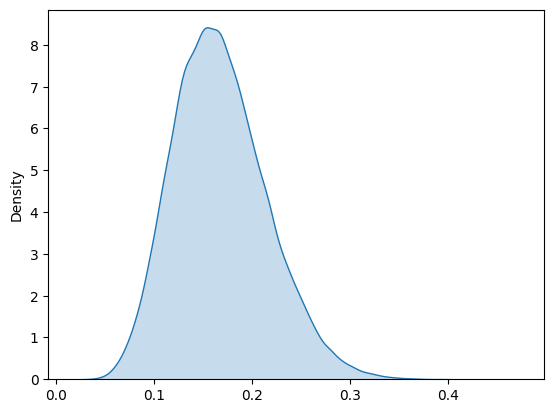

In [ ]:
# we generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, fill=True, label="prior")
plt.show()

In [ ]:
# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]

In [ ]:
print(clothes_clicked)

0       0
2       0
4       0
5       0
7       0
       ..
9994    0
9995    0
9996    0
9997    0
9998    0
Name: banner_clicked, Length: 5028, dtype: int64


In [ ]:
# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

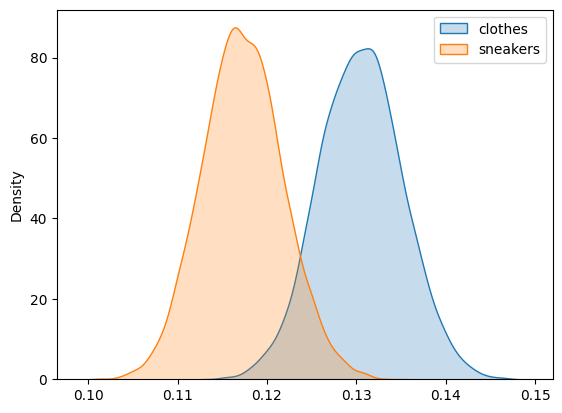

In [ ]:
sns.kdeplot(clothes_posterior, fill=True, label="clothes")
sns.kdeplot(sneakers_posterior, fill=True, label="sneakers")
plt.legend(["clothes","sneakers"])
plt.show()
plt.show()

It is more probable that clothes ads are better, but we are not completely sure about it 🤔. We cannot be sure about it, since the two posteriors overlap, so it is actually possible for the sneakers campaign to be bettter. But how likely is it? Let's find out!

Now we see that clothes ads are likely to have a higher click ratio than sneakers ads. but what is the **exact probability** that this is the case? to solve this, we will have to calculate the posterior difference between clothes and sneakers click rates.

then we will need to calculate a credible interval for difference to measure the uncertainty in the estimate.

and we will calculate the percentage of cases where this difference is positiveand average it, which corresponds to clothes click rate being higher.

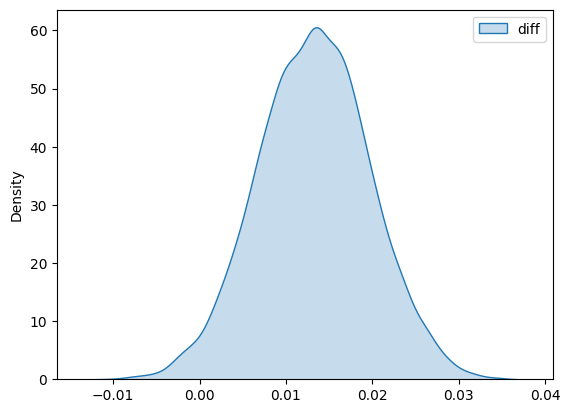

In [ ]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, fill=True, label="diff")
plt.legend(["diff"])
plt.show()

In [ ]:
import arviz as az

In [ ]:
interval = az.hdi(diff, hdi_prob=0.9)
print(interval)

[0.00265253 0.02390519]


In [ ]:
clothes_better_prob = (diff > 0).mean()
print(clothes_better_prob)

0.9783


Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk? Let's find out!

we have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?

**The answer to this is the expected loss: ** the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, we only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.



In [ ]:
# Slice diff to take only cases where it is negative
loss = diff[diff < 0]

expected_loss = loss.mean()
print(expected_loss)

-0.0024079702671525646


 You can sefely roll out the clothes campaign to a larger audience. You are 98% sure it has a higher click rare, and even if the 2% risk of this being a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!  🙌

# Decision Analysis 🎃

lets learn about decision analysis!

Decision makers care about maximizing profit, reducing cost and saving lives. for example there is a drug that has 99% efficacy rate 99%. but this drug is so expensive and the goverment cannot afford it. but there are other drugs, that has 98% efficacy and more affordable. with htis more affordable drugs goverment could save more lives!

so in simple terms decision analysis -> translating parameters to relevant metrics for the decision makers.

**from posterior to decisions** ✍️

for example, wwe have a sampled from the posterior distribution of a model paramete of CTR. but the compny does not interested in the CTR, but rather in the revenue the clicks generate.

now what we can do is we can multiply each draw from the posterior with the number of impression, and then multiply the result with the expected reveneue -> as a result you obtain posterior distribution of the revenue generated by the clicks.

so posterior of ctr -> impression -> we get the number of clicks -> multiply by revenue -> esteimated reveneu.


# Posterior Revenue 🧵

In [1]:
clothest_posterior = [0.13151752,0.13658993,0.13155845,0.12451643,0.12649299,0.12437261,
0.13631368,0.12866166,0.12811428,0.13200447,0.12914138,0.13064773,
0.13151113,0.12519855,0.1373195,0.13163545,0.13222222,0.13047999,
0.12592151,0.12659457,0.1294131,0.13275908,0.13044929,0.12792047,
0.13407496,0.12272906,0.13691942,0.13575685,0.13578776,0.12330317,
0.13043444,0.12655403,0.13374727,0.12906791,0.12886411,0.12651213,
0.12523621,0.13147398,0.12904184,0.13785669,0.1305624,0.12811066,
0.13044669,0.13456108,0.13288469,0.13546834,0.13898383,0.12880977,
0.1248231,0.12604745,0.13375466,0.12870651,0.13193385,0.13124275,
0.13578987,0.13297731,0.1369603,0.13289568,0.13173064,0.12892945,
0.1308933,0.12414545,0.12512948,0.12899505,0.12771462,0.12919837,
0.12708388,0.13299279,0.13040137,0.13194723,0.1328914,0.13264225,
0.12737047,0.12650095,0.1308242,0.12695341,0.13754452,0.13086573,
0.13507317,0.12981472,0.13421707,0.13346701,0.13549283,0.11612937,
0.14055882,0.13116694,0.12883344,0.12817636,0.13287805,0.12935508,
0.12165921,0.12671406,0.121363,0.12779202,0.13405073,0.12692488,
0.13104937,0.12771006,0.12502384,0.12727926,0.13311129,0.13515664,
0.11896733,0.12511644,0.12769187,0.13002806,0.1250528,0.13141772,
0.13741458,0.13575893,0.12917276,0.13294731,0.12305343,0.13215795,
0.12741733,0.13365045,0.13471168,0.13410733,0.1316624,0.13402973,
0.13531599,0.13315282,0.12488267,0.12607823,0.13082834,0.13104844,
0.13320014,0.12891609,0.12291613,0.13915561,0.12879806,0.13202057,
0.12803918,0.13828582,0.13363446,0.13640715,0.13177483,0.12615191,
0.13393562,0.12946906,0.12960665,0.12801275,0.12760083,0.1255416,
0.13174779,0.12433433,0.13372573,0.13693224,0.12570653,0.13458265,
0.12102152,0.1304531,0.13470878,0.1225099,0.14455485,0.12635305,
0.13080231,0.13741757,0.12861074,0.13205966,0.12296513,0.13061211,
0.13069562,0.13373866,0.12489585,0.12810009,0.13295734,0.13233025,
0.12600928,0.12979692,0.13546025,0.1301397,0.1296813,0.13623071,
0.11961566,0.13231616,0.13161629,0.12714681,0.12483911,0.13747307,
0.13888144,0.12619622,0.13528813,0.12848098,0.12841251,0.13172409,
0.13160859,0.13621435,0.14032888,0.13355225,0.13152606,0.12952313,
0.13585297,0.13340833,0.12642978,0.12890717,0.13025116,0.13375554,
0.12901003,0.13659362,0.13102096,0.11970384,0.1292194,0.13025251,
0.13322313,0.1328957,0.13313367,0.13958721,0.12407546,0.13368276,
0.13558232,0.13943329,0.12629053,0.13441967,0.13054712,0.1298331,
0.12769849,0.1317994,0.12706173,0.13135086,0.13213701,0.12565285,
0.13214855,0.12535964,0.12930507,0.12313546,0.12367896,0.1293029,
0.12704551,0.12810804,0.12244891,0.14207974,0.13171743,0.13174255,
0.12586644,0.12793447,0.12317133,0.12468818,0.12102384,0.1344549,
0.14035662,0.12943778,0.12898567,0.12569995,0.13071668,0.12206109,
0.12992092,0.13078655,0.12248301,0.12308769,0.12314476,0.12877373,
0.13878544,0.13371159,0.12581036,0.13037559,0.12958879,0.13066149,
0.11803093,0.12863093,0.12960627,0.13734396,0.12665027,0.13214679,
0.12366903,0.14273487,0.12512144,0.12295756,0.12853121,0.13206596,
0.13378991,0.13207156,0.12309171,0.12722224,0.13376075,0.131431,
0.12975275,0.12726886,0.13943958,0.13097548,0.13263668,0.13265731,
0.12469044,0.13645208,0.13940444,0.12810794,0.12319457,0.13351614,
0.12760052,0.12219058,0.13175914,0.13243534,0.12625364,0.13226582,
0.13310795,0.13194991,0.12901087,0.13082819,0.1349884,0.12825355,
0.13115288,0.1248065,0.126285,0.12350456,0.12612256,0.13173328,
0.13477564,0.12702473,0.13900599,0.12364518,0.12364441,0.13081756,
0.13334446,0.12697688,0.12688854,0.13049515,0.13229195,0.11907452,
0.12837183,0.12600566,0.12919999,0.12164133,0.12785012,0.14655452,
0.13073817,0.12994594,0.13831843,0.13379875,0.14245081,0.13739134,
0.12483752,0.12551609,0.12847414,0.13451574,0.13309023,0.12973771,
0.12989835,0.12745754,0.12814779,0.13496141,0.12424673,0.12345439,
0.12736649,0.13341158,0.13084687,0.13038948,0.13095429,0.12660479,
0.12970859,0.12763295,0.12943524,0.13502707,0.13079139,0.13670413,
0.12750931,0.133018,0.12586467,0.13467082,0.12938322,0.12066412,
0.13294504,0.135138,0.13856089,0.13498088,0.13241585,0.13234017,
0.13049545,0.13009091,0.12890406,0.13905704,0.13542292,0.13025211,
0.13750983,0.1344355,0.13209475,0.13391105,0.13167091,0.12929536,
0.12694454,0.11782459,0.14165749,0.13080832,0.13233224,0.12288776,
0.13279727,0.13174914,0.13379338,0.13857826,0.12946166,0.13732942,
0.12700632,0.12834351,0.13583911,0.13151761,0.12811422,0.13737119,
0.1339281,0.13052409,0.11858848,0.13088732,0.13384972,0.13871918,
0.1249418,0.12932079,0.1366123,0.13772977,0.13262115,0.13306568,
0.12748369,0.13078877,0.13794108,0.12826146,0.13075023,0.12673215,
0.13366999,0.13156846,0.11852828,0.12817018,0.13384455,0.14023759,
0.1298181,0.13195864,0.13140754,0.13578018,0.12603091,0.13487405,
0.13909867,0.13310075,0.13620052,0.13394397,0.13095326,0.12737204,
0.12269695,0.13381894,0.12789619,0.13719679,0.12766878,0.12741931,
0.13382611,0.1323925,0.14161464,0.12453561,0.12802144,0.12610116,
0.1278425,0.13557776,0.13378214,0.12738598,0.13233539,0.13254305,
0.14019432,0.12433771,0.12501994,0.13367678,0.12878049,0.13350754,
0.12868862,0.1375704,0.13775097,0.13025302,0.12892909,0.12988425,
0.1244419,0.13081067,0.12838824,0.13358233,0.13648356,0.13405178,
0.13265694,0.12802641,0.1240379,0.13438399,0.13140038,0.13269587,
0.1319336,0.13777176,0.12883525,0.12607267,0.13234837,0.1288759,
0.13083557,0.12984001,0.12969011,0.1407377,0.13401789,0.12073516,
0.13895017,0.13522214,0.13147046,0.13240414,0.13219765,0.126715,
0.13276979,0.13190995,0.12926603,0.12798264,0.11900431,0.13108044,
0.13339229,0.12953955,0.13394471,0.14439693,0.13160478,0.12604471,
0.13578265,0.1255643,0.13293092,0.12734815,0.13039242,0.12094311,
0.12870259,0.12645648,0.1321758,0.13028235,0.13392316,0.12667469,
0.1278413,0.13697737,0.1251034,0.13091811,0.12519472,0.13194807,
0.13145792,0.12414304,0.12530077,0.12406149,0.13053553,0.12656235,
0.12955961,0.13363885,0.13052679,0.13200453,0.14108054,0.13787238,
0.12684666,0.12998068,0.13847541,0.13388275,0.12884294,0.13396173,
0.11891237,0.1414799,0.12862998,0.12586985,0.12761873,0.13239837,
0.13383941,0.12217014,0.14492825,0.13204499,0.12769608,0.12164029,
0.12248558,0.13464123,0.12610488,0.13649323,0.13830394,0.13374907,
0.13019116,0.13328395,0.13249267,0.13326239,0.13102346,0.13531886,
0.12778671,0.12665348,0.12358701,0.130543,0.1279982,0.13384807,
0.12735445,0.12641344,0.13619697,0.13076924,0.1351976,0.13071059,
0.1291482,0.12767095,0.13776789,0.13819445,0.13046203,0.13440349,
0.13249072,0.13208508,0.13458085,0.13623121,0.13136825,0.13333253,
0.12228954,0.13087987,0.1357904,0.13230612,0.13304091,0.12190968,
0.12631999,0.13247679,0.13069248,0.13146404,0.12713662,0.13874425,
0.13521832,0.13319039,0.12433845,0.12420502,0.12764362,0.13768897,
0.13371049,0.12948372,0.1265443,0.12705328,0.13256461,0.1274137,
0.12912675,0.13828484,0.12461599,0.1335367,0.13370599,0.13120335,
0.12901513,0.13582351,0.13356897,0.13144245,0.13717209,0.13035986,
0.1356133,0.12537242,0.12675096,0.12897996,0.13445448,0.12905145,
0.13534277,0.12601008,0.13408666,0.13772685,0.13004247,0.14336566,
0.13144956,0.12585519,0.13119616,0.12779327,0.14088785,0.12186165,
0.12860737,0.13068035,0.13113605,0.12590689,0.12857325,0.13016544,
0.12224797,0.1304298,0.13429388,0.13310168,0.12842355,0.13303573,
0.13139118,0.12758184,0.13045361,0.13351507,0.13019104,0.13207118,
0.13743901,0.13746747,0.12620424,0.13380983,0.13962925,0.1301916,
0.12126769,0.12596008,0.12646585,0.13112499,0.13164363,0.13127794,
0.12727537,0.13089038,0.12211452,0.1323684,0.12442028,0.13105014,
0.13021947,0.12791124,0.13001225,0.13049431,0.13717774,0.13095066,
0.12836792,0.13521951,0.12589816,0.13292804,0.12719313,0.13102479,
0.1335979,0.12926667,0.12155136,0.13561707,0.12530464,0.12031048,
0.13671071,0.13238419,0.1307678,0.12327704,0.13975025,0.13229544,
0.13748808,0.12244972,0.13824609,0.13153457,0.14048209,0.12994045,
0.13775252,0.12770637,0.13776061,0.1382142,0.1319929,0.12833942,
0.13515028,0.12905181,0.13540898,0.12961906,0.1352636,0.13002295,
0.12470086,0.12752801,0.12573703,0.12260933,0.1307757,0.12936037,
0.12607663,0.12671848,0.13601287,0.1243802,0.1243658,0.13291845,
0.13125,0.13588927,0.13151127,0.12292328,0.13171172,0.13118864,
0.13474786,0.13692353,0.12977669,0.1379959,0.12561549,0.12451209,
0.13228195,0.12869142,0.13897304,0.13178615,0.13611845,0.12314104,
0.12968726,0.12894518,0.1311019,0.13423142,0.12632611,0.12827882,
0.12881358,0.12579363,0.13374315,0.12946472,0.13630884,0.13227783,
0.12443633,0.12977599,0.12813539,0.12906322,0.13163585,0.13263177,
0.12385164,0.12558837,0.1265879,0.12353582,0.12555779,0.13595768,
0.12345903,0.13442929,0.13447302,0.13397732,0.12812961,0.13761802,
0.12618839,0.12794784,0.12845503,0.13384214,0.12985099,0.13025675,
0.12613911,0.12325387,0.13455436,0.12941368,0.13257831,0.13312347,
0.13672974,0.13118424,0.13012532,0.13618675,0.12509373,0.12900397,
0.1378082,0.13066863,0.13046993,0.14182394,0.13477173,0.13599491,
0.14077372,0.13116395,0.128222,0.12478692,0.12930333,0.13804776,
0.12608632,0.1323346,0.13084882,0.13158625,0.11873244,0.12540361,
0.12541597,0.13329092,0.12405216,0.13083576,0.13741483,0.13750842,
0.12659109,0.14379694,0.12923241,0.12088624,0.13148354,0.13424913,
0.12279042,0.12831284,0.12732572,0.13208759,0.13235035,0.13197351,
0.13247807,0.1283373,0.13326733,0.13183521,0.12885312,0.13336603,
0.12555267,0.12844763,0.12969838,0.13241863,0.12944412,0.13165275,
0.12923011,0.12454068,0.13032432,0.13137997,0.13071575,0.13281212,
0.12693682,0.13271403,0.13023496,0.12980955,0.12980206,0.13271792,
0.12651869,0.12552621,0.12925293,0.12699523,0.13419969,0.13342152,
0.12775422,0.13649354,0.1265257,0.12474829,0.13251583,0.12677286,
0.12503521,0.12887908,0.12889772,0.12484744,0.13546633,0.13545371,
0.13419543,0.12770254,0.12733688,0.12286757,0.14018908,0.12762338,
0.12480252,0.13119505,0.12918172,0.13368504,0.13533362,0.12808852,
0.1293709,0.12464646,0.13167375,0.12362596,0.13591637,0.1340193,
0.12513106,0.13441375,0.12317453,0.13930538,0.13900096,0.11706933,
0.12492968,0.1304699,0.13754112,0.13052538,0.12862422,0.13230139,
0.12872304,0.1240501,0.12215241,0.12396994,0.13359721,0.13019833,
0.12913903,0.12519376,0.13750694,0.12693674,0.12973843,0.13509922,
0.11799074,0.12952331,0.12605063,0.13365897,0.12605318,0.12776051,
0.12745596,0.12778812,0.13619613,0.13369332,0.13516143,0.13326221,
0.12806671,0.13053583,0.12819983,0.13064872,0.13300716,0.12523736,
0.14092107,0.12687041,0.12553724,0.13609318,0.12882736,0.13485338,
0.13199709,0.12824831,0.14180516,0.13254604,0.1200458,0.12896511,
0.13617931,0.1263403,0.13278999,0.12576175,0.12871909,0.13017525,
0.12969021,0.14072382,0.12988534,0.12885546,0.1258026,0.13958121,
0.13128166,0.13550942,0.13439717,0.13453659,0.12677983,0.13151549,
0.13448658,0.13333819,0.12079072,0.12833909,0.13347627,0.13070173,
0.12439273,0.13954257,0.13387692,0.12596952,0.12354486,0.12696685,
0.128272,0.13161384,0.13979124,0.12408539,0.12647679,0.12345798,
0.14366049,0.12259563,0.12929806,0.12612611,0.14298422,0.12404679,
0.12989223,0.13820869,0.12808426,0.13161934,0.1268501,0.13831681,
0.1346304,0.12928038,0.12656761,0.12085503,0.12017887,0.13294972,
0.13623366,0.13594423,0.12689272,0.1285968,0.1294731,0.12978284,
0.13036251,0.13444943,0.13465968,0.11931781,0.13336629,0.12354404,
0.12705147,0.13396616,0.12722342,0.13128186,0.12959824,0.1358082,
0.12993597,0.13204848,0.13250037,0.12780644,0.13892215,0.12176306,
0.13283209,0.12302206,0.1375237,0.12871995,0.13484071,0.13395493,
0.13580494,0.12474468,0.1292618,0.13315132,0.13589538,0.12859788,
0.12922741,0.13217401,0.11870061,0.13065359,0.13178549,0.12543196,
0.13785906,0.12690106,0.12547578,0.13154167,0.1283774,0.12144936,
0.13410762,0.12676192,0.14014777,0.12966558,0.13590512,0.12940929,
0.12820044,0.1294592,0.13059644,0.12650878,0.1319365,0.13023676,
0.12925583,0.12993365,0.13123638,0.13033108,0.13656485,0.13249691,
0.12409274,0.13095578,0.13200615,0.1273285,0.1349398,0.13527818,
0.13011738,0.13543643,0.13225686,0.13235514,0.13099879,0.12815735,
0.1233329,0.13065348,0.12638813,0.13084163,0.12997414,0.12767418,
0.13568186,0.12660874,0.12562401,0.12978488,0.12170908,0.13164436,
0.13296659,0.12496378,0.12613969,0.12297229,0.13163925,0.12824016,
0.13453374,0.13754527,0.13195383,0.12923142,0.12696292,0.12949792,
0.12235087,0.1323729,0.13421265,0.12723751,0.14062544,0.12822056,
0.13225436,0.13236365,0.12987648,0.13444271,0.1305786,0.13113896,
0.12353193,0.12532202,0.13190767,0.11593297,0.13347152,0.13269835,
0.12743387,0.1298754,0.13228714,0.13605491,0.12821172,0.1301157,
0.13627087,0.12572996,0.13163753,0.13216659,0.13707455,0.12962789,
0.12747199,0.1309288,0.13458034,0.13191399,0.13282551,0.1305811,
0.12781169,0.12664317,0.12899729,0.13239687,0.13843829,0.13329261,
0.13793891,0.13231538,0.1305074,0.13043906,0.13695664,0.13596915,
0.13359633,0.13235914,0.13645624,0.12158771,0.124782,0.13150767,
0.1227613,0.13313875,0.13517898,0.13534446,0.13277752,0.12988424,
0.1255071,0.12957391,0.13349108,0.12980735,0.12328846,0.133238,
0.12775559,0.13553513,0.13571759,0.13382068,0.13480877,0.13040181,
0.12944638,0.13192755,0.1316471,0.13670976,0.1386075,0.13104243,
0.13560589,0.13383443,0.13011968,0.13280368,0.11058566,0.13222429,
0.12915834,0.13364818,0.12718536,0.13068336,0.12241207,0.13091464,
0.12912771,0.13187703,0.12599425,0.1357022,0.144497,0.12702443,
0.13939174,0.13133016,0.13972827,0.12309547,0.13222612,0.13139613,
0.13000207,0.12892949,0.1373278,0.12641667,0.12435894,0.13485143,
0.12764993,0.12246097,0.12712514,0.13737827,0.12745947,0.13364181,
0.13708016,0.12864737,0.13177671,0.126973,0.13479187,0.12393605,
0.13053535,0.13175115,0.12760954,0.13135201,0.12514978,0.12999628,
0.12182816,0.13226918,0.12491937,0.1371379,0.12645306,0.13203362,
0.13784866,0.13160339,0.12680613,0.13182192,0.13595286,0.13706283,
0.13463665,0.13250748,0.14315879,0.12944975,0.13660768,0.11987188,
0.12868123,0.12661513,0.13268195,0.1324356,0.13150031,0.13130439,
0.12868867,0.13448718,0.13113996,0.12783921,0.13205788,0.1337625,
0.12852877,0.12686433,0.1328265,0.12962143,0.14039437,0.12917086,
0.13561963,0.13419326,0.12000626,0.12547789,0.13081709,0.14045048,
0.12978507,0.13394202,0.13418253,0.13051117,0.13185528,0.12653101,
0.1223628,0.13736693,0.13504192,0.12991707,0.13058937,0.12586168,
0.12796639,0.13066982,0.13215973,0.12387563,0.12676909,0.12452349,
0.13442387,0.1330383,0.1339756,0.12952822,0.13320036,0.12863726,
0.13002746,0.12946037,0.1389618,0.12470765,0.1289079,0.12353735,
0.13012775,0.12769696,0.14515297,0.12691973,0.12882619,0.12641928,
0.12628421,0.14099414,0.13031041,0.13018478,0.13431147,0.12223349,
0.13416243,0.13655928,0.12383064,0.13101842,0.14654367,0.12787004,
0.12919109,0.12671068,0.13606225,0.13309839,0.12412468,0.12905008,
0.13614512,0.12209055,0.13335589,0.12947687,0.12929209,0.1272957,
0.12673805,0.12747896,0.12863598,0.14368517,0.12341335,0.12298787,
0.12622837,0.13541444,0.12805619,0.12593424,0.13460503,0.13640893,
0.13356286,0.13324315,0.1357337,0.13827816,0.13112216,0.1294441,
0.12663312,0.13308121,0.13736981,0.13056441,0.12654917,0.13269394,
0.12307173,0.12042932,0.13427535,0.13031024,0.13019419,0.12555372,
0.13744138,0.12550477,0.12906661,0.13614455,0.13497033,0.12677345,
0.12522605,0.13441375,0.13221597,0.12691238,0.13628411,0.13358638,
0.13594301,0.13154813,0.13439225,0.1353298,0.13003991,0.13970836,
0.13376094,0.13143382,0.13102666,0.12275053,0.12224953,0.1349359,
0.13198151,0.12665303,0.1350558,0.13833139,0.12927448,0.12859896,
0.12867765,0.13753592,0.13648353,0.12709222,0.12787193,0.13082556,
0.11910245,0.13588603,0.13205448,0.12713284,0.12040906,0.13488281,
0.13105117,0.12160769,0.12220889,0.12185841,0.12667333,0.13037175,
0.1306604,0.13088922,0.13751953,0.12918483,0.1298811,0.13788386,
0.12798729,0.12907724,0.12893657,0.12815825,0.13275201,0.12917025,
0.11904879,0.12811048,0.12835909,0.1382911,0.13204073,0.12750167,
0.12917237,0.13638087,0.13075734,0.1322384,0.12962723,0.12482986,
0.13175812,0.12487438,0.12979016,0.12171919,0.12980297,0.1332838,
0.1253585,0.12762142,0.12777968,0.13269757,0.13561686,0.13227619,
0.138446,0.12686505,0.13415149,0.12434163,0.12978537,0.12923381,
0.12620552,0.12917559,0.13037444,0.13717275,0.12526949,0.13301144,
0.13530915,0.13558029,0.12372246,0.12479649,0.12861725,0.12718244,
0.12522422,0.12885348,0.12426483,0.12931646,0.13077919,0.12720564,
0.13871451,0.13412241,0.13233407,0.12603448,0.13072697,0.14304614,
0.12970459,0.14070602,0.13555024,0.12961692,0.13427376,0.12876116,
0.13305249,0.12077303,0.13182608,0.14251523,0.13873863,0.1289789,
0.1348597,0.1339989,0.12181091,0.13877339,0.12427371,0.13411392,
0.130158,0.12296717,0.13484039,0.1377762,0.13397657,0.13199994,
0.125181,0.13004349,0.12697327,0.12865401,0.13183822,0.12663166,
0.12451752,0.12907938,0.1297306,0.12906762,0.13062898,0.13003742,
0.13501553,0.12811958,0.138651,0.1281622,0.1315203,0.12707058,
0.12750422,0.13194249,0.12161217,0.13409394,0.12705713,0.13281643,
0.13342787,0.13835297,0.12766292,0.13814342,0.12708623,0.13378851,
0.13002918,0.14087747,0.12422495,0.13371118,0.12791348,0.1360411,
0.12756548,0.13299589,0.12760507,0.13239266,0.13487215,0.1216432,
0.12745063,0.13791433,0.13855952,0.13211161,0.11617898,0.13120915,
0.13165891,0.12448122,0.1386015,0.13556547,0.12212293,0.1277749,
0.13220736,0.13349656,0.13272166,0.12263675,0.12105332,0.12132288,
0.12726547,0.13012891,0.13521462,0.13707585,0.12386668,0.1376335,
0.12808443,0.13184948,0.14154186,0.12934754,0.13233856,0.12731518,
0.13231996,0.12739381,0.12735625,0.12973885,0.12876193,0.13077294,
0.12353116,0.13403095,0.12851589,0.13233522,0.12926169,0.12837778,
0.129092,0.13132173,0.12463177,0.12382789,0.12539964,0.12852684,
0.13131107,0.1279047,0.13529924,0.12642397,0.12787543,0.13479552,
0.13606738,0.1309264,0.12599954,0.13618478,0.13190466,0.12478031,
0.12444867,0.13225724,0.13449044,0.13167806,0.12199605,0.1362053,
0.13465884,0.12956327,0.13180393,0.12922785,0.1265402,0.13015173,
0.13284525,0.13569427,0.12731359,0.13520065,0.12664272,0.1302506,
0.12194033,0.13064536,0.13540606,0.12570825,0.12580321,0.13244675,
0.13182312,0.13236798,0.13442503,0.12956001,0.12280756,0.13493753,
0.13091358,0.13516957,0.13005466,0.12918555,0.12066114,0.13067327,
0.12822572,0.12746002,0.12608295,0.14141502,0.12750506,0.12587805,
0.11981755,0.13266899,0.12505151,0.13298638,0.12291725,0.12851713,
0.12799138,0.12910707,0.12560907,0.13840085,0.1259936,0.13195119,
0.13615228,0.12783238,0.13350964,0.12356967,0.1197073,0.13334917,
0.13142998,0.12891783,0.12625457,0.13339431,0.13205482,0.14231707,
0.13074037,0.1347886,0.13840561,0.13662623,0.13552626,0.13285486,
0.13365692,0.13307481,0.1368301,0.12448265,0.12559347,0.13298234,
0.12802919,0.13391228,0.13971441,0.13405369,0.13079533,0.14235443,
0.13510907,0.1377386,0.12991853,0.12800396,0.13181974,0.12869845,
0.12879739,0.13429163,0.13275596,0.12951038,0.12514784,0.13002681,
0.13165276,0.13489159,0.12843961,0.12989759,0.13620849,0.13739377,
0.13930539,0.12780309,0.14100747,0.13097381,0.12672992,0.12864284,
0.13144868,0.12495133,0.12939988,0.13096591,0.12826867,0.12832485,
0.12548133,0.12554133,0.1330143,0.1320909,0.12223058,0.13370688,
0.13112933,0.13757056,0.12921601,0.13010418,0.12914331,0.12598304,
0.12760394,0.12639411,0.13222543,0.13100337,0.13015178,0.12749086,
0.13476602,0.12934335,0.1350078,0.13614192,0.13137787,0.13183462,
0.13267062,0.14037138,0.13631891,0.1320526,0.13334287,0.12212215,
0.1410157,0.13591303,0.12876642,0.13271267,0.13161007,0.1261984,
0.12439992,0.1236193,0.13486427,0.13268818,0.12772121,0.13553153,
0.1266401,0.12427945,0.13823187,0.13313879,0.12910818,0.13125472,
0.13273654,0.13424742,0.12640727,0.13379872,0.12289804,0.1286359,
0.13501726,0.12130497,0.1327883,0.12763551,0.13340601,0.12632646,
0.14330085,0.12487428,0.1390736,0.12205079,0.12542153,0.13787926,
0.13372843,0.13849929,0.1349298,0.13356447,0.1298422,0.13295213,
0.12698987,0.12896385,0.12860152,0.12936862,0.13148783,0.13285467,
0.12642569,0.12881761,0.13932457,0.13005312,0.12899734,0.13112082,
0.13518455,0.13407711,0.12981756,0.13874052,0.13310171,0.12578901,
0.13062093,0.13564042,0.12461979,0.13076781,0.12466756,0.12685782,
0.13153801,0.12160603,0.12686932,0.1343707,0.12355815,0.13720668,
0.13774746,0.12677772,0.12687706,0.1227124,0.1337317,0.12826808,
0.13003164,0.12848137,0.13096203,0.12484914,0.13038884,0.12795203,
0.12509391,0.13195809,0.13547732,0.13374293,0.12692809,0.1272381,
0.1345334,0.12669251,0.13286452,0.12632533,0.13495931,0.13254095,
0.13128819,0.13654875,0.13076409,0.1345507,0.12262405,0.13646151,
0.13297261,0.12387202,0.13393959,0.11821257,0.12706975,0.13254331,
0.13967434,0.1304207,0.1267043,0.12049788,0.13231977,0.13376245,
0.1340507,0.12773099,0.12638723,0.12778938,0.12341498,0.13255483,
0.13112402,0.12258327,0.13121379,0.13480864,0.12938058,0.1331259,
0.13052038,0.12860843,0.13062264,0.12977282,0.1336103,0.13527563,
0.13523328,0.12776544,0.1357876,0.12747698,0.12208024,0.13132556,
0.13638749,0.13494617,0.13868469,0.1344193,0.13653625,0.12729834,
0.13551732,0.12804826,0.12570288,0.1272027,0.13611466,0.12597841,
0.13353615,0.12255836,0.13196964,0.12719089,0.13029442,0.13352612,
0.1243501,0.12779601,0.13708628,0.13025731,0.13272483,0.13009637,
0.13451252,0.12620035,0.13267171,0.12848166,0.12842426,0.12854327,
0.12925803,0.1361494,0.12915152,0.12711601,0.1320257,0.13400846,
0.13300695,0.14247017,0.13235757,0.14071772,0.12338222,0.13050868,
0.12535026,0.12869944,0.13106534,0.12704371,0.12639784,0.13475558,
0.13210764,0.14064032,0.12262657,0.12997599,0.13795174,0.13007058,
0.12900712,0.12902417,0.12842657,0.12671305,0.13421283,0.13732057,
0.13449297,0.13014207,0.12713415,0.12732005,0.1308579,0.1336004,
0.13868561,0.1309923,0.12985949,0.13228402,0.13264469,0.13605149,
0.12529339,0.12707922,0.13142099,0.13421018,0.12713869,0.11855568,
0.12696822,0.13222675,0.1340627,0.13237115,0.13332953,0.13222985,
0.13491204,0.13397869,0.12953525,0.13269545,0.12699532,0.13577888,
0.1221187,0.12836009,0.13023008,0.13445732,0.12097459,0.1270386,
0.13251559,0.1378787,0.13167821,0.13426235,0.12977875,0.13044756,
0.13607611,0.13403565,0.12862893,0.13314306,0.13265232,0.12733688,
0.13183276,0.12916313,0.13250901,0.13283206,0.13230168,0.13772696,
0.1260528,0.12878058,0.13009912,0.1306291,0.14396459,0.13689266,
0.1346943,0.13749108,0.1263323,0.12691764,0.1351768,0.13300746,
0.12753111,0.12707871,0.13675269,0.12239005,0.13541741,0.13142428,
0.12496293,0.12610454,0.13264144,0.1282638,0.13743956,0.13787386,
0.13135758,0.12641981,0.13507549,0.13669257,0.13264001,0.12269748,
0.13329144,0.12641038,0.12507538,0.12624139,0.13645451,0.13749036,
0.13369148,0.13747513,0.13504556,0.12392496,0.12993624,0.13001507,
0.12969788,0.13915144,0.13140078,0.12420732,0.13167406,0.12767861,
0.13390039,0.13233285,0.12741671,0.12721589,0.13083785,0.13167935,
0.14026525,0.12622154,0.13241544,0.12142625,0.13340111,0.13781072,
0.1288048,0.13047365,0.1244751,0.1322561,0.12107576,0.13148353,
0.1365758,0.13593564,0.14327452,0.11802712,0.12976537,0.12596752,
0.13987832,0.12880898,0.13267874,0.13300565,0.1299746,0.12951628,
0.12413617,0.12712174,0.12890926,0.12814299,0.13240383,0.13132676,
0.12234492,0.1381567,0.13493956,0.1307051,0.12949055,0.12633174,
0.12523335,0.13232295,0.13538216,0.13473176,0.13758791,0.13023372,
0.12680568,0.1331921,0.13436533,0.13715883,0.13240224,0.13080039,
0.13527877,0.13008169,0.13459075,0.1248644,0.13360399,0.1333791,
0.13387969,0.12008001,0.13239446,0.13739313,0.13627769,0.1258209,
0.12796188,0.13016079,0.12733506,0.12977565,0.12444157,0.13455292,
0.12154278,0.13060242,0.1361543,0.13606875,0.12682067,0.13052164,
0.13814815,0.1317651,0.13692042,0.12757033,0.12619892,0.13413686,
0.13478131,0.12214554,0.12914553,0.13312049,0.12815421,0.1337542,
0.13207718,0.12815457,0.13275922,0.12777533,0.13253592,0.12598576,
0.12994537,0.1338398,0.11953904,0.1261834,0.13474134,0.13257314,
0.12635436,0.13057255,0.12818796,0.1244264,0.12859438,0.12925515,
0.12798368,0.12258652,0.13062465,0.13187363,0.12779131,0.13186858,
0.13242101,0.12870838,0.1318358,0.13836377,0.14217251,0.12876346,
0.12661914,0.13004689,0.13440423,0.12655862,0.12972299,0.12899581,
0.12985758,0.12656331,0.1299108,0.12346651,0.13182529,0.1322915,
0.13532997,0.13138443,0.12700019,0.12131986,0.12273046,0.12802011,
0.12913793,0.13609182,0.12584176,0.1293679,0.11821967,0.12865889,
0.13009971,0.12821464,0.12841019,0.12896127,0.12822379,0.1282469,
0.12680068,0.12812076,0.13115301,0.13246173,0.1316226,0.13460524,
0.1341192,0.12675959,0.13218194,0.13222041,0.12350153,0.12991803,
0.13317618,0.13104754,0.13493473,0.1260158,0.12228044,0.13418768,
0.13061364,0.13458767,0.13304254,0.12894658,0.13729758,0.12616533,
0.13604701,0.12767184,0.13776864,0.12301654,0.13261492,0.13105079,
0.12599751,0.12909575,0.13266702,0.12934677,0.12812447,0.12234329,
0.12894602,0.13256225,0.12502236,0.13247982,0.13307428,0.1289497,
0.13465232,0.14170812,0.12343637,0.13288746,0.13665799,0.1293837,
0.12729758,0.1326745,0.12746441,0.14076178,0.12649348,0.13331752,
0.12753696,0.13569021,0.12911629,0.12758368,0.13244694,0.13500491,
0.13170014,0.13140882,0.1241356,0.13166375,0.13585413,0.1253652,
0.12998117,0.1312279,0.12844394,0.12512625,0.1249511,0.1314507,
0.1348291,0.14023066,0.13280298,0.13007132,0.13297466,0.13780397,
0.13138093,0.13084922,0.13576061,0.13373933,0.13332082,0.12758074,
0.12897954,0.13445299,0.12855894,0.12954122,0.11974598,0.13829513,
0.12410891,0.13054723,0.1189445,0.13169039,0.13202623,0.1281724,
0.12448644,0.12771757,0.12454384,0.12079476,0.1346102,0.13020235,
0.13082252,0.1353085,0.13460048,0.13079106,0.13678429,0.13784367,
0.13730288,0.13318854,0.11737129,0.13051162,0.12844753,0.13049643,
0.12165892,0.12711009,0.12443336,0.13175031,0.12965224,0.12836681,
0.12762386,0.12169062,0.13709272,0.13075789,0.14135707,0.12507529,
0.12865712,0.12573329,0.13212745,0.12969772,0.12976008,0.13185433,
0.13552325,0.13443083,0.13309722,0.12730522,0.12896131,0.12427045,
0.13111441,0.12137811,0.13443489,0.13404567,0.13636083,0.13446973,
0.1369533,0.12969861,0.13357953,0.13352627,0.13012504,0.12132384,
0.1284847,0.13341464,0.12783399,0.12736711,0.12184289,0.12425509,
0.13045294,0.12704764,0.1322487,0.12423359,0.12907435,0.12193984,
0.12670908,0.13130516,0.12104439,0.13432447,0.13504817,0.13093769,
0.13052987,0.13096314,0.13174093,0.1285192,0.13738119,0.13722776,
0.12633632,0.12862172,0.12536865,0.1345435,0.12814827,0.12633933,
0.12740519,0.1285631,0.12896706,0.12733163,0.12864424,0.12974217,
0.13223646,0.12507713,0.13074565,0.1280794,0.13558758,0.13351693,
0.11939236,0.13675314,0.13339833,0.13113847,0.12803419,0.1296484,
0.13181796,0.13711245,0.13319769,0.12616566,0.13328379,0.13311913,
0.13713322,0.13077625,0.13321855,0.12821063,0.13420993,0.12635163,
0.12576558,0.13013279,0.12595155,0.12385494,0.12875893,0.13242864,
0.12779715,0.13217078,0.13147675,0.1374353,0.13152261,0.12840587,
0.1270446,0.12142944,0.13354727,0.12625458,0.1300415,0.12793048,
0.13674507,0.12815312,0.1278053,0.13220146,0.13160163,0.11678469,
0.11929082,0.13656967,0.13089949,0.12556889,0.12593286,0.13254523,
0.13278127,0.12627781,0.13280775,0.13207776,0.13009296,0.12836627,
0.12590413,0.12316595,0.1326198,0.13177898,0.1236014,0.13232878,
0.13187356,0.12530669,0.13976429,0.12887958,0.13293985,0.12507528,
0.12628897,0.12665271,0.13374931,0.12803442,0.12215366,0.12705659,
0.12353173,0.13100997,0.12763132,0.13264213,0.13400925,0.12585638,
0.13337464,0.12419097,0.13616514,0.12930984,0.12717196,0.12958575,
0.12794971,0.13136234,0.13314534,0.12923075,0.12605013,0.13850014,
0.12562508,0.12962517,0.13388874,0.13391,0.13366426,0.13775389,
0.12962014,0.13330466,0.135313,0.12854566,0.1328888,0.12598775,
0.13668524,0.14022848,0.12589657,0.13886233,0.13290484,0.13167846,
0.12575388,0.12810528,0.13096669,0.12962396,0.13190816,0.14395594,
0.12350805,0.13214417,0.12593937,0.12788659,0.13840667,0.12712835,
0.13203756,0.1368659,0.13073244,0.1411544,0.13406802,0.12345473,
0.13134526,0.12861235,0.13124983,0.13163276,0.13548253,0.13139921,
0.13513042,0.13463864,0.12767499,0.12534917,0.1276713,0.1255961,
0.13145159,0.12947669,0.12594676,0.12490559,0.12885449,0.1313786,
0.13265686,0.13763803,0.12813774,0.13133374,0.13229056,0.12876894,
0.12777074,0.12756977,0.1282395,0.13619549,0.13878994,0.13610965,
0.12814723,0.13723197,0.12888598,0.1253006,0.11966831,0.13131529,
0.13251296,0.12924071,0.13040579,0.13342514,0.13577313,0.13308931,
0.13523589,0.13852851,0.12189027,0.13957417,0.13623817,0.12963551,
0.13160756,0.12944618,0.12664999,0.13017315,0.12311144,0.13278824,
0.11806664,0.1296918,0.13420563,0.14089873,0.12455416,0.12261155,
0.13558857,0.13032457,0.13831776,0.13048546,0.13045864,0.1251417,
0.13157808,0.13143124,0.12931022,0.1353369,0.13421894,0.12628239,
0.13317755,0.13076689,0.12873635,0.13021591,0.13494056,0.13244111,
0.13211342,0.12116844,0.12885807,0.13047963,0.13606763,0.12918932,
0.12892008,0.12841728,0.14103288,0.12712086,0.12407755,0.12538047,
0.11903922,0.12576109,0.13181716,0.12547239,0.1257883,0.1359636,
0.13622271,0.12688693,0.13185324,0.13332987,0.13298527,0.1322542,
0.13004525,0.13195755,0.12585249,0.12982278,0.12857406,0.13473151,
0.12777633,0.13317235,0.1248108,0.12583515,0.13198391,0.12936586,
0.12778491,0.13859414,0.12551221,0.1246626,0.12090757,0.12695079,
0.12384179,0.13044628,0.13290024,0.13141125,0.13167408,0.13329769,
0.11954631,0.13815955,0.13933316,0.13042074,0.13113024,0.13671024,
0.12170213,0.13183645,0.13859868,0.13180511,0.13012264,0.13952088,
0.13424095,0.13982521,0.13671842,0.12976947,0.13188002,0.12604638,
0.12727246,0.12853285,0.12307683,0.12406621,0.13365272,0.13287522,
0.12963791,0.13038377,0.12457007,0.12958224,0.13151401,0.12768176,
0.12528412,0.13413289,0.12609036,0.13470759,0.12329454,0.13279469,
0.13412258,0.13388714,0.13424059,0.13334217,0.12878749,0.13494467,
0.13329533,0.13767203,0.13805716,0.13464293,0.1294997,0.12374532,
0.12913412,0.12655438,0.13596803,0.12779754,0.13575884,0.13371899,
0.12905873,0.12678264,0.12688717,0.12473145,0.1286263,0.138399,
0.13396846,0.12920592,0.13129197,0.1310259,0.13857073,0.13029168,
0.12767387,0.13604364,0.12963627,0.13182202,0.12800102,0.12354239,
0.1273701,0.13273071,0.13027759,0.12915111,0.12679544,0.12557795,
0.11529524,0.13214768,0.1291451,0.12505081,0.12910062,0.13241249,
0.13203636,0.13089217,0.12605224,0.12659875,0.13427193,0.13252887,
0.13361801,0.13162738,0.12862484,0.13211058,0.13321278,0.1345113,
0.12775925,0.12872197,0.13504863,0.12489864,0.12596054,0.12285047,
0.13344508,0.1379115,0.13103916,0.14318647,0.13094415,0.13137937,
0.12731264,0.13310536,0.13354599,0.12991156,0.13328644,0.13161481,
0.1329155,0.12693949,0.12177634,0.13533321,0.13081773,0.12393485,
0.13144279,0.12937922,0.12594254,0.12757593,0.12981544,0.1273317,
0.14411532,0.13564827,0.1278025,0.12562708,0.13008474,0.12692172,
0.12931046,0.12376357,0.12643455,0.1294271,0.12265445,0.12537182,
0.13166978,0.12633676,0.13398753,0.13337756,0.13370992,0.12259774,
0.12431105,0.1222343,0.1375064,0.12509859,0.12575609,0.13136839,
0.12951795,0.13346357,0.13751049,0.13335234,0.13242102,0.12505678,
0.13354219,0.12858334,0.12398694,0.13839101,0.12712702,0.13000454,
0.13116182,0.13204478,0.12600838,0.13141824,0.13607597,0.13539366,
0.13452992,0.12333173,0.12838404,0.13634071,0.12949934,0.12996373,
0.13557853,0.1324843,0.13123966,0.12682144,0.12695834,0.12848776,
0.13442412,0.13204717,0.12926793,0.12649515,0.13751738,0.13396842,
0.12748946,0.12603969,0.13120714,0.12870026,0.12639489,0.12585551,
0.13487217,0.13783357,0.13431449,0.12263771,0.13253411,0.12839192,
0.13107912,0.13592543,0.126605,0.13949965,0.13187759,0.12564987,
0.12779116,0.13171729,0.13288586,0.13225869,0.13208409,0.13487232,
0.13478596,0.12531262,0.12954221,0.13340125,0.14126266,0.13526157,
0.13370409,0.13188571,0.13126481,0.12826497,0.13173109,0.13495812,
0.13675652,0.12866813,0.13418438,0.13574926,0.13316055,0.13111154,
0.13388066,0.13085401,0.13343107,0.1356629,0.11896048,0.12324419,
0.13366205,0.12838441,0.1408495,0.13058663,0.13352361,0.1319609,
0.13417752,0.13526083,0.13461785,0.13086784,0.12424799,0.13755839,
0.13352454,0.14075135,0.12905578,0.12600342,0.13195777,0.13120061,
0.13119639,0.13189108,0.1307315,0.1381598,0.12285987,0.12781243,
0.13070214,0.12455491,0.13806876,0.12281019,0.1294213,0.13369945,
0.13135509,0.12967053,0.13052019,0.1332006,0.13097023,0.13078051,
0.13231792,0.1363592,0.13289087,0.12660143,0.12719685,0.13542196,
0.12944581,0.13431092,0.12598598,0.13229293,0.13644166,0.13790768,
0.11892015,0.13296147,0.13327867,0.12714481,0.13042574,0.13572515,
0.1255018,0.13536426,0.13518505,0.13316721,0.1325465,0.1314892,
0.13290952,0.13205077,0.13167564,0.13328917,0.13159644,0.1282066,
0.12530234,0.12460262,0.135244,0.13599003,0.12996174,0.1289022,
0.13091452,0.13587901,0.13059551,0.13002768,0.13468696,0.13663091,
0.12410416,0.12216144,0.13559152,0.12699552,0.13149267,0.13093067,
0.12943323,0.13017524,0.1310577,0.13329422,0.12221957,0.12717233,
0.12612286,0.1295881,0.12699585,0.13096738,0.13578649,0.12720171,
0.14412542,0.12704631,0.12235725,0.13073788,0.12969884,0.12994678,
0.12442045,0.12760966,0.12783497,0.12925326,0.12647115,0.12964531,
0.13485218,0.1339936,0.1278904,0.12357092,0.13618601,0.12861699,
0.13566968,0.11935553,0.13302956,0.13584924,0.13324066,0.12481722,
0.12955587,0.12548476,0.13024535,0.12428094,0.13088489,0.13170325,
0.12958666,0.12930727,0.12772128,0.12731488,0.13605775,0.12764612,
0.12872967,0.13144719,0.13029727,0.1281802,0.13080939,0.12902519,
0.13230607,0.13449359,0.12759498,0.14003109,0.12724765,0.13289162,
0.13145298,0.12874874,0.12688481,0.131993,0.13634594,0.13386932,
0.13190946,0.13444878,0.13375408,0.12582851,0.12830208,0.12983406,
0.13461081,0.13072915,0.12929295,0.13196089,0.12936508,0.1325516,
0.12471872,0.13407752,0.13365603,0.12509801,0.12618097,0.12753768,
0.12638853,0.13191044,0.12794114,0.1240644,0.13273481,0.12991299,
0.12332297,0.13009805,0.12337999,0.13013825,0.12228456,0.12892861,
0.13127648,0.13184142,0.13446721,0.11877523,0.12528643,0.12408478,
0.13160588,0.12492857,0.13033486,0.12966947,0.13022914,0.14008372,
0.12531075,0.13127953,0.13604992,0.12900384,0.13292804,0.12704111,
0.13721091,0.13085291,0.12821878,0.1322059,0.13687687,0.13569343,
0.13798267,0.12985784,0.12017251,0.13502795,0.13124602,0.1323533,
0.12623421,0.13828035,0.13321098,0.1289284,0.1322528,0.12477845,
0.13084535,0.13496933,0.13351467,0.12983007,0.13084022,0.13071084,
0.12515939,0.13939684,0.1264452,0.13597981,0.12462797,0.13461675,
0.13547674,0.13484002,0.12660358,0.12858135,0.1232653,0.1281989,
0.12953995,0.12641527,0.14019498,0.12915365,0.13531093,0.13304947,
0.12857024,0.13079194,0.13127295,0.13313207,0.13183673,0.12706787,
0.13055793,0.12840281,0.12872346,0.12982738,0.12817613,0.12813179,
0.12899178,0.12788069,0.13176362,0.12552988,0.13248015,0.13709285,
0.13054208,0.13901916,0.13472434,0.12598142,0.12535487,0.14409884,
0.12756654,0.13110796,0.1322733,0.12740309,0.12552165,0.11938843,
0.11877426,0.13262049,0.13193085,0.13323812,0.13098881,0.1266162,
0.13065832,0.13342321,0.13050801,0.12989862,0.12692839,0.13146686,
0.1249584,0.12517537,0.1355718,0.12906276,0.13411277,0.12918906,
0.13127652,0.13268224,0.13711657,0.13417009,0.13847791,0.13082125,
0.1265894,0.12436544,0.12976415,0.13171474,0.12674757,0.13711372,
0.12761747,0.1316953,0.12479542,0.13596591,0.12988135,0.12689744,
0.12766992,0.12812322,0.12980524,0.12697722,0.12731178,0.13565965,
0.12735506,0.13864022,0.12777821,0.13111989,0.12960334,0.13837946,
0.13291093,0.13460896,0.13354636,0.12821133,0.12924515,0.12056968,
0.12914943,0.12369044,0.1399061,0.13456093,0.13284065,0.12773336,
0.13560531,0.13546379,0.1277539,0.12580594,0.13112435,0.12493247,
0.13072125,0.12957604,0.12822934,0.13172986,0.12833507,0.13073097,
0.12481813,0.13851126,0.13889414,0.12803659,0.13236615,0.12904522,
0.12634245,0.12896123,0.13239194,0.13194653,0.130882,0.13562676,
0.13437608,0.12658963,0.13249718,0.13202988,0.13118948,0.13388654,
0.12850172,0.12744149,0.12047779,0.13285466,0.12863017,0.13221865,
0.13050741,0.12166211,0.13485512,0.12545486,0.13010981,0.13300455,
0.1334942,0.13580397,0.12692011,0.13465924,0.12934485,0.12727697,
0.12807071,0.13456072,0.12990475,0.13114833,0.13040619,0.12731267,
0.11963413,0.13167556,0.11437802,0.13223754,0.1356346,0.13368688,
0.13187899,0.12996473,0.12577642,0.12282429,0.13233737,0.1388642,
0.1298986,0.13837759,0.13204834,0.12369945,0.12963511,0.13009512,
0.13655594,0.12732466,0.12889543,0.13280221,0.13350903,0.13676306,
0.12045786,0.12675114,0.13381715,0.13025699,0.12038933,0.13064111,
0.14284769,0.13179984,0.136983,0.12989148,0.13251537,0.13313026,
0.13065246,0.13006636,0.13165213,0.13713139,0.1330457,0.13994209,
0.1342391,0.13178006,0.13239508,0.13856216,0.12527183,0.1278069,
0.13460817,0.11365302,0.13616936,0.13998181,0.1316171,0.13072363,
0.12869153,0.13229706,0.12911543,0.13577403,0.12612579,0.12461662,
0.13342218,0.12790876,0.13148271,0.1311562,0.13282758,0.1334253,
0.13872081,0.12721951,0.13213759,0.13229304,0.12999882,0.12752214,
0.1326879,0.13682606,0.1298969,0.13907434,0.12686807,0.13037236,
0.12599777,0.13225502,0.13569545,0.1257947,0.12949645,0.12666025,
0.12682686,0.13026173,0.1232221,0.12981381,0.1306452,0.12903452,
0.12768853,0.1332599,0.13603345,0.13585467,0.13107931,0.137754,
0.12953258,0.13664699,0.12857185,0.12707593,0.13469889,0.12948473,
0.12563073,0.13029179,0.13138533,0.13186127,0.12581354,0.13268509,
0.12804305,0.13160085,0.12759956,0.12706131,0.13580493,0.12277531,
0.13096806,0.13703786,0.12705751,0.13355149,0.13367331,0.13567575,
0.13087546,0.13918339,0.13282631,0.12464049,0.13487843,0.13809335,
0.12938619,0.13176635,0.12162119,0.13020881,0.13439769,0.13014612,
0.13490216,0.13674944,0.12750512,0.1312967,0.13443948,0.13846829,
0.125616,0.11993567,0.13300204,0.13158508,0.1406979,0.12763546,
0.13750593,0.11805605,0.12965944,0.13049679,0.13740434,0.12696823,
0.13198976,0.13405309,0.12369653,0.12990239,0.13540696,0.12963444,
0.13960094,0.12760337,0.1285677,0.13016808,0.13580151,0.12484809,
0.13200004,0.13351114,0.12584449,0.13428115,0.13639883,0.13149102,
0.13630969,0.12478955,0.12886268,0.1351127,0.13894771,0.12379461,
0.12275421,0.12622581,0.12836595,0.12096672,0.12691154,0.1322288,
0.12423274,0.12939418,0.12477963,0.12947674,0.13460687,0.12815728,
0.12869942,0.14005431,0.12100394,0.13615884,0.12223472,0.12978318,
0.14165685,0.13061883,0.12996534,0.12949443,0.13400683,0.1244607,
0.12688872,0.13347721,0.13302254,0.130799,0.13045797,0.12638842,
0.12796962,0.13220027,0.14502462,0.12219113,0.13155136,0.13134575,
0.12389064,0.13193793,0.13444768,0.13108869,0.11996141,0.12197498,
0.139733,0.12972959,0.13227926,0.13859208,0.13227688,0.13063195,
0.13002419,0.12897471,0.12836646,0.13206956,0.13138325,0.12808078,
0.12346462,0.12347254,0.13053507,0.13524487,0.12944114,0.1244102,
0.1299291,0.12359801,0.13112941,0.1295489,0.12692987,0.12478827,
0.12944933,0.1375047,0.12722805,0.13221357,0.12228157,0.13122354,
0.13225885,0.12307975,0.12812635,0.13730217,0.11987066,0.12450525,
0.12935428,0.13125273,0.13563053,0.13412874,0.12726594,0.13346137,
0.12385597,0.13495317,0.13028903,0.13465679,0.13460648,0.12419256,
0.12169324,0.12690234,0.12304448,0.14063624,0.13071285,0.12921638,
0.12958214,0.13002955,0.13600766,0.13267218,0.12920568,0.13704241,
0.13371587,0.12670568,0.12949713,0.13009419,0.12616419,0.12580136,
0.12439856,0.12986857,0.13712729,0.13190273,0.13441653,0.13429947,
0.13069821,0.12986813,0.12879867,0.14050076,0.12569279,0.12858374,
0.1239775,0.12464682,0.12772143,0.12161292,0.1302046,0.13611983,
0.13472575,0.13716042,0.14069269,0.12938862,0.13070382,0.12623955,
0.12866644,0.14067847,0.13344057,0.13529973,0.13379874,0.12612291,
0.13412015,0.13680929,0.13061816,0.13366633,0.12710819,0.12571103,
0.12876277,0.13434268,0.13303566,0.13273326,0.1274429,0.12628015,
0.12964092,0.13332397,0.13392082,0.12542477,0.1341234,0.13689553,
0.13335147,0.13608635,0.12530167,0.14061026,0.12922811,0.13066509,
0.12934247,0.12723284,0.13953163,0.12959836,0.12513834,0.12638137,
0.13248412,0.13013087,0.1264517,0.13042057,0.13157609,0.1232784,
0.13178881,0.1325043,0.12419995,0.13171249,0.12946038,0.13106159,
0.13269647,0.133363,0.12571686,0.12600618,0.12190447,0.13612154,
0.12902923,0.13218104,0.12582435,0.13421647,0.13327759,0.12590927,
0.13450437,0.12891439,0.13610434,0.14235247,0.12793614,0.13267216,
0.1309995,0.13473929,0.13404676,0.12743772,0.1297555,0.12942379,
0.12646548,0.12922815,0.12805746,0.13507439,0.12496102,0.12852314,
0.13008855,0.13159884,0.13642112,0.13133492,0.11926516,0.13031699,
0.1264962,0.13589729,0.13957792,0.12529764,0.12719948,0.13454615,
0.1295774,0.13889879,0.12830857,0.13487834,0.12926286,0.13166679,
0.12758561,0.13197162,0.12934421,0.13096928,0.13190381,0.13001086,
0.12746523,0.1319532,0.13080949,0.1312624,0.12923945,0.12660115,
0.13352171,0.12277473,0.14435639,0.12954012,0.12601596,0.12795437,
0.1287608,0.1424514,0.12866161,0.13067513,0.1382138,0.13804587,
0.12298666,0.12638891,0.1320517,0.12732141,0.13253368,0.12901996,
0.13552164,0.12693621,0.11813661,0.13006556,0.12765883,0.13873481,
0.14130194,0.13190044,0.13040116,0.13398101,0.12833707,0.12832744,
0.12625771,0.13712863,0.13060275,0.12654095,0.13040668,0.13407976,
0.13491092,0.14216264,0.12759521,0.1314125,0.13117847,0.12792076,
0.12533156,0.12283972,0.12763706,0.13101581,0.13366686,0.12821846,
0.12075416,0.12484009,0.12587832,0.13396238,0.1277905,0.12599505,
0.13050013,0.12791677,0.12986398,0.13275071,0.12975504,0.13164334,
0.13626787,0.12305208,0.12999678,0.13049198,0.14052177,0.12868126,
0.13473952,0.13334684,0.12741377,0.13124,0.13670219,0.13232429,
0.13226801,0.12201012,0.13373187,0.12938565,0.13277256,0.13326105,
0.1292755,0.13644491,0.12159579,0.14184507,0.13255582,0.12854735,
0.13591099,0.14085004,0.13062985,0.13488088,0.13288195,0.12122529,
0.11936127,0.12162651,0.12928889,0.12390015,0.13507289,0.13001544,
0.13633557,0.14377986,0.12871553,0.12155697,0.13094294,0.13750527,
0.1284092,0.12714073,0.12919265,0.13256652,0.13265769,0.12584763,
0.13095245,0.13072944,0.12504406,0.13699683,0.13461018,0.12826122,
0.13400224,0.13578776,0.13508398,0.13933628,0.13060581,0.12852467,
0.12397907,0.13138797,0.13141446,0.12833164,0.13095037,0.13198292,
0.14040358,0.12164665,0.13097304,0.12504639,0.13231454,0.13334325,
0.12498413,0.12353571,0.13008502,0.13360721,0.13447211,0.13323773,
0.13113317,0.13402496,0.13306916,0.13147373,0.1292548,0.13269791,
0.12542588,0.132466,0.13210028,0.13301374,0.12608218,0.12583364,
0.12622661,0.12800147,0.13038689,0.13218741,0.13787709,0.13415191,
0.1325879,0.13270257,0.13584914,0.12794854,0.13580565,0.12686135,
0.13505628,0.13419924,0.12984912,0.12895398,0.12981678,0.13021781,
0.12677571,0.12531404,0.13930724,0.13505568,0.12390378,0.13224328,
0.12129031,0.12824754,0.13717743,0.13518519,0.12582541,0.14285288,
0.13437176,0.12532125,0.13417254,0.12920531,0.12552381,0.12921641,
0.13251522,0.13361503,0.12515368,0.1254683,0.13108908,0.13283961,
0.13364937,0.13671307,0.13252901,0.12895618,0.13419909,0.13419584,
0.12862265,0.12947285,0.12484592,0.12822675,0.13116575,0.13501332,
0.12770009,0.12656726,0.13355315,0.12840432,0.12590097,0.13473532,
0.13502505,0.13261182,0.13273872,0.13185829,0.13713293,0.13590964,
0.13408174,0.12540223,0.13170646,0.1252596,0.12451456,0.12645663,
0.12854344,0.13115346,0.13038818,0.13428799,0.13367675,0.13069979,
0.12923119,0.12693438,0.13111041,0.13507981,0.12155044,0.12095747,
0.13664087,0.13078309,0.13522503,0.12353535,0.13226563,0.13268168,
0.12672041,0.12798062,0.13814577,0.13066422,0.13031348,0.12996064,
0.13037485,0.12656695,0.13095793,0.13160554,0.13602243,0.12644702,
0.13881278,0.12703873,0.13861054,0.13000062,0.12761876,0.12903822,
0.13126547,0.13191296,0.12533074,0.12711428,0.13231027,0.12659269,
0.12986041,0.13519328,0.1280608,0.13401314,0.12901541,0.13296949,
0.12400891,0.13119409,0.13599513,0.13201523,0.13395766,0.13320192,
0.13395438,0.12382945,0.12685821,0.13763068,0.13146873,0.13628386,
0.12774705,0.13283532,0.13258221,0.13271358,0.13007893,0.13762481,
0.13352582,0.1363369,0.1278153,0.13433928,0.12299336,0.13490626,
0.12774046,0.13016335,0.11957705,0.13581614,0.12421115,0.12798416,
0.14200852,0.13186635,0.13423318,0.13010174,0.12464738,0.13184908,
0.11760025,0.13264411,0.12854288,0.13112035,0.12719848,0.12627088,
0.12517924,0.13909199,0.12638963,0.1273964,0.1382935,0.13217503,
0.12902294,0.13188784,0.13775811,0.12191753,0.13116463,0.13544991,
0.13073631,0.12959465,0.12721112,0.12882981,0.1330075,0.13208293,
0.13179063,0.13146529,0.12978307,0.13061496,0.13038295,0.12964336,
0.12409455,0.13107886,0.13198399,0.12666121,0.13245165,0.13864989,
0.13529053,0.13403952,0.14038371,0.12461937,0.13655437,0.13481617,
0.12830975,0.13094659,0.1341626,0.13009268,0.12772524,0.12497221,
0.12971494,0.13265373,0.12478613,0.12987329,0.12743161,0.11963791,
0.12823011,0.12839697,0.12988145,0.12547443,0.13168973,0.12342559,
0.13156141,0.12739997,0.1288144,0.13367817,0.13382717,0.14215924,
0.13144431,0.12623019,0.13140141,0.13524691,0.13839553,0.13275092,
0.1295316,0.12821208,0.13356602,0.12180149,0.12493074,0.14159971,
0.13374797,0.1226475,0.12493178,0.1264065,0.12001786,0.13471624,
0.13120532,0.12275363,0.12829863,0.13211005,0.12969695,0.13246723,
0.12695963,0.13055272,0.12363111,0.12417028,0.13669054,0.13121549,
0.13474174,0.14050394,0.12429346,0.13141807,0.12745159,0.13665471,
0.13102409,0.12754341,0.13745681,0.13429908,0.12385471,0.12745821,
0.13369575,0.13613187,0.12511576,0.12206997,0.1248203,0.12445872,
0.13829483,0.13233292,0.12967817,0.13424195,0.12098721,0.13797577,
0.12662918,0.12657014,0.13245726,0.13741276,0.12003624,0.13519488,
0.13312463,0.13255474,0.12415338,0.13107711,0.12345186,0.13314179,
0.12304425,0.12784676,0.12599566,0.13513118,0.13362323,0.1312078,
0.13151916,0.14204252,0.1352608,0.13289586,0.12641779,0.13689435,
0.12419416,0.12707287,0.12883996,0.12220246,0.12710438,0.13157948,
0.12638777,0.13079108,0.12475237,0.13189807,0.13500289,0.13165336,
0.13707294,0.13406761,0.13332141,0.13165968,0.13631452,0.13737663,
0.13004066,0.1335288,0.12768604,0.1329561,0.12805376,0.12991106,
0.14068329,0.12432604,0.12480321,0.13702762,0.13255353,0.1225851,
0.13144783,0.1241412,0.1377089,0.1365032,0.13570704,0.13212671,
0.12637916,0.13576693,0.12849221,0.13520975,0.13272297,0.12767677,
0.13566108,0.12836132,0.13536696,0.12480683,0.12677766,0.13835896,
0.13227013,0.13557125,0.13645474,0.12719763,0.13517574,0.12747555,
0.13438558,0.12830722,0.12693485,0.13314486,0.12902022,0.12097526,
0.12677048,0.13664328,0.13166838,0.1265436,0.13235682,0.13306025,
0.13822237,0.12959459,0.13073993,0.13048416,0.12521182,0.13322508,
0.13200945,0.12959847,0.12607399,0.13893549,0.12927557,0.13275147,
0.13149701,0.13048541,0.13731003,0.13357988,0.1332689,0.12661249,
0.12820149,0.13070309,0.12391389,0.12893451,0.12496304,0.12212105,
0.12482318,0.1244717,0.12377354,0.13921671,0.13252331,0.12663901,
0.11806392,0.1258328,0.13544585,0.13057098,0.12989136,0.12274579,
0.12482082,0.12488184,0.13668071,0.13443398,0.13074317,0.12921341,
0.13176408,0.12809736,0.12520731,0.12998711,0.12802298,0.13371631,
0.13402504,0.13099686,0.13347472,0.13021669,0.13187536,0.13469714,
0.13538869,0.11842144,0.13567179,0.1350046,0.13899705,0.13528937,
0.13676786,0.12845422,0.12421753,0.13562268,0.12882682,0.13322475,
0.12644618,0.13416701,0.13435562,0.13215147,0.14129625,0.12350309,
0.12920803,0.13404738,0.1311221,0.13227431,0.13293658,0.13938405,
0.12945703,0.13360859,0.12907474,0.13598175,0.13680409,0.14143364,
0.13496703,0.13351697,0.13405678,0.13491559,0.13732792,0.1327815,
0.13653498,0.13058393,0.12370481,0.12176971,0.13919039,0.13416753,
0.13200107,0.12821921,0.12788339,0.12517977,0.13634823,0.12664914,
0.1386877,0.13526552,0.13155308,0.1289771,0.12652085,0.1315117,
0.13488123,0.13117992,0.12087723,0.14072073,0.13723669,0.13316843,
0.13117418,0.13472763,0.13128166,0.12652524,0.12871823,0.12687693,
0.13200741,0.13142132,0.13338655,0.12708301,0.12712334,0.12678352,
0.13174328,0.12950996,0.12418253,0.13852858,0.12742911,0.1272691,
0.12549075,0.12674716,0.1307159,0.13319024,0.1409567,0.13186129,
0.13101912,0.1368316,0.12373614,0.1280152,0.13077623,0.12826034,
0.12900361,0.1335883,0.12785862,0.12852078,0.12601131,0.14039263,
0.12306274,0.13061424,0.1249322,0.13025518,0.12683969,0.13440974,
0.13167597,0.13810415,0.12921067,0.13195732,0.12682573,0.1261864,
0.13423308,0.13009763,0.13230614,0.12850019,0.13541929,0.12634001,
0.12123099,0.13357925,0.12477752,0.13022324,0.12935947,0.13212603,
0.12868955,0.13964758,0.13017233,0.13495566,0.1311796,0.12730817,
0.12471664,0.13616136,0.13464036,0.12454033,0.12742054,0.13453334,
0.13291426,0.1334772,0.13701131,0.12632313,0.14180015,0.12922243,
0.12958395,0.1323415,0.13081961,0.13652742,0.12213434,0.12462885,
0.13003631,0.13576014,0.12693617,0.13423673,0.12844186,0.12688693,
0.12905092,0.12143516,0.12840501,0.13468356,0.12253266,0.14242012,
0.13444213,0.13278919,0.12985722,0.13226653,0.12415672,0.13032541,
0.12760685,0.1443236,0.12252419,0.13586814,0.12493584,0.13761351,
0.13168987,0.12791486,0.13656496,0.13269262,0.13084714,0.1252752,
0.13065196,0.12859498,0.13410234,0.13594585,0.12698168,0.13250402,
0.13088589,0.12941168,0.1257788,0.12261485,0.12790275,0.12831703,
0.12893988,0.1317311,0.12254161,0.13324847,0.13093981,0.12521617,
0.12794534,0.12161959,0.13390507,0.13519487,0.12630215,0.12851256,
0.13652626,0.13463353,0.12290428,0.1340166,0.13612565,0.1279962,
0.13391958,0.13509135,0.1305895,0.1255263,0.1318642,0.1396252,
0.1303153,0.12548408,0.13413896,0.13005886,0.12921527,0.1321348,
0.12278132,0.14054406,0.12862481,0.13936219,0.12705885,0.12513814,
0.12482642,0.12585321,0.13876742,0.12351844,0.12549724,0.12674668,
0.13454068,0.13495407,0.133149,0.13015247,0.13669554,0.12753381,
0.13708705,0.12451643,0.12261642,0.13585112,0.13066292,0.12642043,
0.12788463,0.13049792,0.14456923,0.12580174,0.12531235,0.13810623,
0.12489022,0.12655908,0.12448389,0.13808709,0.12980496,0.13065672,
0.12064099,0.13128485,0.13524236,0.12653839,0.13547082,0.12371958,
0.12971245,0.13052764,0.1335609,0.12911438,0.12624839,0.13310336,
0.12735179,0.13667989,0.12596917,0.12695192,0.12797904,0.13130367,
0.12969265,0.12985591,0.1317581,0.12029917,0.12778204,0.12781747,
0.12693981,0.13103803,0.13390457,0.12960247,0.12606651,0.13264969,
0.1321337,0.1349207,0.13397955,0.12903882,0.13298373,0.13372991,
0.12898994,0.13404136,0.12609106,0.1315619,0.12743278,0.12320425,
0.1340544,0.13080573,0.13012543,0.13506204,0.12838175,0.12581213,
0.12751732,0.13282315,0.12836338,0.13618012,0.13235866,0.13906063,
0.12502971,0.13215596,0.13222668,0.13008821,0.13297059,0.12945572,
0.1297345,0.12762091,0.13364011,0.1326727,0.13443141,0.12464188,
0.137473,0.12972357,0.13228492,0.13420565,0.12507851,0.13221613,
0.12654107,0.12650057,0.12834735,0.13781613,0.14135127,0.1228256,
0.1411757,0.13710919,0.12412339,0.12500329,0.13100456,0.13827113,
0.13072802,0.12973995,0.13183315,0.13395627,0.12146351,0.13280548,
0.12523576,0.1288445,0.12915233,0.1296341,0.13642791,0.13097904,
0.135422,0.13125881,0.12717034,0.13573357,0.13442919,0.13082169,
0.13659058,0.13440146,0.13370711,0.13745455,0.11995547,0.12338368,
0.14019658,0.13020962,0.12457892,0.1302486,0.13299801,0.12701753,
0.13011726,0.13398724,0.1247895,0.13458925,0.1224884,0.13500956,
0.12660245,0.13241755,0.12839143,0.12781724,0.12569506,0.13083049,
0.12695675,0.13042669,0.13538305,0.12954781,0.12833347,0.12952623,
0.12349976,0.13525899,0.12531535,0.13042084,0.14003232,0.13186939,
0.13464176,0.13163494,0.12755359,0.12621749,0.1370146,0.13933988,
0.1287157,0.1232833,0.1338836,0.12385781,0.13132863,0.13111671,
0.1261072,0.12710716,0.12417853,0.12813731,0.12723091,0.12873505,
0.12724479,0.12919645,0.12419516,0.12519326,0.13860794,0.13332926,
0.12263825,0.12711826,0.13187371,0.12973658,0.13337914,0.12202983,
0.13450216,0.13125357,0.12989759,0.12668102,0.13021202,0.13650032,
0.13411306,0.13856047,0.12798227,0.12834782,0.12937301,0.12898075,
0.13386737,0.13490631,0.12839116,0.12609358,0.13068764,0.14135205,
0.13670313,0.13630807,0.12532369,0.12552839,0.12942866,0.12484694,
0.12677748,0.12802938,0.12276433,0.14202521,0.125587,0.13320164,
0.13262496,0.12530375,0.13047413,0.13271225,0.12272302,0.13307227,
0.13091335,0.12475257,0.13739564,0.1246583,0.13390368,0.12250626,
0.11904008,0.12820423,0.12424463,0.12477208,0.13748807,0.12854422,
0.12852291,0.12693551,0.1349522,0.13474636,0.13070171,0.12967306,
0.12635938,0.12683704,0.13112606,0.13196243,0.12331911,0.11984472,
0.13181484,0.1308721,0.13032517,0.12145493,0.12551859,0.12848777,
0.13278311,0.12899728,0.12505697,0.12831473,0.13472054,0.12064826,
0.12680793,0.13398911,0.13415625,0.1271117,0.12032983,0.13068583,
0.13495806,0.13424548,0.13716533,0.12753281,0.12954342,0.13051168,
0.13702373,0.13266879,0.12889956,0.12926646,0.13500721,0.12688932,
0.12607188,0.12673339,0.12886042,0.12816474,0.12977914,0.12377116,
0.13220322,0.12890246,0.13311007,0.13442027,0.13028706,0.13777225,
0.12881859,0.13013328,0.12017111,0.12836437,0.13256993,0.12693388,
0.13147047,0.1408564,0.12534623,0.12896255,0.12807894,0.12744281,
0.13130637,0.13363429,0.13883358,0.12555188,0.13649565,0.13787437,
0.13194805,0.12383993,0.13475327,0.12114743,0.1356941,0.12593737,
0.13225484,0.12747545,0.12726293,0.12608838,0.12462209,0.1279723,
0.12101689,0.1310321,0.13593297,0.13622252,0.13700597,0.13569832,
0.1375703,0.13446889,0.13583476,0.13720258,0.12190857,0.13239912,
0.1268987,0.13230791,0.13128519,0.13867242,0.12403155,0.13344886,
0.1279458,0.13454846,0.12884904,0.12397508,0.13318973,0.13595807,
0.1367127,0.13685457,0.13227758,0.12864177,0.1262684,0.13147279,
0.12956143,0.13518964,0.13231256,0.13064547,0.12613788,0.13497918,
0.12890771,0.127898,0.13197715,0.12676283,0.12115855,0.12582243,
0.13217892,0.13368676,0.13326358,0.12857233,0.13044047,0.12748292,
0.13293835,0.13393718,0.1352108,0.12696519,0.12302655,0.12756809,
0.13092976,0.12741127,0.13334648,0.13203315,0.13530682,0.13277193,
0.13939013,0.13342596,0.12613754,0.1279555,0.13637249,0.12585702,
0.13334974,0.12996932,0.12301935,0.1384966,0.12999965,0.13113524,
0.13493361,0.12660469,0.13141546,0.13476901,0.12151628,0.13045029,
0.13730827,0.13490097,0.12473047,0.14209605,0.13207934,0.12418679,
0.13204686,0.13673855,0.1256308,0.1292066,0.13616743,0.1386431,
0.13723266,0.13021357,0.13853315,0.1267532,0.13242364,0.13064167,
0.1241383,0.12704643,0.13255032,0.13281526,0.12743841,0.13626627,
0.1284934,0.1235726,0.13056161,0.13064841,0.13207934,0.12890967,
0.13524534,0.12510661,0.12953107,0.13038575,0.13442787,0.13545925,
0.13836778,0.13253163,0.12841276,0.13177175,0.13530676,0.13423379,
0.13008746,0.12912342,0.13036387,0.13524689,0.12270905,0.13106632,
0.1321245,0.13540431,0.12360638,0.13455822,0.13557766,0.12729144,
0.13236384,0.13187029,0.13478448,0.12835893,0.12670216,0.1368282,
0.13164172,0.12792868,0.13551793,0.12483822,0.13033427,0.1239902,
0.12625104,0.12974104,0.12472474,0.12606427,0.13618665,0.13844911,
0.1340031,0.12735481,0.11990391,0.12550113,0.13773891,0.13117601,
0.12559793,0.12948224,0.12869439,0.12988352,0.13433721,0.1344535,
0.13860923,0.12596479,0.1266846,0.12973674,0.13146206,0.12646584,
0.13286585,0.13728814,0.13247085,0.13304879,0.12897072,0.12536372,
0.13242631,0.12892878,0.13807967,0.1359821,0.13014608,0.12038684,
0.12679668,0.12166082,0.12724118,0.12914414,0.12985886,0.13690529,
0.12584154,0.12644097,0.12935242,0.12022515,0.13351978,0.12875679,
0.12495659,0.12900281,0.12859968,0.12587198,0.13757896,0.12754678,
0.13422617,0.12774725,0.13495214,0.12741128,0.13262085,0.12041193,
0.11620153,0.12578179,0.12951512,0.13858098,0.13407437,0.12206963,
0.12675292,0.12752314,0.12967447,0.12769591,0.14337542,0.13175156,
0.13603894,0.12141979,0.13986426,0.12530045,0.12709389,0.12873096,
0.12500815,0.13518021,0.1281305,0.12983925,0.13010482,0.13420275,
0.1322549,0.14051366,0.13364968,0.13233917,0.13584134,0.12453282,
0.12735009,0.12531614,0.13026706,0.13382734,0.12954814,0.13214906,
0.12921652,0.12894982,0.12899661,0.1236503,0.1286445,0.13282132,
0.12598792,0.13391263,0.13089806,0.12528635,0.13187883,0.1295013,
0.12874312,0.13944198,0.1306405,0.12991842,0.1359257,0.12895795,
0.13276242,0.12691926,0.12740626,0.13156063,0.12516907,0.12949259,
0.13908333,0.13218954,0.12837542,0.13048467,0.12823395,0.11981626,
0.12552014,0.12893286,0.12720451,0.13151084,0.13157153,0.12709635,
0.12396189,0.12611021,0.13755291,0.13841482,0.12845198,0.12599955,
0.13527874,0.1290693,0.12546833,0.12790522,0.12926883,0.13049606,
0.13326547,0.12870823,0.12427606,0.12788365,0.1298949,0.13395887,
0.1315317,0.13266435,0.12897672,0.13733438,0.13361402,0.12777794,
0.1227803,0.11838719,0.14022468,0.13027788,0.12702703,0.13312738,
0.1302887,0.13317439,0.1356763,0.12974452,0.12999482,0.12811927,
0.12963048,0.13990677,0.13491897,0.1317977,0.12785804,0.13787465,
0.13741797,0.12549383,0.12160661,0.13381897,0.12781551,0.13179515,
0.13228296,0.13172652,0.13336186,0.13037233,0.13149546,0.1283237,
0.1244812,0.13605404,0.13985279,0.13697456,0.12946661,0.13047154,
0.13312614,0.13151119,0.12521,0.13139514,0.12373101,0.13681019,
0.12550114,0.13025247,0.1269106,0.12907434,0.12942826,0.1360883,
0.13461989,0.13958255,0.1290078,0.13154657,0.13087062,0.13023913,
0.12529892,0.1253503,0.13123897,0.13101925,0.12711365,0.12602877,
0.13025568,0.13834123,0.12870008,0.13782947,0.12746809,0.13379159,
0.12441697,0.13210394,0.12795404,0.13137315,0.12559827,0.13348116,
0.13247813,0.13225276,0.12932161,0.13102964,0.12623178,0.12364176,
0.13520377,0.12940989,0.13382677,0.12283315,0.13278457,0.12964101,
0.12911084,0.12655713,0.1241143,0.13417357,0.13496789,0.12585203,
0.13465289,0.12663274,0.13027425,0.13524442,0.12645823,0.13185857,
0.13535278,0.13141484,0.13142172,0.1322495,0.12925347,0.12935839,
0.12857532,0.13646838,0.13444953,0.12732165,0.12767656,0.13391434,
0.12703184,0.13655624,0.12807527,0.13074655,0.13201235,0.13259444,
0.13167848,0.13022988,0.12618347,0.13702485,0.13179045,0.12873078,
0.13313613,0.13500351,0.12716173,0.12482886,0.13491677,0.1333251,
0.135808,0.12818319,0.12851372,0.13149427,0.12540712,0.12934692,
0.13437596,0.12891095,0.13388253,0.12194446,0.12412383,0.12636441,
0.1257735,0.13370775,0.12987058,0.13984328,0.14023978,0.12639572,
0.13115776,0.13123574,0.13659668,0.13071928,0.13697917,0.13377673,
0.13046783,0.13307347,0.12614423,0.133052,0.12937302,0.13122073,
0.12489642,0.12406002,0.13011981,0.12810774,0.13038869,0.13210994,
0.1344676,0.1285967,0.1294928,0.12605844,0.13757442,0.13360334,
0.12782994,0.12640208,0.13206853,0.12956336,0.12879694,0.13840039,
0.13405953,0.11593671,0.12617102,0.1335554,0.12252168,0.13551801,
0.13127574,0.12644613,0.12579473,0.12909453,0.13116642,0.12812028,
0.12746023,0.13377533,0.12488609,0.13048078,0.13154881,0.12914641,
0.12572375,0.12873129,0.13583051,0.13146196,0.13175869,0.13133184,
0.12568101,0.12792961,0.12430191,0.13662031,0.13632414,0.13515276,
0.13286493,0.13823775,0.12917317,0.13803318,0.13673964,0.13109494,
0.13919449,0.13089888,0.12673048,0.13421905,0.13681752,0.13197703,
0.13150511,0.13136972,0.12733461,0.13638,0.12620717,0.11849514,
0.12714466,0.12147298,0.12550072,0.1296404,0.13569937,0.128512,
0.13443207,0.13632093,0.13778711,0.13301414,0.12894971,0.13177268,
0.13616754,0.12965175,0.12658047,0.13447514,0.12309254,0.12759183,
0.1249303,0.13771516,0.13691533,0.12625585,0.137155,0.13082413,
0.1309722,0.12929763,0.13195993,0.12315982,0.13265114,0.12703455,
0.13624764,0.12475694,0.12917926,0.13187745,0.12965175,0.12998404,
0.13894335,0.1282662,0.12924177,0.13859082,0.12871359,0.12706626,
0.13530378,0.13085097,0.12602132,0.12943922,0.13082066,0.13237914,
0.12433297,0.12734681,0.12522937,0.12600947,0.13810734,0.13045392,
0.12397403,0.1238054,0.12889177,0.13160458,0.13208492,0.13672488,
0.12452545,0.13650739,0.12762754,0.13095354,0.12818881,0.13024699,
0.132639,0.13103993,0.14325156,0.1273721,0.13042561,0.13139992,
0.13918697,0.1359443,0.13771043,0.12323358,0.13260417,0.13486107,
0.13431639,0.12406482,0.1294314,0.12902637,0.12262184,0.13762725,
0.1261646,0.13074222,0.12628318,0.12909229,0.13160125,0.13835268,
0.13273094,0.13216239,0.12387509,0.12968167,0.12324808,0.12971184,
0.13418954,0.12962314,0.13022866,0.13551942,0.12900114,0.12724248,
0.13678507,0.1307392,0.12804682,0.13023233,0.13643535,0.14148932,
0.13138449,0.13300228,0.13035452,0.13847667,0.13463856,0.12611253,
0.12701611,0.13423952,0.13379913,0.12983383,0.1248718,0.13138728,
0.12751457,0.1260831,0.13422502,0.13043495,0.13426786,0.12830474,
0.13935624,0.12976296,0.13208326,0.13097901,0.11593908,0.13422661,
0.12948765,0.12565221,0.12927958,0.13209661,0.13708221,0.13245595,
0.13019115,0.1287748,0.12481041,0.13098964,0.13452041,0.13571427,
0.12830577,0.13498068,0.12250773,0.12689884,0.12509787,0.13062424,
0.13071443,0.12963778,0.13085998,0.12964543,0.13281346,0.13899146,
0.12635304,0.12890822,0.12509561,0.12972089,0.13588293,0.12743818,
0.13132147,0.13198574,0.13264831,0.12198308,0.14277504,0.12358698,
0.12721619,0.12997557,0.12369004,0.12847143,0.13117681,0.13526135,
0.12663579,0.13239059,0.13560659,0.13399211,0.12352713,0.12823517,
0.14317421,0.13308492,0.13352914,0.13721891,0.12903173,0.12481244,
0.12530675,0.12766063,0.12789812,0.13215733,0.12693139,0.13660297,
0.12589214,0.12508174,0.12693302,0.13072767,0.11939554,0.13267135,
0.13093973,0.12810206,0.12542527,0.12338136,0.13164642,0.1357948,
0.1277719,0.13494365,0.13471716,0.12770217,0.1284891,0.12755957,
0.13678037,0.13343858,0.13446327,0.13783892,0.13558292,0.12928665,
0.12385474,0.13178981,0.12973495,0.12783851,0.12349927,0.12847848,
0.12519279,0.13199763,0.1335497,0.12488483,0.13035706,0.11990261,
0.13323485,0.13247748,0.13480144,0.13455309,0.13248585,0.13469934,
0.13154469,0.13975799,0.12976904,0.13293024,0.13172224,0.13286405,
0.12864231,0.12968284,0.12840274,0.12971847,0.12808407,0.12678608,
0.12642205,0.12323773,0.124248,0.12966692,0.13426319,0.13532885,
0.12718538,0.13468338,0.12723733,0.12333255,0.13219099,0.13032572,
0.12364833,0.13147052,0.13187338,0.13489822,0.13288119,0.13652499,
0.12947722,0.13614856,0.13467422,0.12491495,0.13080132,0.12664405,
0.12054118,0.13820158,0.12593979,0.12877526,0.13131746,0.12516142,
0.12985781,0.1396199,0.12038569,0.12944377,0.1239827,0.13127856,
0.1225956,0.11885218,0.12874867,0.12597522,0.1257237,0.13411664,
0.13911951,0.13444698,0.13891686,0.12798267,0.12672811,0.13098259,
0.1476602,0.12606154,0.12139393,0.13205231,0.12541105,0.12022927,
0.13568023,0.13398262,0.12772283,0.13625216,0.13058934,0.12887485,
0.12743626,0.12146576,0.12541929,0.12726303,0.12847962,0.12420649,
0.13231761,0.13121821,0.12772159,0.12281878,0.13728137,0.12851503,
0.12753626,0.13175963,0.13499218,0.13238265,0.13554283,0.1333152,
0.12673806,0.13488778,0.12334615,0.13246635,0.1248158,0.1330075,
0.13295095,0.12399432,0.13454208,0.13597984,0.13436532,0.1286082,
0.13509724,0.13578298,0.12784149,0.13023939,0.12895504,0.13110157,
0.13616422,0.12907698,0.13021725,0.1365454,0.12434138,0.13361278,
0.13074458,0.13077279,0.12982833,0.13380767,0.12775541,0.12508315,
0.13710415,0.123143,0.12485982,0.12700863,0.12924206,0.11970478,
0.12353719,0.12355243,0.12646302,0.12359138,0.1330841,0.13333057,
0.13347424,0.13025925,0.1389777,0.13459741,0.12510795,0.13499048,
0.13529889,0.1240651,0.13700435,0.13414486,0.12987859,0.12424532,
0.13082026,0.1367767,0.12652776,0.1278596,0.12432961,0.13325499,
0.13027814,0.12739001,0.12891394,0.13070151,0.13212106,0.12779602,
0.13603,0.12523061,0.12897495,0.123737,0.13057917,0.12948564,
0.13497392,0.12794037,0.13311729,0.13586729,0.13557776,0.12725978,
0.1273169,0.12483027,0.12835889,0.13372596,0.12859324,0.13137312,
0.13017009,0.13465133,0.12873247,0.12194565,0.12494344,0.12949187,
0.12931379,0.13145686,0.13134653,0.12539145,0.12726517,0.1378748,
0.12873476,0.1400471,0.13962783,0.12941852,0.12160691,0.12560596,
0.12549179,0.13317712,0.13172652,0.13057928,0.12832502,0.1190947,
0.14124724,0.13676343,0.12905264,0.12180158,0.1276403,0.13613765,
0.13230379,0.13327247,0.14022185,0.12768418,0.13106061,0.13175614,
0.13178215,0.13064863,0.12827226,0.12771939,0.12369152,0.13853383,
0.13599203,0.12385671,0.13616217,0.1404347,0.13340879,0.13117883,
0.13401084,0.1282688,0.1388467,0.13126858,0.12490912,0.12784256,
0.13529557,0.13894364,0.13125036,0.1376579,0.13257827,0.12831037,
0.12270963,0.12807125,0.12946358,0.12766023,0.12835195,0.12590767,
0.13095928,0.12540377,0.13302415,0.13234028,0.13503946,0.12519122,
0.13554492,0.12976481,0.12278463,0.13097214,0.13103898,0.13706852,
0.13315919,0.13313781,0.12330871,0.13474729,0.13643851,0.12494382,
0.12777532,0.1274027,0.13340865,0.13274772,0.12791957,0.13658894,
0.13403199,0.13366017,0.13316154,0.1365161,0.13410603,0.13086956,
0.13570079,0.12866551,0.12913474,0.12985506,0.12872481,0.13411125,
0.12183857,0.1340151,0.12359748,0.12019995,0.12824165,0.13063978,
0.1265048,0.12957327,0.13178261,0.12649699,0.13045086,0.12943144,
0.1237179,0.12632454,0.12907355,0.12840855,0.12426945,0.13169401,
0.1271438,0.13434429,0.12982027,0.12619378,0.12958699,0.12285156,
0.12462773,0.12831593,0.13523273,0.12943945,0.12662796,0.13110818,
0.12546084,0.13526203,0.13384341,0.12930822,0.13435709,0.12786637,
0.13723897,0.12734308,0.12861004,0.13687522,0.13082917,0.1379066,
0.12973616,0.12953146,0.13106345,0.12834793,0.13431557,0.12867731,
0.12292411,0.12323888,0.12859451,0.1332389,0.12321301,0.13273489,
0.12346555,0.12817685,0.1291542,0.13456494,0.12905093,0.1270863,
0.12995395,0.12825721,0.1339097,0.13353046,0.12914426,0.12617862,
0.13093634,0.12745102,0.12846315,0.12653661,0.13224945,0.13474937,
0.12536073,0.12612633,0.12777317,0.13136503,0.12274144,0.13650494,
0.13128961,0.13818781,0.13321301,0.12926656,0.12958938,0.13115281,
0.13566247,0.12442355,0.13277749,0.13053301,0.12456748,0.13547338,
0.1331768,0.13076685,0.13163972,0.12763608,0.13516415,0.13104118,
0.13387443,0.13047551,0.13411869,0.13414672,0.13131921,0.12584046,
0.13757548,0.13024082,0.12688848,0.13309598,0.13678527,0.12155809,
0.13675368,0.13364504,0.13153544,0.13316689,0.13701609,0.13478958,
0.13181108,0.12997454,0.13557795,0.13844318,0.12843528,0.12368091,
0.13338307,0.12806648,0.12283208,0.1350913,0.1398931,0.12414221,
0.13072321,0.12425165,0.13115689,0.13454585,0.12609434,0.12811928,
0.1352759,0.1289737,0.13307587,0.12409539,0.12606545,0.13718774,
0.13148206,0.12588802,0.13541188,0.1367885,0.12647854,0.13593848,
0.1301543,0.1405416,0.12737551,0.12976581,0.12990384,0.13619041,
0.12136104,0.12763371,0.12514558,0.12081721,0.13430921,0.1271902,
0.13265267,0.1258943,0.1366916,0.1228268,0.13543097,0.13583869,
0.13105768,0.13204356,0.13540872,0.13858885,0.13255393,0.12901225,
0.13731615,0.12952624,0.12719885,0.13944078,0.13342905,0.12828162,
0.13040684,0.13080606,0.13554456,0.12793075,0.12500958,0.12845541,
0.12906136,0.13296228,0.1300821,0.12253731,0.14568949,0.13231633,
0.12553622,0.12932201,0.13058559,0.12912418,0.13198775,0.12408878,
0.12791252,0.12973694,0.12872175,0.13299894,0.12305006,0.12735506,
0.13253052,0.13453949,0.12616993,0.12695173,0.13203075,0.1271885,
0.13709216,0.13346712,0.12788755,0.12652599,0.11582608,0.13199655,
0.13867027,0.1401645,0.12911255,0.12895316,0.12886159,0.13348875,
0.13275433,0.12600601,0.14105706,0.13063029,0.13164602,0.12285463,
0.12920992,0.13129709,0.13766158,0.12963628,0.11962655,0.1277694,
0.12286121,0.12552931,0.1334911,0.12865257,0.12150949,0.12968589,
0.12875254,0.13078756,0.1331186,0.1329104,0.14356009,0.13238269,
0.12801212,0.13133581,0.12012858,0.13163553,0.13175603,0.12442583,
0.14297789,0.12544435,0.12588507,0.1305427,0.14172536,0.13051399,
0.1311928,0.12929571,0.12481987,0.13235861,0.13293904,0.13552998,
0.13498711,0.12866713,0.13150851,0.14267475,0.12397014,0.12346078,
0.13755531,0.13098489,0.12627184,0.1342167,0.12377248,0.12786439,
0.13169001,0.12954091,0.13143094,0.13979189,0.13630225,0.1315905,
0.13308209,0.12347415,0.12571707,0.13874043,0.13222629,0.13109513,
0.13425691,0.13094244,0.12559132,0.12598541,0.12677928,0.1320245,
0.1294854,0.12579913,0.13003195,0.13407766,0.12972297,0.13241005,
0.13142664,0.1305121,0.13116295,0.13069656,0.13137362,0.13019061,
0.12612026,0.12930472,0.12564984,0.12549886,0.13784782,0.13303282,
0.1339179,0.13381428,0.13364366,0.13431508,0.12497211,0.12782141,
0.12411164,0.12435787,0.12995304,0.12697901,0.13051984,0.1279041,
0.13477289,0.12889682,0.13056268,0.13100264,0.12909409,0.13368181,
0.13375811,0.13552119,0.1278963,0.12914628,0.11880185,0.13247774,
0.12978848,0.12509041,0.12489201,0.12649869,0.12710349,0.13789874,
0.13115285,0.13066741,0.13773575,0.1302013,0.1265392,0.12256945,
0.12680203,0.13923245,0.12420723,0.1271291,0.14140647,0.1305304,
0.12874157,0.12935758,0.13683285,0.12936342,0.13689799,0.12927088,
0.13050824,0.12725052,0.14001937,0.12849182,0.14354362,0.13329944,
0.13648964,0.1290706,0.13139288,0.1349132,0.14322409,0.1318771,
0.1263875,0.12800223,0.13603592,0.12147915,0.13307282,0.13346719,
0.12943486,0.12853154,0.12744335,0.13221037,0.13227519,0.13007367,
0.12416295,0.12431676,0.1269379,0.13140706,0.1358132,0.13380626,
0.12706735,0.1322113,0.12900985,0.1220373,0.13134781,0.12717377,
0.13960781,0.1425836,0.13485774,0.12237154,0.13593545,0.13181275,
0.13675629,0.13106168,0.12576348,0.1307973,0.1346373,0.13123581,
0.13428592,0.13045674,0.12904723,0.137057,0.13761306,0.13590625,
0.13569505,0.13385574,0.1253636,0.13272957,0.13146341,0.12934554,
0.13147619,0.1376775,0.12874409,0.12580238,0.13673868,0.13486855,
0.13528433,0.13295943,0.12382296,0.13132469,0.12638103,0.13333727,
0.13076209,0.14102146,0.13183009,0.13458846,0.12681849,0.12221014,
0.12875838,0.1369852,0.12599156,0.13403477,0.13554615,0.13605623,
0.13183046,0.14033008,0.12891522,0.12840117,0.12989839,0.13206838,
0.12420267,0.12776402,0.14342784,0.12594648,0.12867169,0.12163695,
0.14007667,0.13557358,0.13491376,0.13383103,0.12982617,0.12713158,
0.13236699,0.13081912,0.13109927,0.13946852,0.1307162,0.13745204,
0.13124722,0.12754311,0.12828945,0.13084621,0.13106982,0.13041906,
0.13394612,0.12851218,0.13116778,0.12443135,0.13034417,0.12958428,
0.13692925,0.13338141,0.12759801,0.12647874,0.13626163,0.1284579,
0.12404506,0.12615044,0.1284606,0.12868497,0.12485629,0.128162,
0.13474605,0.12950835,0.13437512,0.13500314,0.13263519,0.13489601,
0.13999037,0.13630116,0.11957449,0.12563928,0.13395648,0.12775377,
0.13268798,0.13303643,0.12662836,0.13682368,0.13151841,0.12945196,
0.12987105,0.13278912,0.1340821,0.12708312,0.12952614,0.13320976,
0.12955333,0.12987395,0.11904453,0.13645929,0.13091881,0.12534871,
0.13137034,0.1306996,0.1286895,0.1376301,0.13508741,0.13050457,
0.13069013,0.13007969,0.13099354,0.13541687,0.13113006,0.12720396,
0.12500336,0.1369949,0.13620929,0.12358654,0.12610384,0.13553797,
0.13035769,0.13599384,0.12486179,0.12113506,0.13346327,0.13038016,
0.13263075,0.13184988,0.1364634,0.13911605,0.13646347,0.12906858,
0.13014001,0.13280374,0.12903876,0.12941037,0.1315307,0.13215805,
0.13431811,0.12521553,0.13162881,0.12820117,0.13199723,0.13032099,
0.13265521,0.12894278,0.13579579,0.12367217,0.117492,0.12541253,
0.13609587,0.13220505,0.13022755,0.1293882,0.13408983,0.13457295,
0.13528986,0.12359449,0.1295417,0.13393581,0.12579712,0.1305884,
0.13447811,0.13590295,0.12483074,0.12382181,0.12049947,0.12233231,
0.13284964,0.13879323,0.13213062,0.13202242,0.1384554,0.13652952,
0.13460175,0.13383526,0.13348927,0.12986294,0.12679574,0.1278632,
0.14458492,0.1258918,0.12737085,0.12934221,0.13294535,0.13173507,
0.12369194,0.12732239,0.13588298,0.13681248,0.12443549,0.13484173,
0.135157,0.12510968,0.12488574,0.13529605,0.12707385,0.13478191,
0.12611504,0.13436084,0.12133463,0.13379843,0.13407327,0.12836138,
0.13835435,0.12311091,0.12914888,0.12925217,0.12647424,0.13138514,
0.13636089,0.13373382,0.12573747,0.12591435,0.13904608,0.13334898,
0.13111978,0.13442593,0.12770837,0.13718321,0.13502842,0.13215279,
0.12845516,0.13208069,0.13687776,0.13255477,0.13537309,0.12885164,
0.12806136,0.13370551,0.1384315,0.13338235,0.12770744,0.13072517,
0.12859085,0.12827661,0.12994318,0.13131122,0.12429323,0.12541601,
0.1354324,0.1278764,0.13294653,0.12801299,0.13361488,0.12419206,
0.13125084,0.13393993,0.12771905,0.13390024,0.13077573,0.12761185,
0.13236267,0.1284559,0.13297842,0.12884502,0.12924647,0.12937405,
0.12785649,0.12626142,0.12923733,0.13525486,0.13242087,0.12860808,
0.13558108,0.13808951,0.12994303,0.12650819,0.13244517,0.12271429,
0.12862772,0.13818834,0.1364861,0.13134843,0.13377234,0.13455701,
0.12886359,0.13010573,0.12313327,0.13235858,0.13325749,0.13382305,
0.13459157,0.13018434,0.12797843,0.13448981,0.11937592,0.13814185,
0.12684527,0.13409949,0.1369496,0.13142347,0.13180024,0.13367414,
0.13526939,0.13581213,0.13568106,0.12399705,0.12920116,0.12959991,
0.12931264,0.12931535,0.13330205,0.13004387,0.12899175,0.12597102,
0.13792115,0.13655802,0.13718346,0.12626998,0.12392275,0.1307022,
0.12985954,0.13100175,0.13233684,0.12466686,0.12863817,0.13094447,
0.13335259,0.12260323,0.13493009,0.13233005,0.13779083,0.12064496,
0.13156301,0.13486444,0.12912122,0.13088517,0.13201838,0.14215861,
0.13257467,0.13020745,0.13656651,0.12281813,0.12535915,0.1226552,
0.13481575,0.13414898,0.12935244,0.12472971,0.13776444,0.12825806,
0.12926969,0.12447753,0.13038882,0.13029621,0.1327295,0.12866315,
0.13339746,0.12843836,0.13259882,0.13162909,0.12855133,0.12263322,
0.13621521,0.13234337,0.1333959,0.12604878,0.13575878,0.12800281,
0.12944915,0.13276149,0.14131598,0.12924488,0.13312231,0.12859682,
0.13259302,0.12880613,0.12571793,0.12693435,0.12601909,0.12831899,
0.1305259,0.1345731,0.12856798,0.1310479,0.12637867,0.13659468,
0.13693761,0.13824591,0.13203362,0.12896313,0.13104815,0.12910046,
0.12296525,0.12579142,0.12796302,0.13116391,0.128651,0.12906865,
0.12644642,0.14269627,0.13039274,0.13351446,0.13731239,0.13006396,
0.12995675,0.12346371,0.130448,0.13367636,0.12547072,0.12984823,
0.1243699,0.12568082,0.13310889,0.12797737,0.13055017,0.13081969,
0.12533553,0.13437013,0.13835726,0.13763973,0.13352815,0.1302322,
0.12924134,0.1277384,0.13351723,0.12986871,0.13709702,0.12844979,
0.13847238,0.13535073,0.13697674,0.13916091,0.12432115,0.13157849,
0.12306293,0.12618101,0.13143633,0.12775923,0.13563247,0.12838871,
0.12402081,0.13143768,0.13187617,0.12228026,0.13902788,0.13228865,
0.13216053,0.13120578,0.13167666,0.13631636,0.1259868,0.1340343,
0.13890419,0.1303453,0.13429851,0.12809814,0.13034704,0.12910706,
0.13280068,0.12977434,0.12569256,0.12693117,0.14395485,0.13139051,
0.12516008,0.13018973,0.12910772,0.12262667,0.13182357,0.13388176,
0.12504424,0.12727372,0.12782887,0.13258762,0.13315861,0.13041557,
0.13352632,0.13911407,0.13478372,0.13618656,0.12895824,0.13758227,
0.13193756,0.12744023,0.13419632,0.13058235,0.12935865,0.12596112,
0.13086662,0.12726036,0.12934532,0.12406419,0.12721146,0.12576646,
0.12474746,0.12340338,0.12933075,0.13596915,0.1195454,0.12935113,
0.1310202,0.13659894,0.12473178,0.12297948,0.13387843,0.12429054,
0.12835341,0.12837757,0.12700304,0.12460278,0.13204545,0.13100238,
0.12077138,0.13507929,0.13033046,0.13077483,0.12466876,0.12063484,
0.13311106,0.12328381,0.12634379,0.12387391,0.12355556,0.12785411,
0.13009563,0.1243704,0.13190507,0.12661987,0.1374521,0.12826482,
0.12610001,0.12761042,0.13420732,0.13397109,0.12039087,0.124949,
0.12958017,0.13387197,0.13429449,0.13653711,0.13188917,0.1268754,
0.13378162,0.12934506,0.13380162,0.12432693,0.12447762,0.13523671,
0.14025544,0.13473241,0.13408787,0.1259675,0.13473165,0.13746402,
0.12717529,0.13029491,0.13657581,0.13888301,0.13365308,0.13122563,
0.13078091,0.13136601,0.13222907,0.13588115,0.12479396,0.13520926,
0.1255886,0.13310433,0.12227334,0.13091119,0.13074966,0.12532764,
0.12634392,0.12754876,0.13668641,0.12326122,0.1333356,0.13503833,
0.12991015,0.12559771,0.12634597,0.12376825,0.12713572,0.13721119,
0.13520075,0.1253565,0.12464875,0.12464665,0.1350225,0.13434594,
0.13959312,0.1243401,0.13047762,0.13928054,0.13177165,0.13477416,
0.12892274,0.13146635,0.12950324,0.1325936,0.13056543,0.13542792,
0.14230575,0.12750882,0.12976061,0.13518966,0.12756024,0.13423358,
0.13401943,0.12741806,0.12987562,0.12202717,0.13399704,0.13190051,
0.13439865,0.13319154,0.12976545,0.13283313,0.1257975,0.12972232,
0.13310044,0.13451306,0.13765586,0.12988652,0.13017275,0.13701372,
0.12744378,0.1326742,0.13504997,0.133547,0.13209813,0.13696005,
0.12926823,0.13666884,0.13583564,0.13161918,0.12249929,0.12844452,
0.12969004,0.1310988,0.12644387,0.13607549,0.13365509,0.13006364,
0.13374812,0.13703314,0.13264972,0.12613573,0.12680547,0.13448731,
0.13389612,0.13220141,0.12358485,0.12959338,0.12826651,0.13527251,
0.12301518,0.1347874,0.12456746,0.13164868,0.132137,0.13135759,
0.13662301,0.13121698,0.12558841,0.12280531,0.12728933,0.12384334,
0.14020527,0.12867796,0.13145707,0.1299484,0.12878384,0.11791572,
0.131362,0.13492763,0.13153147,0.1259409,0.12772697,0.12885146,
0.12698094,0.13264171,0.12871683,0.12023702,0.13353839,0.13047553,
0.12741571,0.13105336,0.13819029,0.13296831,0.13411741,0.1314118,
0.13597433,0.12777527,0.13750827,0.13597427,0.13581623,0.13179019,
0.12855931,0.13352222,0.13240731,0.1294459,0.13825868,0.12963316,
0.13406731,0.14557628,0.12976164,0.13026518,0.13071513,0.13163697,
0.13150698,0.13557365,0.1314918,0.1256954,0.14274177,0.12942756,
0.12270085,0.12607271,0.12306354,0.12369231,0.13075199,0.1292367,
0.13315312,0.13154354,0.13122257,0.13317786,0.137702,0.13946925,
0.1292757,0.13178108,0.13663481,0.1375813,0.12930007,0.12058072,
0.13041248,0.12375642,0.12891539,0.1387482,0.12499961,0.1303565,
0.12642991,0.13330502,0.13085914,0.13936388,0.12680389,0.12357181,
0.12855161,0.12704974,0.1330644,0.12909734,0.13235001,0.13431384,
0.13045516,0.13612568,0.13368306,0.12758413,0.14065451,0.12901112,
0.12999529,0.12854033,0.13236158,0.12196981,0.1363073,0.13946058,
0.13367234,0.13539809,0.13373764,0.13555956,0.13138752,0.1337839,
0.13455832,0.13992856,0.12627927,0.13763115,0.13405562,0.13224921,
0.13648347,0.13220668,0.12731644,0.1335502,0.12571897,0.13632246,
0.13301543,0.12633627,0.12775046,0.12819597,0.12338885,0.12497128,
0.12908116,0.1320111,0.12825087,0.13336865,0.13834746,0.13449053,
0.12723428,0.13408487,0.12986971,0.12995498,0.12990526,0.130602,
0.13002116,0.12931488,0.12683888,0.13531633,0.13189243,0.12986453,
0.13453913,0.12162328,0.13483521,0.12759043,0.12316078,0.13660971,
0.13036803,0.12878209,0.12905048,0.12545341,0.12751695,0.12657411,
0.13352701,0.1369187,0.13625147,0.12933345,0.12812366,0.13018849,
0.13904902,0.14322456,0.13159385,0.12620036,0.13710298,0.13897447,
0.12899899,0.13420047,0.12710369,0.13081878,0.12497734,0.13047589,
0.13155926,0.13579703,0.13401026,0.13047526,0.1302431,0.12931446,
0.12735404,0.12988952,0.1326091,0.12837941,0.12958381,0.127568,
0.12705474,0.13183226,0.12285983,0.12472168,0.12700648,0.13051034,
0.12866675,0.12912604,0.13090156,0.14398664,0.13027814,0.13880147,
0.13426096,0.12894729,0.13242888,0.1240237,0.13466952,0.12929747,
0.1300277,0.13352789,0.12584898,0.13255358,0.13420168,0.13370744,
0.12422399,0.1410194,0.13226344,0.13070134,0.12352675,0.13262155,
0.13638544,0.13893242,0.13678256,0.13612169,0.12955638,0.12241438,
0.1314842,0.137815,0.13125473,0.12898355,0.13716047,0.12605286,
0.13139831,0.13080532,0.12678442,0.13077904,0.12427916,0.13041303,
0.1336667,0.12775174,0.12776292,0.1272689,0.12921241,0.13725891,
0.13703866,0.13286786,0.13169588,0.13387369,0.13203742,0.13542241,
0.1304101,0.13178828,0.12732891,0.1280788,0.12832292,0.1167894,
0.12433658,0.12866597,0.1323655,0.13065007,0.12442198,0.12885854,
0.1258036,0.12316342,0.13389714,0.12772248,0.13024781,0.1383492,
0.12769689,0.13028971,0.13140765,0.13666899,0.12779915,0.13215171,
0.13276906,0.14364434,0.12951215,0.13241905,0.13136014,0.12848935,
0.13232473,0.12498148,0.12557497,0.12829803,0.12929736,0.13388627,
0.12965958,0.13390774,0.13680736,0.12968992,0.13073839,0.12488099,
0.13286957,0.12800863,0.12604099,0.13710758,0.134979,0.13674466,
0.13291104,0.13810888,0.12347889,0.13235211,0.13250411,0.1363921,
0.12507676,0.13495782,0.13085947,0.12220499,0.1248854,0.12812141,
0.12301009,0.13175848,0.14348074,0.12332932,0.12722983,0.12990288,
0.13612004,0.12686589,0.12428976,0.13754052,0.12864437,0.1323056,
0.1302876,0.13294575,0.12707993,0.1279777,0.13356088,0.13465672,
0.12150735,0.12933801,0.13462912,0.1341354,0.12751884,0.13348926,
0.12923316,0.13148446,0.12864267,0.13070278,0.13088826,0.13001637,
0.13225584,0.1245985,0.13125542,0.13244242,0.12940474,0.13584834,
0.13095968,0.12298178,0.12742095,0.13217755,0.1321004,0.12884085,
0.13286048,0.13074309,0.11928447,0.12668618,0.12536092,0.12966362,
0.12126299,0.12475265,0.12929624,0.1274678,0.13452104,0.12835714,
0.13226157,0.12852729,0.13555381,0.12754115,0.13273379,0.12828383,
0.12711067,0.13384182,0.1316169,0.12332858,0.12440001,0.12467067,
0.13101119,0.13551731,0.12659775,0.1346393,0.12917776,0.12786106,
0.12829385,0.12298316,0.1275143,0.12125169,0.13189266,0.12983484,
0.12909755,0.12832108,0.13554645,0.13308001,0.13317669,0.12543418,
0.13230189,0.12026664,0.12979676,0.1257234,0.12282046,0.13494032,
0.12966802,0.13085883,0.13005894,0.12576718,0.13512715,0.13039265,
0.12616394,0.131458,0.1396481,0.13162721,0.13627523,0.13002275,
0.13453508,0.1358955,0.13203567,0.12997387,0.13235056,0.12623617,
0.12872535,0.13023946,0.1276516,0.1280297,0.13413088,0.13635965,
0.12382545,0.13040801,0.1260442,0.14470717,0.13225752,0.12637771,
0.12768369,0.13225962,0.12735785,0.12619918,0.12439951,0.13047457,
0.12349677,0.1317801,0.13941498,0.13386273,0.12772176,0.1285183,
0.12959223,0.12326041,0.13225097,0.13288732,0.12812871,0.12911026,
0.12442681,0.12755783,0.13332215,0.12461623,0.1247589,0.12954377,
0.13279221,0.13167967,0.13444394,0.12969847,0.12551171,0.12823388,
0.12659172,0.13165475,0.12979564,0.12916247,0.13258071,0.13005026,
0.14153426,0.12875482,0.12556917,0.1255744,0.13145617,0.12633757,
0.13450503,0.13636873,0.13105507,0.13212414,0.13626257,0.12275669,
0.13446018,0.13070906,0.12747547,0.12666732,0.13886017,0.13115869,
0.12733129,0.12534657,0.13278565,0.13003587,0.12872655,0.13112909,
0.14016475,0.1281018,0.12132668,0.13124943,0.12907981,0.13201383,
0.12509312,0.12750935,0.13182541,0.13304373,0.14128239,0.13375,
0.12956621,0.12737909,0.13553721,0.12604111,0.12982702,0.12472898,
0.13310178,0.12704936,0.12824293,0.13540793,0.12772187,0.13174683,
0.1348037,0.13690851,0.13132546,0.11900781,0.13643145,0.13139665,
0.13834709,0.13121751,0.12931598,0.12772637,0.13074472,0.13080645,
0.13502781,0.12852997,0.13371906,0.12513029,0.14306402,0.12268442,
0.126086,0.13244243,0.12879347,0.13451362,0.13873802,0.1341153,
0.12801815,0.12329068,0.12995169,0.1322989,0.13253288,0.13976519,
0.12406204,0.13351486,0.1300159,0.12784288,0.1331186,0.13293572,
0.12961929,0.13273909,0.1345403,0.12996471,0.13328251,0.13356293,
0.13316349,0.13933265,0.13037799,0.12896524,0.13111029,0.13063441,
0.13375204,0.12780508,0.12814075,0.12630954,0.1318056,0.12942645,
0.13314861,0.13377857,0.133263,0.13381501,0.12951481,0.12828503,
0.13373236,0.12434819,0.12380405,0.12352904,0.12456551,0.12719818,
0.13242557,0.12908843,0.12319069,0.13332081,0.12769752,0.13072646,
0.13813474,0.13155151,0.13930769,0.1347725,0.12555186,0.13485388,
0.13497001,0.12835102,0.13275223,0.12898421,0.13315971,0.13119052,
0.12988174,0.12882702,0.13428361,0.12937468,0.1290061,0.13637357,
0.12652886,0.12519866,0.13831784,0.12765537,0.12572712,0.13668656,
0.13253313,0.12927798,0.12847651,0.1322396,0.12196747,0.13715794,
0.12498404,0.13167655,0.13158333,0.126869,0.12710193,0.13003542,
0.12804472,0.13039293,0.13245524,0.12724762,0.12959591,0.12909836,
0.14158989,0.13636394,0.13706652,0.1389388,0.12958484,0.12584775,
0.13414241,0.12785946,0.12472877,0.13630619,0.13556793,0.1282491,
0.14028428,0.13372209,0.13473836,0.13566598,0.12880706,0.12931109,
0.12693006,0.12618707,0.13408777,0.1301472,0.1219371,0.12849556,
0.13165411,0.12732561,0.12059499,0.12965424,0.13698689,0.13298441,
0.12689759,0.1304961,0.12996497,0.12053772,0.13299524,0.12257542,
0.1255051,0.13721085,0.12320217,0.13009867,0.13425181,0.12863273,
0.13387039,0.13118596,0.12806106,0.13558281,0.13240349,0.12796891,
0.13157222,0.12983874,0.13054442,0.1349898,0.12109751,0.13418548,
0.12792593,0.12827545,0.1266032,0.1248429,0.13465363,0.12746669,
0.1304421,0.134246,0.13598618,0.13225305,0.12720981,0.12376156,
0.11920338,0.12758236,0.12023048,0.13245848,0.1320567,0.12655337,
0.12805351,0.13756142,0.13331891,0.12681975,0.13191379,0.13195679,
0.13120564,0.13318596,0.13247093,0.13158456,0.14183771,0.13384615,
0.13018187,0.13818382,0.13821401,0.13718498,0.13143997,0.12608508,
0.12721002,0.13396819,0.13238952,0.14427929,0.13080254,0.13404747,
0.12791928,0.13365987,0.1190092,0.12880121,0.13645612,0.12805434,
0.12008095,0.13050533,0.12176858,0.13224464,0.12257612,0.12289142,
0.12783835,0.12948664,0.12579728,0.13001161,0.13055791,0.13251376,
0.12919553,0.13339031,0.1297322,0.1224037,0.13411463,0.12972431,
0.13014196,0.13642403,0.13162981,0.12242643,0.12602396,0.13420031,
0.13060116,0.12400457,0.12396401,0.12976108,0.1346548,0.13598728,
0.12441059,0.13436201,0.12893248,0.1261687,0.13040621,0.13662022,
0.12444322,0.12926895,0.13590674,0.12422309,0.12974351,0.13266332,
0.12232645,0.1326117,0.13040901,0.13324,0.13246587,0.13388254,
0.12566342,0.13566278,0.13042402,0.13173501,0.12655181,0.14095833,
0.12332006,0.13312161,0.13133094,0.134209,0.12465659,0.1187908,
0.12710733,0.12537011,0.13820654,0.12433829,0.12965749,0.12855929,
0.12636883,0.13032295,0.12706083,0.12591815,0.12824014,0.1347504,
0.13396761,0.13124681,0.1327456,0.13119986,0.12259438,0.13337261,
0.12839424,0.13182845,0.1377043,0.13387453,0.13230408,0.12403308,
0.1367677,0.13042884,0.12813805,0.13558675,0.13163097,0.12886161,
0.13661704,0.12793564,0.1326277,0.13904781,0.1295592,0.13468851,
0.13223827,0.13483589,0.1321317,0.13531122,0.1319433,0.12846529,
0.14256127,0.13873172,0.12585375,0.12947806,0.1309989,0.13619971,
0.13054345,0.13083417,0.13175353,0.13332498,0.12387757,0.13159853,
0.13599805,0.1305076,0.13848622,0.13208139,0.13579168,0.12791837,
0.13194358,0.12880696,0.13555035,0.13034579,0.12712921,0.12458271,
0.12903507,0.13508868,0.12819288,0.13630843,0.13187921,0.12789848,
0.12978716,0.12397715,0.13191872,0.12428494,0.13193899,0.12699405,
0.12826652,0.13434791,0.14127284,0.12667859,0.13004693,0.1274023,
0.12964208,0.13191669,0.13456773,0.1317649,0.1315839,0.13184717,
0.12930724,0.1295755,0.13622083,0.13236773,0.13738588,0.12867822,
0.12885477,0.12778914,0.13524188,0.14310745,0.13029881,0.13081839,
0.13764645,0.12760458,0.13594377,0.1209412,0.13587919,0.11901754,
0.12414546,0.13174718,0.1225467,0.134889,0.12688301,0.12659952,
0.13088015,0.13629669,0.12847136,0.14103705,0.12815881,0.1382632,
0.1322614,0.13501482,0.13836552,0.12703556,0.1340462,0.12756005,
0.13025819,0.12753719,0.13110699,0.1260222,0.13348316,0.12944341,
0.12734363,0.12756946,0.13542265,0.13409917,0.13590268,0.12863129,
0.1234607,0.13178178,0.12348323,0.12753198,0.1307982,0.13166855,
0.13643075,0.12794954,0.13251843,0.13083922,0.12027764,0.13098948,
0.13208497,0.13064735,0.12996257,0.1267269,0.12347492,0.12932572,
0.13374638,0.13917548,0.12643697,0.13070162,0.13018369,0.13298171,
0.13376746,0.12916376,0.13079573,0.12651085,0.13068351,0.13124619,
0.12804666,0.12123558,0.12027697,0.13283477,0.12769993,0.12606684,
0.12590205,0.12821718,0.14167762,0.12428566,0.12842388,0.14013908,
0.1336915,0.12408663,0.12645461,0.12635576,0.12431814,0.12414152,
0.12718832,0.13048625,0.13309937,0.12219955,0.13137846,0.13059703,
0.13648706,0.13216018,0.12954211,0.1256699,0.12507511,0.12927826,
0.12897587,0.12624424,0.12836981,0.1213607,0.14064447,0.12798614,
0.13545626,0.13038304,0.1301361,0.12641457,0.13494957,0.13050404,
0.12962393,0.13894409,0.12754621,0.13659203,0.13325869,0.1220913,
0.13105114,0.12792291,0.1211584,0.13250037,0.13359408,0.13236486,
0.13020147,0.12492508,0.12438774,0.13212013,0.12606699,0.11959014,
0.12719743,0.13649857,0.12623627,0.12031051,0.13096271,0.12897219,
0.13272454,0.12507316,0.12179083,0.12896252,0.1217445,0.13134111,
0.13214213,0.13178224,0.12317096,0.13706703,0.13357602,0.12760246,
0.13479491,0.13083222,0.12981239,0.12966863,0.12707761,0.13193842,
0.13082254,0.13366443,0.12433416,0.13097748,0.1282597,0.1319286,
0.1218873,0.12814459,0.12846926,0.13766169,0.13653981,0.13680422,
0.12824967,0.13053309,0.12364644,0.12668396,0.13654184,0.12481126,
0.13254695,0.13562969,0.12501943,0.13177224,0.132542,0.12752596,
0.12805534,0.12992696,0.1304285,0.13833896,0.12770166,0.12487904,
0.13620239,0.13743724,0.12939358,0.12950516,0.13103327,0.1338626,
0.13271445,0.13386943,0.13363272,0.13360056,0.12722751,0.12493559,
0.1224575,0.12415842,0.13142845,0.13227455,0.13282611,0.14232219,
0.1244719,0.12841521,0.12855575,0.12524742,0.13375456,0.13917829,
0.12589178,0.12906681,0.12459384,0.13584555,0.13345698,0.12440761,
0.12426914,0.1270404,0.14495611,0.12897116,0.12033967,0.12902249,
0.13232462,0.13063114,0.13258452,0.12489985,0.13382364,0.12970326,
0.12959388,0.12249547,0.13713222,0.12448135,0.12510686,0.13430432,
0.12876971,0.12498363,0.13395126,0.13413737,0.13001741,0.13828453,
0.13483099,0.13323336,0.13321207,0.12200438,0.13245648,0.12565513,
0.13738637,0.1280693,0.13212209,0.13571992,0.13593548,0.13601515,
0.13338573,0.12538211,0.12929108,0.12579714,0.12619717,0.13271681,
0.13626981,0.13364258,0.12837669,0.12764648,0.12495843,0.13233774,
0.12433016,0.13293882,0.12764147,0.14025943,0.12713085,0.12697433,
0.12852138,0.13591642,0.12692292,0.1282122,0.12599513,0.13013496,
0.1365533,0.12514833,0.12909803,0.12411042,0.12564262,0.13273954,
0.13395857,0.13096023,0.13344275,0.12924514,0.13799823,0.13085188,
0.13622924,0.12691781,0.13774812,0.13033188,0.13366342,0.12108484,
0.13508557,0.12835216,0.1353312,0.13489293,0.12852196,0.12905643,
0.13021885,0.13294785,0.13270693,0.12950741,0.12559075,0.13412829,
0.12342997,0.12738103,0.12830893,0.12918701,0.12919131,0.13072768,
0.13177233,0.13131318,0.13604097,0.13009563,0.13120539,0.12618668,
0.13013896,0.13463968,0.1280984,0.13305703,0.12366936,0.12847166,
0.12949552,0.13629386,0.13499194,0.12539705,0.130964,0.12122687,
0.13718661,0.12261813,0.12773837,0.13414948,0.1236269,0.1343663,
0.12572072,0.13230196,0.12592494,0.12564797,0.13894783,0.136193,
0.13062639,0.13315979,0.1296007,0.13458028,0.12994193,0.12660389,
0.13048026,0.12865873,0.13774742,0.13371212,0.13072911,0.12854889,
0.13173634,0.12564369,0.13893842,0.12145799,0.1250798,0.13003158,
0.13114319,0.12685506,0.12899468,0.13139321,0.13389249,0.1349322,
0.1350443,0.12474902,0.13231786,0.12456344,0.13890321,0.12573175,
0.12594855,0.13062082,0.12789695,0.12870743,0.13152204,0.13434608,
0.12131771,0.12587724,0.13289545,0.12598871,0.13072937,0.12564917,
0.13901071,0.12038568,0.12439794,0.1350422,0.1340547,0.13262809,
0.13992586,0.13117589,0.13044354,0.13128966,0.12746027,0.13255879,
0.13172168,0.12576452,0.13631139,0.13693985,0.12861197,0.12563202,
0.12541078,0.13154968,0.11929995,0.13523721,0.13445726,0.12499752,
0.14002122,0.12452721,0.13567887,0.13243024,0.13348003,0.11757096,
0.12758496,0.12892944,0.12948841,0.13450693,0.1350021,0.12389329,
0.13104385,0.12359384,0.12562871,0.13567687,0.13044589,0.13499416,
0.13035225,0.13307347,0.13334977,0.1343302,0.13182553,0.12872281,
0.1270528,0.13075866,0.12596486,0.12500684,0.12849069,0.12699773,
0.13336193,0.13042736,0.13305825,0.12626588,0.12987992,0.13530273,
0.12963756,0.12343154,0.1333254,0.13053272,0.12856018,0.13112339,
0.13620911,0.13705517,0.13862836,0.12676568,0.13508525,0.13399011,
0.13346882,0.13462818,0.12951686,0.13801149,0.1289078,0.12622577,
0.12832211,0.1353541,0.13244033,0.1248118,0.13066518,0.13138566,
0.13897947,0.12652442,0.12572323,0.13405449,0.13380078,0.13324394,
0.13418677,0.13018539,0.12923411,0.13779848,0.13662979,0.12981351,
0.12819927,0.127291,0.1382141,0.12127613,0.12635943,0.13058164,
0.14021737,0.12507648,0.12805525,0.13657517,0.12723041,0.13087572,
0.13246131,0.138892,0.13373736,0.13561188,0.13587066,0.12664886,
0.1242069,0.13919955,0.12943162,0.1288398,0.11492112,0.13403635,
0.1276533,0.13108982,0.13483141,0.12311667,0.12983059,0.13704462,
0.12911832,0.12645386,0.13221475,0.12962872,0.12991695,0.13347815,
0.13059672,0.12478026,0.1350137,0.13109643,0.13554661,0.13082143,
0.1343901,0.12688719,0.12588713,0.12954605,0.13348446,0.13420812,
0.13074885,0.13622082,0.12999886,0.1358794,0.12923891,0.13051979,
0.13227251,0.13217132,0.13121824,0.13607517,0.13273559,0.12709535,
0.12992244,0.13670862,0.12837703,0.13288477,0.13076984,0.13418295,
0.12650804,0.13024745,0.12507801,0.13017771,0.12823797,0.1310086,
0.13618997,0.13173175,0.12911338,0.12657294,0.13299324,0.12882559,
0.13286411,0.13264812,0.13722147,0.13018923,0.12841405,0.13463694,
0.12689896,0.12666608,0.12790949,0.12947877,0.12831418,0.13194587,
0.12288171,0.12510353,0.13005437,0.12857287,0.13012861,0.14089149,
0.13180852,0.13445935,0.13183131,0.12527152,0.13769056,0.13837985,
0.12781016,0.13082317,0.13354269,0.13224295,0.13314856,0.13281741,
0.11920431,0.13852032,0.13670115,0.13098259,0.1330606,0.12692819,
0.12905705,0.12539227,0.13504727,0.12606131,0.14008526,0.12941135,
0.14143085,0.12407356,0.13584538,0.13290228,0.13341418,0.12340507,
0.12413663,0.12512958,0.1298088,0.13220326,0.13155546,0.13508896,
0.13427098,0.13257698,0.13922491,0.12119782,0.13184389,0.12836649,
0.12632054,0.13479077,0.13704645,0.13181456,0.13261664,0.13630651,
0.1408451,0.13518183,0.13184121,0.13024156,0.12924652,0.12706713,
0.13438928,0.13326429,0.12945372,0.12669072,0.12467787,0.13987684,
0.13182829,0.13162735,0.12767985,0.13350342,0.12284141,0.12123407,
0.13515749,0.12961669,0.13615517,0.12659038,0.13292252,0.1248203,
0.12880706,0.13121024,0.14503611,0.1335219,0.13791084,0.12584267,
0.13787405,0.12536547,0.13318143,0.13764344,0.12975492,0.12494829,
0.1259813,0.13181979,0.1257337,0.12711095,0.13393385,0.13444193,
0.12933884,0.13104554,0.13007331,0.14404328,0.13416595,0.13026283,
0.13219367,0.12845204,0.12581558,0.12963015,0.14055797,0.12704353,
0.12630263,0.13022762,0.12487694,0.126248,0.13065589,0.14006162,
0.12012531,0.1305128,0.12747444,0.12596586,0.13830837,0.13055796,
0.1295993,0.13263331,0.1247167,0.13269138,0.12973695,0.12570443,
0.13241234,0.13773722,0.12930777,0.13263286,0.12836141,0.12465502,
0.12865825,0.14392169,0.12210889,0.13332239,0.13734188,0.12277112,
0.12719453,0.12781224,0.12312816,0.12839486,0.12945277,0.12530651,
0.13250064,0.13747357,0.12694365,0.13684411,0.12928761,0.13468986,
0.12060041,0.13001054,0.12569736,0.12551865,0.13373122,0.1235697,
0.136813,0.12634436,0.13938405,0.12767335,0.13396625,0.12659429,
0.12915952,0.13400278,0.13143493,0.12657614,0.11634309,0.13377451,
0.133614,0.1269007,0.13572777,0.12067426,0.13380809,0.13307574,
0.13348151,0.1287358,0.12880301,0.13181146,0.12728505,0.12938186,
0.12824297,0.13052537,0.1305414,0.13377402,0.1301635,0.13529341,
0.13366744,0.13553988,0.13211467,0.12955628,0.12439292,0.12745416,
0.13015396,0.13049373,0.13154565,0.13399394,0.13718688,0.12350794,
0.12430711,0.13879244,0.12467612,0.14087418,0.13526332,0.13100957,
0.12939449,0.12894452,0.12959588,0.1358296,0.12935268,0.12558548,
0.12747518,0.12738176,0.13611686,0.13648669,0.13101102,0.13005619,
0.13150775,0.13734107,0.13094137,0.12611514,0.12926175,0.13778284,
0.126902,0.13527257,0.12609493,0.13318595,0.12770105,0.12915069,
0.12828878,0.12845919,0.13726976,0.12438579,0.12990425,0.12555482,
0.13022897,0.1231624,0.12639226,0.13458368,0.12182213,0.1335073,
0.12930424,0.12860992,0.12975974,0.13677518,0.13459646,0.14009119,
0.13345346,0.13033566,0.12524438,0.13942621,0.13214007,0.12890412,
0.12457206,0.13098525,0.12596497,0.13046743,0.13802961,0.13386799,
0.14396264,0.12783425,0.13565517,0.13016299,0.13718077,0.12668691,
0.13537465,0.13437262,0.13496534,0.1243068,0.13439376,0.1350248,
0.11836668,0.1280442,0.13022867,0.1318463,0.12917624,0.13779843,
0.12673707,0.13315523,0.12569178,0.12772022,0.12405767,0.12318215,
0.13704013,0.12664936,0.13412473,0.12658646,0.11984529,0.13293762,
0.14217389,0.13372149,0.12983893,0.13631261,0.1296482,0.1297057,
0.13686505,0.12839947,0.12342081,0.12638213,0.12632262,0.12964999,
0.12840974,0.13702821,0.1337422,0.12670749,0.12996789,0.12387674,
0.12798831,0.12955832,0.12684872,0.12764437,0.13821318,0.12298077,
0.12940859,0.12619417,0.14411837,0.1215517,0.12301811,0.1308868,
0.13054734,0.13811935,0.13267294,0.1343125,0.13197704,0.12249527,
0.12860091,0.13281796,0.13394095,0.11909652,0.13150762,0.1271506,
0.13692574,0.12751174,0.13301359,0.13538247,0.12521907,0.12851917,
0.12922284,0.13271905,0.13006341,0.13102009,0.12791471,0.13241438,
0.12580276,0.1176022,0.12797969,0.12959458,0.13577487,0.12413022,
0.13082948,0.13813584,0.12863599,0.13395273,0.13497284,0.13218589,
0.12927347,0.13096884,0.13423469,0.13080584,0.13454824,0.12296692,
0.12457674,0.13248756,0.12356605,0.12378188,0.12378921,0.13395037,
0.12423218,0.12864769,0.13529493,0.12657099,0.12660089,0.12925671,
0.13304922,0.13366864,0.13330773,0.13348788,0.11429911,0.12550598,
0.12906952,0.12380139,0.13194178,0.13040624,0.13903442,0.13390958,
0.13319648,0.13058042,0.13237491,0.13598809,0.13207886,0.12802582,
0.12343839,0.12256658,0.13561946,0.1317706,0.13472217,0.13271042,
0.12974617,0.13042412,0.13632004,0.12969201,0.13221483,0.13502666,
0.13471825,0.12307822,0.12865066,0.12979723,0.12475387,0.12899393,
0.12500696,0.1223393,0.13129672,0.13910105,0.13390664,0.12840202,
0.12910573,0.13241701,0.1280699,0.12140656,0.12636603,0.12538869,
0.13179036,0.11958318,0.12699722,0.1280745,0.13222144,0.1322316,
0.12827191,0.13563749,0.13185275,0.12882559,0.13124107,0.13323635,
0.13007492,0.13699077,0.12746913,0.14396345,0.13841861,0.14200173,
0.13342627,0.13357197,0.13405151,0.12890393,0.13481203,0.12770886,
0.13398072,0.12897949,0.12418858,0.1309218,0.12083602,0.12636428,
0.13288595,0.13449906,0.12495088,0.13594082,0.12769615,0.12216673,
0.13197561,0.13559342,0.13844022,0.13303701,0.13529304,0.14078537,
0.12120818,0.12448649,0.12770658,0.12865789,0.12813933,0.12782483,
0.14032227,0.12984902,0.13162775,0.13379011,0.12928423,0.13150719,
0.13344513,0.12905944,0.13028413,0.13560302,0.13515093,0.13289568,
0.14148474,0.1334128,0.12528936,0.12488334,0.13032914,0.14378553,
0.12559951,0.13431691,0.12840737,0.12776486,0.13497218,0.12751246,
0.13314646,0.13095654,0.12549496,0.13595706,0.13128444,0.12590847,
0.1316551,0.13074592,0.11977191,0.13488106,0.12812904,0.12598741,
0.13646628,0.13330068,0.1309672,0.13016801,0.12780048,0.13753781,
0.13120254,0.13603065,0.13336625,0.12934665,0.12797586,0.12602957,
0.12965852,0.12465659,0.13242041,0.12689111,0.12035142,0.12981452,
0.13724646,0.12790853,0.1267643,0.1229653,0.12832617,0.12689929,
0.12388926,0.14118465,0.13174342,0.13534236,0.13495451,0.12584363,
0.13761718,0.13509588,0.120157,0.13879366,0.12277937,0.12563481,
0.12614638,0.12967839,0.13192852,0.12759924,0.12512723,0.12988823,
0.12433107,0.12480507,0.13556545,0.12457277,0.12969687,0.1283135,
0.1360938,0.13210227,0.13572485,0.12738013,0.13001992,0.12775558,
0.12388304,0.12666055,0.12618777,0.12746276,0.128023,0.13108751,
0.13099176,0.13300727,0.13584024,0.12211694,0.13507828,0.13534677,
0.13126494,0.13336226,0.13181085,0.13103336,0.12951338,0.12838016,
0.13678718,0.13037116,0.13264583,0.13506829,0.12956906,0.12886778,
0.13065675,0.12896476,0.13989039,0.13734954,0.13998563,0.13539309,
0.13468182,0.13356906,0.13252804,0.13188618,0.13275225,0.12833975,
0.12926801,0.1315257,0.13809489,0.12905893,0.13522232,0.13288189,
0.13413807,0.13171167,0.12033341,0.12618643,0.12926278,0.12168753,
0.1300801,0.12560757,0.13271331,0.13048893,0.13067005,0.12221923,
0.14005821,0.12986817,0.13942124,0.13047254,0.12634201,0.13306233,
0.13514651,0.13098821,0.12693221,0.13463245,0.12937732,0.12484519,
0.12880762,0.1320315,0.13520289,0.13328433,0.12778631,0.13061879,
0.13344536,0.13113138,0.12139649,0.13777476,0.13353438,0.12751983,
0.13131077,0.12973518,0.12720629,0.1374085,0.13648937,0.1366943,
0.13604894,0.13846128,0.136516,0.14196033,0.13103777,0.13444704,
0.12789248,0.1298029,0.13052054,0.12951469,0.13062617,0.12869792,
0.13014485,0.12797338,0.13923496,0.13859856,0.13175494,0.13159962,
0.1296601,0.13338529,0.12407347,0.12603514,0.12646117,0.12774401,
0.13021779,0.1250236,0.12294806,0.13803825,0.13177864,0.13942019,
0.12477772,0.1276516,0.13387349,0.13199441,0.1376895,0.1279191,
0.13300727,0.13077487,0.13408054,0.1307475,0.13287338,0.12883866,
0.13474875,0.13269275,0.13671654,0.124125,0.12469346,0.13024285,
0.1324503,0.13169647,0.1276102,0.12106562,0.13432212,0.12804484,
0.12380351,0.12522761,0.12789775,0.12778901,0.12931368,0.13768089,
0.12574758,0.12781055,0.13457293,0.1328676,0.12821083,0.13001361,
0.12477585,0.12866806,0.13429443,0.13084434,0.12819473,0.13007774,
0.12618118,0.12614369,0.12892875,0.12308133,0.13155674,0.12348924,
0.12916484,0.12767944,0.12989073,0.13243745,0.13560099,0.13483504,
0.13410177,0.12467761,0.11984908,0.13357599,0.12684017,0.1342045,
0.12569799,0.14108417,0.12784721,0.13583285,0.1290339,0.13841355,
0.13572016,0.13472186,0.12042399,0.1333103,0.13285357,0.13183263,
0.1349283,0.13711956,0.12187722,0.13313209,0.13848825,0.12381653,
0.13132454,0.13190641,0.12506404,0.12493641,0.1381196,0.12562959,
0.13544952,0.1319623,0.12668992,0.13245665,0.13141137,0.13343464,
0.13187537,0.13879508,0.13470034,0.12769564,0.13497579,0.13180071,
0.13053316,0.12713773,0.13538497,0.13143356,0.13519388,0.12388357,
0.13337211,0.12362466,0.13457036,0.13258741,0.13035125,0.13144851,
0.12916224,0.13509948,0.13186172,0.13471421,0.13502842,0.12472551,
0.12934816,0.12885566,0.13332237,0.13869787,0.12955327,0.12824597,
0.13060221,0.13233374,0.13541833,0.12395262,0.12324374,0.12878353,
0.13449304,0.12736456,0.13713609,0.13179588,0.1347463,0.13436534,
0.12456078,0.13719049,0.13464558,0.12763398,0.12434155,0.13800334,
0.13053779,0.13050518,0.13650719,0.13202519,0.12845132,0.12858946,
0.12877556,0.12568217,0.12467751,0.13623586,0.12535024,0.12170934,
0.1331047,0.13032047,0.12460747,0.13685417,0.13674328,0.13556644,
0.13046289,0.13194467,0.1272998,0.13357835,0.13325738,0.12839986,
0.12584274,0.13159357,0.13582042,0.12937148,0.12450954,0.13077006,
0.13161508,0.13746983,0.12373222,0.1280279,0.13330571,0.1348152,
0.12782143,0.13074323,0.1344171,0.11674029,0.12771719,0.1318939,
0.13510301,0.13449008,0.12423081,0.12895019,0.13377086,0.13401185,
0.12988817,0.1258853,0.12644178,0.13348626,0.12884165,0.12459718,
0.13299891,0.13359973,0.1258748,0.12530849,0.13174375,0.12890095,
0.12903129,0.13687166,0.12554829,0.12188219,0.12781445,0.12713597,
0.13276065,0.12857875,0.13001168,0.12725219,0.13809798,0.12947944,
0.13385388,0.12690488,0.13671042,0.13100793,0.13416165,0.13434935,
0.12618679,0.13408766,0.13482217,0.13028447,0.13411403,0.12413441,
0.12733745,0.12750589,0.13154248,0.12928642,0.12539739,0.13075026,
0.13556033,0.1248056,0.1311547,0.13308063,0.12558572,0.12761967,
0.11626513,0.13229061,0.12801111,0.12402481,0.12607777,0.12909531,
0.1330739,0.13797029,0.13426461,0.12674489,0.13114846,0.12751692,
0.1334505,0.13586738,0.13190158,0.13285633,0.13758304,0.13072642,
0.13156995,0.13247403,0.12462209,0.12255969,0.12203824,0.13345949,
0.12911116,0.1303758,0.13872945,0.12727848,0.12493731,0.13610457,
0.13594676,0.11442896,0.13451884,0.12267861,0.12849918,0.12481741,
0.12615244,0.12516707,0.13023562,0.13650474,0.13630008,0.13266169,
0.13500445,0.12202363,0.12949664,0.14442103,0.12457394,0.13449296,
0.13445932,0.12882838,0.12920432,0.12233549,0.13339866,0.13063013,
0.1238322,0.12474554,0.13355595,0.11996328,0.1338887,0.12824179,
0.13154365,0.13586822,0.12930168,0.12470596,0.12695909,0.12442047,
0.12534212,0.12838504,0.12664983,0.12241342,0.13042487,0.13166947,
0.1383428,0.1365223,0.13461194,0.13355422,0.12723166,0.12850445,
0.13983779,0.13295634,0.13209564,0.12500549,0.13302923,0.12863298,
0.13376882,0.13613603,0.13143159,0.12846327,0.13042864,0.13294723,
0.14001673,0.12999632,0.12903773,0.12696091,0.13587142,0.13359915,
0.12646407,0.13384531,0.13115134,0.13033013,0.12762136,0.13108751,
0.13763892,0.13622624,0.13492467,0.13073605,0.13394872,0.12180835,
0.12763507,0.12898889,0.13025074,0.13537593,0.12831819,0.13489992,
0.13499976,0.12846564,0.12524326,0.13183247,0.13466711,0.13671549,
0.12694703,0.12497152,0.13025733,0.13319085,0.13645854,0.13581142,
0.13761627,0.13067914,0.13443925,0.13730531,0.12910881,0.13116788,
0.12615454,0.12765937,0.1318594,0.13576974,0.13796418,0.1305535,
0.12284701,0.1305774,0.13175621,0.13316711,0.13410996,0.13754561,
0.13288419,0.13461041,0.1312288,0.14270999,0.13330677,0.13512268,
0.13036017,0.13119813,0.12676526,0.12973185,0.13318379,0.12892918,
0.1379642,0.13611988,0.12604258,0.12868567,0.13303844,0.13881038,
0.1277037,0.12313765,0.13112215,0.12776573,0.12500254,0.13511258,
0.13403352,0.12517942,0.13453224,0.13532571,0.12219787,0.13255522,
0.13281088,0.12431714,0.13270477,0.12910472,0.13034723,0.13359882,
0.13510425,0.1247736,0.11918168,0.13252935,0.1287639,0.1268697,
0.13500067,0.12599167,0.1312054,0.1283346,0.13402802,0.12584871,
0.12981715,0.13319127,0.13422338,0.1397265,0.13505985,0.13292519,
0.14051558,0.13099803,0.13453145,0.12984388,0.12444772,0.12545941,
0.13684972,0.12731623,0.12889931,0.13263809,0.13201193,0.12337575,
0.130371,0.13607231,0.13284101,0.13184373,0.13454506,0.12946264,
0.13336659,0.13573389,0.12695459,0.12454487,0.13140685,0.13676766,
0.13477535,0.13886945,0.13434322,0.13383237,0.13661448,0.12657092,
0.13666898,0.12848415,0.13586546,0.1272239,0.13562457,0.12630023,
0.13938687,0.1263984,0.12102242,0.13557024,0.13371008,0.122279,
0.13459419,0.12578566,0.12819304,0.1340668,0.13194071,0.1417089,
0.12951631,0.13322413,0.12712755,0.12449688,0.13133036,0.1232244,
0.13321784,0.12921578,0.13640794,0.13815914,0.12749042,0.13272516,
0.13089705,0.12715921,0.1317651,0.1308889,0.13697847,0.13155986,
0.13348877,0.13902328,0.13626594,0.13608352,0.14117131,0.13033988,
0.1279341,0.13382509,0.13819912,0.12707964,0.12478017,0.12914732,
0.12846028,0.12794439,0.13199895,0.13148927,0.12599312,0.12777825,
0.13515274,0.12813096,0.12999011,0.12798278,0.12767609,0.13572662,
0.13048308,0.13003882,0.12929434,0.1286164,0.13716129,0.13268459,
0.12533386,0.12499712,0.13150885,0.12483109,0.13144362,0.13262738,
0.12741288,0.13770432,0.12871497,0.1346343,0.12760724,0.1278453,
0.13048548,0.13561282,0.13635481,0.13216706,0.12644632,0.13204041,
0.13417229,0.12786838,0.1366206,0.13496154,0.12697263,0.13053172,
0.13537224,0.1284171,0.12691946,0.13478478,0.12872837,0.13422534,
0.13272977,0.1281378,0.13256583,0.13180353,0.14004012,0.12894919,
0.13873154,0.12882635,0.13653004,0.13083874,0.12962367,0.1340838,
0.1267496,0.12945812,0.1325112,0.12642102,0.12729588,0.13850988,
0.12703348,0.13546589,0.12739932,0.13533939,0.13171577,0.13417931,
0.13268885,0.12788126,0.13040897,0.13166596,0.12537225,0.13046845,
0.13019379,0.12708519,0.1247946,0.13763307,0.13170156,0.12470716,
0.13057754,0.1263591,0.12755635,0.12835068,0.13746701,0.12256023,
0.12926004,0.12874601,0.12887114,0.1287919,0.12780348,0.13523288,
0.13600952,0.12327441,0.13263035,0.13621915,0.12345372,0.13513845,
0.12257398,0.1302245,0.13347261,0.13025531,0.12852368,0.12810259,
0.1323869,0.13238873,0.12933016,0.13156158,0.13536315,0.13040034,
0.13454003,0.13796798,0.13184703,0.13053535,0.13722724,0.13314693,
0.13704638,0.12807795,0.12829537,0.11876604,0.13101239,0.13222172,
0.12957755,0.1234066,0.12601289,0.12200719,0.13330923,0.1348332,
0.12987943,0.12854307,0.13231689,0.12923236,0.13144375,0.13550158,
0.12655841,0.13108997,0.1315397,0.12917034,0.13821756,0.12856938,
0.13393375,0.13118059,0.11823101,0.12287276,0.13109313,0.12505823,
0.12808274,0.13259273,0.12758088,0.136165,0.13201616,0.13150355,
0.13341638,0.13230316,0.13229382,0.12738567,0.12845657,0.13686527,
0.12405424,0.12784895,0.13677907,0.12806052,0.12425316,0.13331362,
0.13037484,0.13181347,0.14173573,0.1337764,0.13034351,0.13241469,
0.12534213,0.13416652,0.12369145,0.13085884,0.13542798,0.12849341,
0.13333851,0.12437728,0.12981915,0.13053987,0.13775188,0.12185489,
0.13127828,0.12849861,0.14240401,0.12936525,0.13780145,0.1291509,
0.133912,0.12299604,0.13391797,0.12171142,0.13588915,0.12028285,
0.13386555,0.12227297,0.13109281,0.13232838,0.13109688,0.13602123,
0.12715194,0.13960078,0.12792657,0.13333171,0.1367313,0.13329584,
0.12937745,0.13330371,0.1330374,0.13705139,0.1247091,0.13300827,
0.12772569,0.1135935,0.12917879,0.12793731,0.13389906,0.12596573,
0.13646474,0.13120301,0.13502112,0.1334897,0.12200217,0.12847168,
0.13472876,0.12760009,0.12920052,0.1292114,0.11917924,0.13032896,
0.12304581,0.13280115,0.13044942,0.12790251,0.13054511,0.13322612,
0.13161173,0.12491856,0.12756307,0.13627203,0.12447777,0.12947431,
0.13360725,0.12815547,0.12235081,0.12770223,0.12592025,0.12711903,
0.12364644,0.12574365,0.12804464,0.12805848,0.13028494,0.13547306,
0.12976569,0.12974701,0.13718976,0.12320462,0.1307772,0.13081537,
0.1352971,0.13124154,0.12826061,0.13299621,0.12998825,0.12980661,
0.12617343,0.12962659,0.13408215,0.13956418,0.12956324,0.13022477,
0.13762811,0.14017368,0.13029301,0.13496967,0.13274232,0.13185618,
0.12866521,0.12601269,0.13322585,0.13273957,0.12710001,0.11504959,
0.12308823,0.13134623,0.13408365,0.12854195,0.12677908,0.12865681,
0.12692005,0.13769003,0.12416437,0.13985538,0.12755462,0.12295036,
0.13733638,0.12969644,0.13542359,0.13444878,0.13608342,0.13368563,
0.13386196,0.13137249,0.12637116,0.12675307,0.13330449,0.12643566,
0.13656672,0.13243363,0.12492988,0.13365678,0.12580815,0.12803983,
0.1312475,0.12594153,0.13574872,0.13453443,0.12195747,0.12983365,
0.13867104,0.13784197,0.12292947,0.12629017,0.13102451,0.13924763,
0.1322013,0.13512349,0.12815182,0.1381423,0.1383078,0.12159536,
0.13231646,0.14220913,0.13095193,0.13459541,0.13768597,0.12834547,
0.13367939,0.13163771,0.13117331,0.12851697,0.13062219,0.12406427,
0.13140884,0.12795434,0.12594473,0.1459146,0.13073049,0.12962302,
0.1273543,0.12311749,0.13201694,0.13653758,0.12179233,0.12959553,
0.12985664,0.12842219,0.13155055,0.12958597,0.13161252,0.13019244,
0.13162663,0.12950852,0.12872863,0.12798098,0.13198173,0.13182902,
0.13160881,0.122125,0.13226561,0.13187856,0.13137634,0.12864582,
0.13176296,0.12410097,0.12342515,0.13608141,0.12998988,0.12279292,
0.14047936,0.12891284,0.12722087,0.13292881,0.12134209,0.12661092,
0.13395461,0.12787599,0.12895946,0.12527119,0.1249792,0.13313749,
0.13235723,0.12277247,0.12899121,0.13869834,0.12962751,0.1362279,
0.12595463,0.12871717,0.13458985,0.13401531,0.13470682,0.13355829,
0.12327995,0.13709494,0.13267575,0.13549534,0.1284663,0.13050983,
0.13033492,0.12913937,0.13567104,0.13545764,0.1282712,0.12437643,
0.12956765,0.13256261,0.12400754,0.1292822,0.13054254,0.13732978,
0.13471888,0.12720982,0.13049622,0.12666871,0.13456826,0.12251042,
0.13259641,0.12317947,0.13075523,0.12228993,0.13602503,0.13122492,
0.12836702,0.12858524,0.12966069,0.13858364,0.13020821,0.13326678,
0.12331549,0.13601635,0.13391142,0.12250292,0.12830382,0.12835107,
0.13317605,0.13100641,0.1347223,0.13378389,0.1334993,0.13779196,
0.12308909,0.1312667,0.13315223,0.13751993,0.13244166,0.13262406,
0.12512819,0.12141272,0.13209428,0.12257873,0.1370351,0.13456299,
0.13508201,0.13225473,0.12802074,0.12612616]

In [2]:
sneakers_posterior = [0.10906013,0.1195451,0.11660262,0.1151301,0.10880457,0.11042193,
0.12074335,0.11176125,0.1100197,0.12373604,0.11253727,0.11150618,
0.12401575,0.11993839,0.11118106,0.1126451,0.11823641,0.11559207,
0.12653172,0.12236142,0.12885629,0.11734091,0.12087945,0.12269739,
0.11290804,0.11604849,0.11524101,0.11321816,0.12007675,0.1166085,
0.11820994,0.11336482,0.12263338,0.124227,0.11334689,0.11969184,
0.11016073,0.12426836,0.12257569,0.11814235,0.1166068,0.11164901,
0.11743023,0.12149294,0.12118393,0.11862729,0.11604353,0.10874674,
0.12065771,0.11930497,0.12150949,0.12439447,0.12251864,0.11886333,
0.1151749,0.11664655,0.12211462,0.11604842,0.1200873,0.11476662,
0.11394665,0.10988322,0.11716999,0.110405,0.11746759,0.11764923,
0.13045904,0.11682184,0.11717867,0.11851633,0.12140945,0.11898767,
0.1166986,0.11121179,0.11503895,0.11730135,0.11180392,0.12119075,
0.12142145,0.11525325,0.12124898,0.11431974,0.12487385,0.11675316,
0.12022624,0.12336079,0.11626748,0.11312487,0.1191097,0.11327119,
0.11248902,0.11773848,0.12304584,0.12432104,0.11252969,0.12112903,
0.12080934,0.12114213,0.12772651,0.11317542,0.11699966,0.11361696,
0.11194602,0.12027726,0.11679574,0.11356545,0.11629468,0.11763315,
0.11894282,0.11371103,0.11050197,0.12329888,0.12925797,0.11890929,
0.11450351,0.11563958,0.11822153,0.11819834,0.10973922,0.11108341,
0.11917458,0.1206654,0.11613323,0.11047687,0.11796025,0.11681528,
0.11411971,0.11723311,0.11378007,0.10980923,0.11424372,0.11825674,
0.12438147,0.10901773,0.12223943,0.12208406,0.11451717,0.11321362,
0.10731627,0.11762449,0.11430347,0.11713201,0.11295803,0.11872391,
0.11344049,0.12103702,0.11865657,0.11329322,0.11261214,0.11639257,
0.12908366,0.12096143,0.12456423,0.11633895,0.12143267,0.11882509,
0.11764165,0.12159563,0.11655662,0.12200838,0.11317468,0.11527658,
0.12787491,0.11894125,0.12030904,0.12142598,0.10893754,0.11805542,
0.11524019,0.11677721,0.11588208,0.11270108,0.12125274,0.12131081,
0.11837199,0.11332936,0.11576261,0.10964607,0.11855896,0.11637958,
0.123781,0.11208667,0.11676774,0.12993281,0.11471654,0.12074536,
0.11877569,0.11829695,0.11144179,0.12273417,0.12146177,0.12269171,
0.11826394,0.1180972,0.12256189,0.11121759,0.11089438,0.11819677,
0.11567551,0.1218496,0.12142498,0.12190269,0.10810778,0.11990242,
0.1096687,0.11142059,0.11608219,0.11770781,0.11530158,0.12335288,
0.11881872,0.12147878,0.1139855,0.11788957,0.11326592,0.12474871,
0.11021235,0.1257149,0.10952906,0.12028534,0.11784284,0.10854313,
0.11457335,0.11818901,0.11417031,0.11056698,0.11071033,0.11580012,
0.11862677,0.11792936,0.11655447,0.11639838,0.1213609,0.11682305,
0.11966025,0.11311934,0.12040634,0.12147127,0.11099884,0.11219065,
0.11924844,0.12089196,0.11593092,0.11705682,0.11584714,0.11300014,
0.12199923,0.10891575,0.11780196,0.11494454,0.10961602,0.12293244,
0.11754945,0.11459806,0.10759588,0.12336198,0.11505149,0.10861803,
0.12181054,0.11433582,0.1169182,0.11753609,0.11565128,0.12208907,
0.11507637,0.12135125,0.1145014,0.12003602,0.1102846,0.1172859,
0.12041881,0.11534115,0.11675334,0.11684463,0.12024557,0.11758916,
0.11629236,0.11900741,0.12877742,0.12254585,0.11861781,0.11582709,
0.11264227,0.11559418,0.11671405,0.11694648,0.11631516,0.12058804,
0.11777752,0.12076492,0.11758063,0.12120445,0.11514375,0.11347582,
0.11898583,0.10967199,0.12007628,0.11294912,0.12679542,0.10966438,
0.11642092,0.11344719,0.11450026,0.12436414,0.11580991,0.10692249,
0.12059379,0.1136907,0.11557073,0.11762627,0.11950497,0.1268456,
0.11414606,0.10764244,0.11981754,0.12068464,0.11646904,0.11973234,
0.11978985,0.1159272,0.11836415,0.12154053,0.11919156,0.11751808,
0.11773606,0.13175524,0.11749867,0.12306871,0.11930103,0.1158871,
0.11343617,0.11675688,0.12193449,0.11970321,0.1123116,0.1196364,
0.12612504,0.13168146,0.12141371,0.12176135,0.11855749,0.11477749,
0.11889183,0.11587406,0.10944657,0.115451,0.12001999,0.11502358,
0.11560212,0.1194805,0.11843646,0.1171425,0.11505521,0.11299136,
0.12004203,0.11760165,0.11850814,0.11658044,0.12287873,0.11774812,
0.11792142,0.11511836,0.12142982,0.11902493,0.11768799,0.11718869,
0.11847212,0.11707271,0.12137537,0.11960812,0.12068875,0.11559406,
0.1157805,0.12091734,0.11650551,0.12247659,0.11675267,0.12419236,
0.1146693,0.12342999,0.11625947,0.11360972,0.11499943,0.11763576,
0.11707669,0.11715776,0.12079728,0.11684135,0.10892478,0.12296279,
0.11718782,0.11387868,0.11564782,0.12370387,0.11765432,0.11354569,
0.11625739,0.11953367,0.11942914,0.10991677,0.12111232,0.11553568,
0.12073009,0.12031052,0.11948261,0.12022052,0.1122981,0.12045151,
0.11401206,0.12062509,0.11374297,0.11441499,0.1136278,0.11745707,
0.11355402,0.11507561,0.11711294,0.11559266,0.1167549,0.12204585,
0.11175914,0.11804585,0.12071293,0.12073325,0.11801484,0.11988752,
0.11975547,0.12061818,0.11746385,0.12016188,0.12024261,0.11515447,
0.12052453,0.11804856,0.11737708,0.12305053,0.12670091,0.12071991,
0.12152887,0.11611854,0.12630972,0.11687264,0.1138107,0.11262576,
0.12115554,0.12053251,0.11189119,0.10635588,0.12132098,0.11820559,
0.12254632,0.11405713,0.11011421,0.11686621,0.12036996,0.12141397,
0.1194711,0.11385548,0.11883812,0.12523902,0.11418833,0.12391197,
0.11420827,0.1142139,0.11830392,0.12036904,0.11445375,0.12245032,
0.12165855,0.11925568,0.11197098,0.12206349,0.1136651,0.11319262,
0.12139293,0.11411613,0.12211768,0.11711351,0.12239161,0.12138343,
0.11827421,0.11969987,0.11692153,0.11982745,0.11541327,0.11847044,
0.11502159,0.11428818,0.10784718,0.11882684,0.11921954,0.12006638,
0.10896996,0.11252007,0.1152293,0.11539697,0.11295991,0.12184194,
0.12198141,0.12749399,0.11983522,0.11798727,0.11806809,0.12132885,
0.10663719,0.12158873,0.12068628,0.12154248,0.11549944,0.1155414,
0.11808661,0.10828354,0.11269254,0.10337415,0.11650773,0.11938897,
0.11151101,0.11778064,0.12037266,0.12404,0.1220545,0.1181645,
0.11726654,0.11525458,0.11082875,0.11702307,0.106848,0.11929856,
0.11185878,0.11760149,0.11906532,0.113576,0.12741533,0.11754434,
0.12067177,0.1192795,0.11440032,0.11961112,0.11258844,0.11376175,
0.12337046,0.11933555,0.11881638,0.12275175,0.11404434,0.11877549,
0.11418474,0.1132937,0.11506805,0.11407042,0.11813948,0.1165629,
0.11046804,0.11129075,0.1209071,0.11594381,0.11929972,0.11012292,
0.11461882,0.12665293,0.12169137,0.12516837,0.12063619,0.11269439,
0.1103088,0.12141469,0.12154727,0.11188661,0.11836818,0.12401957,
0.11846165,0.11693205,0.12227933,0.11400374,0.11990944,0.11156119,
0.11516378,0.11376437,0.1243467,0.11373902,0.11749242,0.12117738,
0.12511465,0.11626203,0.11715083,0.11644235,0.11555941,0.11780543,
0.1167531,0.12372598,0.11291586,0.11766502,0.11519742,0.12441904,
0.12074404,0.11753139,0.11404346,0.11645974,0.11554955,0.11294841,
0.11710384,0.11666342,0.12057364,0.11328822,0.12465286,0.11698535,
0.1154034,0.11859032,0.11636843,0.11836248,0.11997585,0.12170936,
0.11980074,0.11735321,0.12166293,0.11228759,0.11310152,0.11749463,
0.11618694,0.12451047,0.12147414,0.11966452,0.1111206,0.11646089,
0.11605441,0.12398507,0.11176983,0.1174563,0.11776242,0.11969856,
0.11575931,0.1146454,0.11371375,0.11553849,0.11228979,0.11448681,
0.12914607,0.11547675,0.11593542,0.11725235,0.11519787,0.11565152,
0.11733029,0.10731726,0.12283774,0.11404935,0.12152693,0.10926367,
0.11600799,0.11858883,0.10979058,0.11304334,0.11425412,0.11084954,
0.11930948,0.11578727,0.11450782,0.11441804,0.11110726,0.10894227,
0.11032569,0.12077467,0.12007125,0.1161703,0.12165294,0.12462238,
0.12809623,0.1221529,0.12143509,0.11887141,0.11756633,0.12081498,
0.1235855,0.112828,0.11223299,0.11906341,0.12012485,0.11641652,
0.12200689,0.11469131,0.11191834,0.11257329,0.11700252,0.11735368,
0.11786575,0.10757278,0.11749254,0.1198618,0.1192682,0.11751326,
0.11397235,0.1172996,0.11185895,0.11421997,0.11598464,0.11793315,
0.11833519,0.11866096,0.10725064,0.11967407,0.12180733,0.11630892,
0.12138517,0.11389639,0.11504812,0.11617502,0.10881635,0.11615482,
0.11506367,0.12068082,0.11500124,0.11769222,0.11101706,0.12162227,
0.12369073,0.11492363,0.11774867,0.11152097,0.11709409,0.11678203,
0.10526943,0.11406752,0.11839131,0.12221428,0.12168746,0.13026134,
0.12158662,0.11735322,0.11864534,0.11934429,0.11564778,0.11455474,
0.11804253,0.11747154,0.11573905,0.11645371,0.11570496,0.10854381,
0.11363963,0.12191164,0.12274455,0.12024224,0.11654047,0.12882703,
0.1145701,0.11612233,0.11089033,0.11718225,0.11506598,0.11396767,
0.11819102,0.11495901,0.12266737,0.11900291,0.11681054,0.12037897,
0.11198784,0.11398618,0.11871666,0.10767287,0.12180436,0.11590567,
0.11454191,0.11614418,0.11205984,0.10747642,0.11393605,0.11575474,
0.11587903,0.11599417,0.11468643,0.11882431,0.11403122,0.11451409,
0.11568674,0.12081809,0.12428936,0.11905098,0.11779828,0.11775646,
0.12158132,0.10964716,0.11419501,0.1173306,0.12491008,0.11530041,
0.11605063,0.11660823,0.11915224,0.12366,0.11514671,0.11636746,
0.11645457,0.11810568,0.11306282,0.12484085,0.11284404,0.12188241,
0.11733844,0.1157948,0.12252267,0.11796753,0.11312587,0.12936445,
0.11956312,0.12251567,0.11842313,0.11527065,0.11594814,0.11400815,
0.11500344,0.12291489,0.11852011,0.11724916,0.11878191,0.1055657,
0.11405175,0.11669157,0.12627111,0.12051235,0.12569851,0.11327087,
0.12126653,0.1175325,0.11791984,0.11697185,0.12007192,0.11710145,
0.11766478,0.11173539,0.11574767,0.11612709,0.116076,0.11154646,
0.11730758,0.12016468,0.12677519,0.10914765,0.12718636,0.11536081,
0.11805623,0.11301529,0.11710331,0.11589556,0.1137438,0.11571903,
0.11931962,0.10541537,0.11103917,0.12207536,0.11676117,0.12046019,
0.11444139,0.11976409,0.12276543,0.11177383,0.12323434,0.11201625,
0.12103212,0.1194887,0.11012382,0.11358683,0.11864215,0.11665932,
0.12090564,0.12337854,0.11280371,0.11751617,0.11667237,0.12346349,
0.11530065,0.11779734,0.11278031,0.10964248,0.11727703,0.11856888,
0.11904725,0.12081979,0.11712381,0.11658444,0.12200837,0.11922999,
0.1194132,0.120048,0.11716446,0.11981814,0.11257956,0.12039581,
0.11650446,0.11502834,0.11777565,0.12082284,0.12051133,0.12120341,
0.11757574,0.11191038,0.11548128,0.11844584,0.11399041,0.11914077,
0.1183668,0.12609235,0.11866922,0.11773654,0.11462897,0.12128581,
0.12342267,0.11423432,0.11828974,0.11867396,0.12105115,0.11168716,
0.11392806,0.11439319,0.11892777,0.11594984,0.12453404,0.11080831,
0.11762513,0.12517114,0.12229215,0.12604584,0.11110133,0.11215228,
0.1110276,0.11135089,0.10876192,0.11503174,0.11917823,0.11031273,
0.11120262,0.11354128,0.12510304,0.10935357,0.11686504,0.11847658,
0.11278663,0.11153258,0.11781281,0.12798871,0.11756353,0.12319637,
0.12859763,0.11899734,0.12046459,0.116355,0.11694896,0.11703368,
0.11466814,0.12013797,0.11306456,0.11398938,0.116327,0.11728381,
0.11259803,0.11003194,0.11534802,0.11526567,0.11181863,0.11132039,
0.12061372,0.11990164,0.11735143,0.11178291,0.1190758,0.12058664,
0.11304334,0.11932256,0.1095494,0.11886818,0.12933574,0.11829416,
0.12038718,0.11627339,0.1230063,0.11554806,0.11752916,0.12121151,
0.12448496,0.12186407,0.12601847,0.1190779,0.1188354,0.11986513,
0.11445049,0.11468185,0.120421,0.11558873,0.11592619,0.11545327,
0.11609775,0.1129342,0.11944087,0.12259585,0.11339538,0.12521115,
0.11541776,0.12346466,0.10797899,0.12401982,0.12015518,0.11676963,
0.11939435,0.11119011,0.1108775,0.12032353,0.12115353,0.1106569,
0.11557552,0.12263314,0.11149305,0.11383494,0.11102878,0.11762525,
0.1168615,0.11534436,0.11970697,0.11645644,0.11848552,0.11611998,
0.12038481,0.11559202,0.11860425,0.1144645,0.11010445,0.1108385,
0.1125789,0.11568702,0.11693213,0.11704263,0.12097184,0.11289527,
0.11832221,0.11158614,0.11793558,0.1159453,0.11388344,0.11761562,
0.12364314,0.11019888,0.11687461,0.11430856,0.11597703,0.12082363,
0.11712588,0.11386036,0.1145067,0.10847347,0.11637632,0.11312372,
0.11279021,0.11800721,0.11323219,0.10798806,0.11940956,0.12122453,
0.11280516,0.11457085,0.11726546,0.11291427,0.11693603,0.12062172,
0.11846439,0.12571267,0.1209335,0.12107297,0.11801433,0.12558244,
0.11865336,0.11004519,0.11761633,0.11670015,0.115297,0.1193513,
0.12027819,0.11707696,0.12124671,0.11895699,0.11596309,0.11600284,
0.10577671,0.11816534,0.12094172,0.11201317,0.1211839,0.12123013,
0.11531603,0.10439786,0.11874933,0.10890118,0.11939918,0.11498578,
0.11600874,0.11386955,0.1228854,0.11350644,0.11705493,0.12075727,
0.11089353,0.11838196,0.12593765,0.12570637,0.11361597,0.1088267,
0.12087331,0.12587796,0.11810294,0.12063438,0.11184001,0.11185132,
0.11780824,0.11714358,0.11852581,0.11084734,0.12631248,0.12537519,
0.11776008,0.11818739,0.10717199,0.12044503,0.11814796,0.1228849,
0.11197076,0.12698065,0.12001545,0.11745784,0.11840566,0.11221082,
0.11613509,0.11968574,0.11350303,0.11521192,0.11170777,0.11341767,
0.11661358,0.11859474,0.11378116,0.12301427,0.12356496,0.12034531,
0.11970473,0.11476185,0.12059532,0.12689105,0.11798279,0.12017409,
0.11716856,0.11396144,0.11806904,0.11738534,0.1138736,0.12356515,
0.11627545,0.11112004,0.11714661,0.10853844,0.11760245,0.11901071,
0.12250886,0.11432397,0.10858892,0.11436598,0.11645963,0.11539439,
0.11336222,0.12025833,0.12410649,0.1223661,0.11217705,0.12464104,
0.11463047,0.1142131,0.1193843,0.12109043,0.11505455,0.12048092,
0.11824578,0.12122604,0.11704285,0.11351142,0.11940546,0.11871862,
0.11253555,0.11522811,0.1229595,0.1234149,0.11502388,0.12213761,
0.11928835,0.12142994,0.1114238,0.127514,0.1222894,0.121324,
0.12060453,0.11723147,0.11847755,0.11728615,0.12246215,0.1151148,
0.12057906,0.11645391,0.11961917,0.11563836,0.12047653,0.11146145,
0.11394923,0.11512153,0.12017424,0.12310945,0.1175705,0.11416165,
0.1110392,0.11315207,0.11308264,0.11195478,0.12768676,0.118596,
0.120169,0.11958388,0.10793525,0.10957923,0.12618717,0.11667964,
0.11003215,0.11987537,0.12080184,0.11029696,0.11679398,0.1153852,
0.11355464,0.11903712,0.11561854,0.12086813,0.13140328,0.11767484,
0.11483124,0.11700337,0.11244718,0.11901,0.12384417,0.11673987,
0.11356838,0.11849003,0.11914214,0.11927451,0.11007583,0.12417425,
0.1189577,0.11923034,0.11426887,0.12106736,0.11141419,0.10879193,
0.12173242,0.12272319,0.11718944,0.11971722,0.11279119,0.12019258,
0.11789644,0.11731585,0.11456208,0.11533664,0.11482691,0.12129429,
0.11870999,0.11296836,0.11428139,0.11441136,0.11820453,0.11807329,
0.12041124,0.12094976,0.12323992,0.1136649,0.11326337,0.11890166,
0.10682623,0.11414559,0.12228666,0.12485288,0.12437626,0.1169465,
0.11306267,0.11392279,0.12113049,0.11939034,0.12962931,0.12054947,
0.12359154,0.1160447,0.12220419,0.11494561,0.11921766,0.11152186,
0.12159583,0.1137525,0.11545771,0.11688506,0.12184544,0.12170143,
0.12104301,0.11796204,0.12447773,0.12091747,0.11481452,0.1128977,
0.11338606,0.12221765,0.11440809,0.11738086,0.12095488,0.11200255,
0.11817406,0.11496801,0.11752478,0.12116879,0.11010805,0.11305131,
0.12186878,0.11835255,0.111694,0.11518024,0.11191469,0.12458564,
0.11861201,0.1166807,0.11284654,0.11654158,0.12349191,0.1235002,
0.11891073,0.1138615,0.11208391,0.11794585,0.10905261,0.1181384,
0.12582597,0.11738088,0.12257594,0.11285786,0.11176044,0.11518149,
0.10885882,0.1161854,0.11129065,0.11272482,0.11998448,0.112702,
0.11713944,0.11600528,0.11869326,0.12956492,0.11262834,0.11836325,
0.12259647,0.12893166,0.1167292,0.11226939,0.11430302,0.11360477,
0.11569518,0.12210282,0.12621963,0.11825796,0.11453155,0.11092066,
0.11802954,0.11951245,0.11812732,0.12093857,0.1111481,0.11685947,
0.11782595,0.10848666,0.12074556,0.11926521,0.11265491,0.11433891,
0.1124674,0.11612911,0.11921447,0.11915331,0.11916682,0.11787901,
0.12414815,0.11566172,0.11508371,0.12263398,0.10847259,0.11358916,
0.11582925,0.12014472,0.11642523,0.11973466,0.11652782,0.12554689,
0.11696696,0.1193301,0.12072525,0.110911,0.11861002,0.1217556,
0.1183702,0.12434779,0.11222589,0.12113214,0.12232743,0.11901411,
0.12295508,0.11373194,0.119817,0.1184042,0.11361316,0.12268087,
0.12152093,0.11807092,0.12011964,0.11680269,0.10551648,0.12419756,
0.11534679,0.11975488,0.12833014,0.11673297,0.11978134,0.11525049,
0.11971071,0.12057484,0.10948599,0.1102037,0.12293462,0.11322271,
0.11965869,0.11087118,0.12033067,0.12444752,0.11885061,0.11460652,
0.1154489,0.11621051,0.11232323,0.11820383,0.11798972,0.11953723,
0.11583822,0.11871018,0.11029225,0.11704289,0.1167755,0.12119679,
0.11656047,0.11647132,0.120314,0.11926865,0.11735049,0.11647635,
0.11613446,0.11158485,0.11794917,0.11221666,0.11873312,0.11586856,
0.11470009,0.10874525,0.10669254,0.11500281,0.12305227,0.11706841,
0.11918748,0.11940411,0.12387606,0.1164978,0.11710717,0.11706234,
0.11544147,0.11948995,0.10843243,0.12103214,0.12406461,0.12235585,
0.11469946,0.11403793,0.11266831,0.11755173,0.12148875,0.11008846,
0.11210301,0.11603254,0.11479138,0.12609494,0.11396171,0.11544875,
0.12298032,0.11588131,0.11946849,0.11906188,0.11801458,0.11706137,
0.12178358,0.11939122,0.10963706,0.12397221,0.12044426,0.11912738,
0.11183331,0.11539644,0.12036232,0.12220132,0.11905837,0.12348367,
0.12131268,0.11666939,0.12065981,0.11269591,0.11732967,0.11722956,
0.12033058,0.11809183,0.11311831,0.11963839,0.12299278,0.1230179,
0.12895387,0.11714766,0.12111951,0.11689525,0.11535051,0.11302324,
0.11739924,0.11568467,0.11424291,0.12291446,0.11892235,0.11523822,
0.12713602,0.11818649,0.11359399,0.12036146,0.10883315,0.11820957,
0.11696309,0.10842269,0.12056626,0.12024053,0.11239517,0.11584292,
0.11352661,0.12080981,0.12299833,0.11545853,0.11681172,0.11925572,
0.11701835,0.10783474,0.11861849,0.12914979,0.11790635,0.11479365,
0.11296875,0.11775863,0.11923671,0.11372817,0.12122492,0.12431316,
0.11091765,0.11736282,0.11528183,0.12499677,0.11525261,0.12073915,
0.11866365,0.11963431,0.11725402,0.11096279,0.12002595,0.11692329,
0.12880865,0.11532469,0.12524407,0.11972305,0.11875892,0.12294747,
0.11813875,0.11327675,0.10990509,0.12069705,0.1184944,0.11574041,
0.12105289,0.11292471,0.11759292,0.11940461,0.11307067,0.1249182,
0.12083876,0.12343457,0.11150191,0.11836739,0.11833646,0.12559137,
0.12088537,0.124658,0.12167797,0.11831704,0.11900739,0.11346207,
0.12013779,0.12153984,0.11900193,0.1123686,0.11097572,0.11837092,
0.117532,0.1198347,0.1168208,0.11561186,0.12365657,0.11700211,
0.11933905,0.1115429,0.11024845,0.12189245,0.11086735,0.12868388,
0.1180822,0.11845425,0.12321826,0.12319207,0.11416198,0.11786325,
0.12079284,0.12023765,0.11144831,0.12328352,0.11470123,0.12005562,
0.11833877,0.11976225,0.12022482,0.10987448,0.11798334,0.11741712,
0.11693656,0.11138975,0.12939055,0.11688908,0.11562292,0.11281369,
0.11389611,0.12358738,0.10833335,0.12428147,0.11335764,0.10808585,
0.11211778,0.11710891,0.12127577,0.11101522,0.11748239,0.11833475,
0.10887868,0.11998157,0.12287937,0.11243193,0.11656848,0.11397375,
0.12824584,0.12825262,0.12006141,0.11500819,0.11750852,0.12488547,
0.11102996,0.12172457,0.11678004,0.11119277,0.11318206,0.1191015,
0.12685548,0.11618285,0.11513563,0.11994523,0.12914065,0.12560959,
0.11863916,0.10922383,0.11585635,0.11119096,0.11659039,0.11484623,
0.12073111,0.11210328,0.12303474,0.12716829,0.11411477,0.11475297,
0.11620144,0.11686073,0.10685813,0.11483356,0.11501327,0.11708995,
0.11759116,0.12364569,0.12048496,0.11515496,0.11077154,0.10705083,
0.12209616,0.11463507,0.1181456,0.11660987,0.11704108,0.1153239,
0.11541055,0.11242439,0.11252469,0.12002198,0.11896398,0.11985182,
0.11499709,0.11077905,0.1212806,0.1149396,0.12025965,0.11960867,
0.12791421,0.11182753,0.12652433,0.11910053,0.1229228,0.11962845,
0.12502569,0.11929587,0.11934505,0.11990883,0.11542878,0.11794226,
0.12108771,0.12014673,0.1107434,0.12190807,0.11836147,0.11565242,
0.12304265,0.11414449,0.12462279,0.11269243,0.11526117,0.11452523,
0.11690686,0.10787456,0.12099721,0.1193095,0.11369877,0.11066719,
0.11413358,0.11677268,0.1219982,0.11842847,0.12199992,0.12473361,
0.12161513,0.11792301,0.11597181,0.11581273,0.1131586,0.12130003,
0.11896366,0.1181378,0.12134727,0.12176023,0.11530619,0.12666505,
0.11636675,0.12791364,0.1117664,0.11570797,0.11012791,0.11549252,
0.11638177,0.12017777,0.11408512,0.11687677,0.12256967,0.11313659,
0.11289256,0.11448053,0.12661433,0.11592325,0.11351388,0.11946184,
0.12047541,0.11456634,0.11441284,0.12065141,0.12087331,0.117586,
0.11849567,0.11497696,0.1140002,0.11929877,0.12351295,0.12500432,
0.11935638,0.11362547,0.12186019,0.11242507,0.12292147,0.11439906,
0.12053752,0.11315433,0.12000233,0.118092,0.12312696,0.11624657,
0.11258987,0.11801443,0.1196966,0.11260161,0.11831449,0.12165931,
0.12945622,0.10736616,0.11555314,0.12078602,0.11018203,0.11750409,
0.10925288,0.12288741,0.12426788,0.10866671,0.11734948,0.11622977,
0.11026164,0.11147036,0.122517,0.11447876,0.10843542,0.11863888,
0.11403107,0.11252115,0.12000911,0.11857631,0.11702481,0.11621986,
0.11169879,0.11497633,0.12568414,0.11713658,0.12538838,0.11628912,
0.11376739,0.11631602,0.12408137,0.11627465,0.12110066,0.1150503,
0.11747898,0.11827393,0.12673063,0.11786712,0.11603974,0.11559549,
0.11706455,0.1079968,0.11763492,0.1210369,0.12246093,0.12612548,
0.11850391,0.12292962,0.11614332,0.11617571,0.12590547,0.11625174,
0.11983794,0.11444274,0.11303693,0.11985184,0.11205674,0.1201405,
0.11894713,0.11802048,0.12056767,0.11559235,0.11904513,0.11019748,
0.11098422,0.11629361,0.12279125,0.11911086,0.12551621,0.11624156,
0.12364308,0.11541391,0.12287576,0.11281566,0.12017485,0.12268307,
0.12174262,0.11734365,0.12506897,0.12164823,0.11472465,0.11916655,
0.12465143,0.11681171,0.12162545,0.11016681,0.11844726,0.11325457,
0.11179632,0.12054992,0.11703201,0.11707889,0.11733805,0.11933628,
0.11651617,0.1200177,0.11997449,0.11793269,0.11887084,0.12013867,
0.1212943,0.11469755,0.11669512,0.11798667,0.1157623,0.11104228,
0.11903783,0.12128368,0.11832668,0.1245914,0.11718832,0.11571652,
0.11470813,0.12074633,0.11288946,0.12536598,0.11895627,0.11356418,
0.11144748,0.12315716,0.11178398,0.11752991,0.11903165,0.11281713,
0.12047685,0.1169282,0.11809817,0.1193395,0.12510698,0.11002408,
0.11874054,0.12186582,0.12201025,0.12186055,0.12023027,0.11433603,
0.12079378,0.11963608,0.12159995,0.11891343,0.11001382,0.11890691,
0.11745971,0.11204266,0.12559248,0.12272058,0.11280025,0.12093385,
0.1151655,0.12537388,0.11519622,0.11263648,0.11980009,0.12142738,
0.11696012,0.11723155,0.11279228,0.11225654,0.12093728,0.11048059,
0.11558461,0.12433498,0.1213107,0.11087237,0.11881406,0.11654308,
0.11322454,0.11502293,0.12662458,0.11937105,0.11487865,0.12323827,
0.11178126,0.11650347,0.12124044,0.11154608,0.11435726,0.11095038,
0.11902157,0.11648607,0.12370485,0.11928292,0.12307178,0.12935794,
0.11043345,0.1117355,0.11437458,0.12667663,0.11314602,0.11446347,
0.12108479,0.12468224,0.11757303,0.12069709,0.1113681,0.1191795,
0.10887599,0.11698188,0.10967219,0.11758553,0.11508634,0.12584068,
0.12533069,0.11822558,0.12301734,0.11301661,0.11698399,0.11243447,
0.11792109,0.12148114,0.12015244,0.12017289,0.12089247,0.11993308,
0.11591425,0.11495978,0.11775462,0.12140413,0.11512269,0.11550004,
0.11906385,0.1120521,0.11916989,0.12104165,0.11761149,0.1154661,
0.11356377,0.11823495,0.11862349,0.11475982,0.1167754,0.11932875,
0.11386341,0.11427071,0.11440321,0.11685392,0.12937721,0.11283266,
0.12425511,0.12043938,0.11399655,0.12444418,0.1224027,0.11720427,
0.1131677,0.11595162,0.11107964,0.11760903,0.11872077,0.11754664,
0.11606012,0.11733355,0.12128469,0.11749431,0.1116817,0.12338948,
0.12183281,0.12753083,0.10816121,0.11525601,0.11492826,0.11740417,
0.11897084,0.11164607,0.11879687,0.12314705,0.12019863,0.1097392,
0.12123349,0.11359648,0.1219909,0.12437994,0.12565752,0.11701481,
0.11519365,0.10941732,0.11881804,0.11732985,0.11402851,0.1149158,
0.11472081,0.11595913,0.12067352,0.11054741,0.12039154,0.11630875,
0.11341296,0.11810104,0.11842466,0.11615132,0.11166287,0.1264775,
0.11981756,0.11537954,0.12200279,0.12400326,0.1169774,0.11841488,
0.12076557,0.11886691,0.11638446,0.12074787,0.1121306,0.11564585,
0.11957418,0.11828227,0.11757083,0.11830174,0.11851724,0.11965059,
0.11914267,0.11505563,0.12368514,0.12327294,0.11394647,0.11421444,
0.11821396,0.11853416,0.12238216,0.11844906,0.12375668,0.11952738,
0.1165047,0.1218975,0.12056659,0.12169377,0.12649438,0.12239723,
0.1156991,0.1242484,0.11909137,0.11296137,0.12423681,0.12168568,
0.11986526,0.11908718,0.10958198,0.11885543,0.11874145,0.11255409,
0.10953329,0.11711984,0.12130429,0.1115766,0.11690011,0.11418837,
0.12034945,0.12209416,0.1160717,0.12036561,0.11978142,0.11706559,
0.11235763,0.11581446,0.10787799,0.11553965,0.11351369,0.11354581,
0.11170435,0.11799953,0.12550199,0.11844725,0.10492289,0.1161021,
0.1206277,0.12006666,0.11802726,0.11560795,0.11466864,0.11272858,
0.11342696,0.11304716,0.12224487,0.11832834,0.1138774,0.11340537,
0.1158929,0.11968526,0.12077819,0.11596047,0.11428093,0.1241746,
0.11424476,0.12137821,0.11388187,0.11580578,0.11467321,0.11838143,
0.11012848,0.1198909,0.12342381,0.10267033,0.1183497,0.11870973,
0.11177004,0.11760424,0.12029246,0.11852726,0.11901428,0.12340088,
0.1232956,0.11346736,0.1208843,0.11814611,0.10948548,0.11406993,
0.10835281,0.12112654,0.12692052,0.11044332,0.11633778,0.12085454,
0.11638035,0.11433378,0.10893689,0.11810316,0.11709035,0.12206508,
0.11772369,0.12340727,0.11953422,0.12504587,0.12101625,0.11761198,
0.11725519,0.11389354,0.11929589,0.11138949,0.11672024,0.12414634,
0.11836811,0.11275779,0.12025644,0.11158523,0.11630136,0.12171865,
0.11597474,0.10752259,0.1170363,0.11141434,0.12193094,0.11233285,
0.12360502,0.11321674,0.11894474,0.1236134,0.1216054,0.10857024,
0.11650218,0.11611677,0.12279881,0.11587752,0.11700691,0.10801638,
0.11786285,0.11742075,0.12287232,0.12383973,0.11906746,0.11516022,
0.11686436,0.11318741,0.11809149,0.12234042,0.11297549,0.1112143,
0.11793545,0.11213059,0.1212535,0.11109204,0.10660146,0.11943946,
0.11838582,0.11779752,0.11165754,0.11651284,0.12032631,0.11508568,
0.11725373,0.11939211,0.11243423,0.1188547,0.12003107,0.11707572,
0.1154249,0.11473441,0.11700693,0.11367948,0.11723303,0.10801248,
0.12482245,0.11682582,0.11425617,0.11844053,0.11642901,0.11556908,
0.11217841,0.1170807,0.11457748,0.11635929,0.11706112,0.12357245,
0.11175905,0.11019278,0.11713708,0.10941795,0.11969245,0.12178365,
0.11248633,0.11563297,0.11763324,0.12285693,0.11713837,0.11926237,
0.11813272,0.11032967,0.1237525,0.12026126,0.12032779,0.11618919,
0.11854433,0.11163848,0.11136577,0.1282491,0.10884201,0.12322948,
0.11356419,0.12229614,0.11801454,0.12479275,0.11467689,0.11853337,
0.12148994,0.12061029,0.11275154,0.11802049,0.12034514,0.11913126,
0.11740656,0.1149076,0.11859974,0.11986394,0.11796096,0.12378448,
0.11703166,0.12267258,0.12082971,0.1201023,0.12767865,0.11271757,
0.11507384,0.11602922,0.11869248,0.11458309,0.11940132,0.11942544,
0.11336712,0.11236612,0.1115311,0.12308647,0.11358118,0.11349422,
0.11974903,0.11408126,0.12241716,0.11232509,0.11823425,0.11915822,
0.11138824,0.11655023,0.12521444,0.11918426,0.11731875,0.11744935,
0.11839772,0.11184069,0.12282355,0.11893385,0.11773036,0.12310142,
0.11832373,0.11273533,0.12072561,0.11381811,0.11950597,0.10823146,
0.1153304,0.12192676,0.11783898,0.10508651,0.1173561,0.1124647,
0.12131413,0.11454299,0.1167927,0.11549987,0.12597268,0.11741654,
0.11184065,0.11706234,0.11649165,0.11984816,0.11610193,0.1141283,
0.11018427,0.12080501,0.12221573,0.11672089,0.11782394,0.11458854,
0.11802291,0.1177199,0.1158743,0.11414643,0.11841365,0.1156398,
0.11339705,0.11479945,0.1173677,0.11627656,0.11623275,0.12017026,
0.1152019,0.11570845,0.12360311,0.10963262,0.1238155,0.10610233,
0.11460089,0.11973684,0.12147252,0.1202557,0.12269276,0.1200815,
0.11539769,0.12186877,0.1213075,0.11187398,0.11010927,0.11004241,
0.11512484,0.11227855,0.11818824,0.11421693,0.11353271,0.10786968,
0.11692395,0.11737367,0.11615008,0.12402893,0.12270171,0.11752892,
0.12316454,0.11497999,0.11248066,0.10651269,0.11456533,0.11657547,
0.11935963,0.11670303,0.11678136,0.12014948,0.11834219,0.11784099,
0.11325969,0.12013398,0.12409459,0.11501502,0.11626196,0.12043667,
0.12271857,0.12636602,0.11933069,0.11446515,0.11798872,0.11824335,
0.11710399,0.12050963,0.1165403,0.13518741,0.11971581,0.12313692,
0.11639665,0.12002605,0.11420906,0.1262114,0.12083688,0.12189903,
0.12394145,0.11651234,0.11210298,0.11863347,0.1135746,0.12788093,
0.11537207,0.11469639,0.12335884,0.11714088,0.11669486,0.11436652,
0.11401115,0.11170715,0.11850673,0.11598729,0.12267112,0.11733494,
0.11826706,0.11279519,0.11837684,0.11765745,0.12788265,0.11673738,
0.12001083,0.11083279,0.12227599,0.11480679,0.1184585,0.12089839,
0.11464143,0.11628328,0.12767787,0.11848618,0.12169742,0.11737103,
0.12287639,0.12560927,0.11031209,0.12329614,0.11424835,0.12310297,
0.11877039,0.11687896,0.11381368,0.11958959,0.11948393,0.1227154,
0.1155383,0.11631842,0.11170954,0.12007035,0.12382936,0.1164079,
0.11129064,0.11802637,0.11874374,0.11301776,0.1206395,0.12535793,
0.11950741,0.11640185,0.12084156,0.1187868,0.11877516,0.12267271,
0.11267718,0.11546274,0.11973078,0.1060007,0.11376653,0.11716829,
0.12444455,0.12050516,0.11538329,0.11113629,0.12271171,0.11869167,
0.11637477,0.1124749,0.11795796,0.10878733,0.11886199,0.11119754,
0.12018521,0.12801245,0.11601868,0.11703747,0.11530914,0.11745532,
0.11828908,0.11127549,0.11515831,0.1182484,0.11983871,0.11918919,
0.12591646,0.12001835,0.11541406,0.11622936,0.11324816,0.11370362,
0.1233799,0.11770066,0.11540622,0.11223202,0.11887278,0.11519634,
0.10749138,0.11671942,0.11307068,0.11606725,0.1191078,0.12189506,
0.11905896,0.10915103,0.1178454,0.12734895,0.11924784,0.1116797,
0.11845121,0.11662319,0.11608254,0.11383756,0.12251218,0.12078284,
0.11320508,0.11573698,0.12109657,0.11223728,0.117073,0.11802705,
0.11985927,0.12242998,0.11802772,0.12099484,0.11995679,0.1123029,
0.1122367,0.11847535,0.10994331,0.11443646,0.12497272,0.10983267,
0.11972386,0.12512679,0.11723926,0.11977127,0.11601272,0.12776351,
0.11270857,0.11971678,0.12501125,0.11667996,0.11554113,0.11687506,
0.12190632,0.11832892,0.12181033,0.1196567,0.1174456,0.11334597,
0.11592592,0.12128949,0.11265877,0.1084609,0.11189909,0.11168643,
0.11653536,0.12001994,0.11577405,0.11498325,0.10771959,0.1251539,
0.11764317,0.12533542,0.11472954,0.11824759,0.11652261,0.11035582,
0.11494416,0.11651515,0.11198457,0.11792708,0.11272981,0.11320623,
0.11326713,0.12613745,0.11006757,0.12005296,0.12276328,0.10906463,
0.11965551,0.1222346,0.11776759,0.1230436,0.11558484,0.11262383,
0.11585171,0.10965978,0.12244535,0.12171642,0.10804865,0.11663401,
0.11395437,0.11724444,0.12157474,0.11668863,0.12042809,0.11620317,
0.11482301,0.11660755,0.11788276,0.11569428,0.11717377,0.11214138,
0.12035804,0.11385233,0.12043919,0.12060644,0.12835718,0.12536325,
0.11879002,0.11458891,0.11621858,0.12174414,0.11246275,0.11762558,
0.11901198,0.11672474,0.11700953,0.12522065,0.1158607,0.11648309,
0.11611777,0.11545282,0.1156078,0.11105272,0.11994868,0.12098579,
0.11269082,0.12467886,0.11987959,0.11659669,0.11026484,0.1154358,
0.11931767,0.11375034,0.11137425,0.11264015,0.11057945,0.11273459,
0.11443814,0.11451057,0.12184505,0.12017516,0.12462881,0.11891946,
0.11708808,0.11763428,0.12018667,0.11739466,0.11566489,0.11974918,
0.11498569,0.11671337,0.10638593,0.11667904,0.1174658,0.12016235,
0.11696229,0.11883531,0.11867539,0.11868001,0.11028514,0.12115288,
0.11165398,0.12048759,0.1103468,0.11168806,0.12198971,0.11113649,
0.11734064,0.11859539,0.11921454,0.11769947,0.11234761,0.1161986,
0.11824472,0.11106764,0.11974274,0.11770349,0.11181471,0.11609145,
0.10961643,0.11902452,0.11345187,0.1099293,0.12475984,0.11640043,
0.11669496,0.11825345,0.11444169,0.11249242,0.11440903,0.1137525,
0.12225726,0.12511533,0.11997973,0.11076964,0.11135194,0.11796923,
0.11921175,0.10850373,0.11792796,0.11731972,0.11434542,0.12434191,
0.11189816,0.11766018,0.11940557,0.12446879,0.11830625,0.11366638,
0.11541535,0.11744264,0.11808199,0.11332406,0.11812538,0.11940776,
0.11471827,0.11768314,0.12921838,0.11502673,0.11110557,0.12284234,
0.117007,0.11733201,0.11038363,0.11203755,0.13191972,0.12803212,
0.11726638,0.11431883,0.1119249,0.11407618,0.11544173,0.11738778,
0.12105497,0.1198604,0.11796307,0.1116173,0.11388864,0.11652001,
0.12567796,0.1202147,0.11875526,0.11845432,0.11893049,0.11269043,
0.12141603,0.11910067,0.11555022,0.11515485,0.11407088,0.12206375,
0.1208221,0.1303949,0.11430658,0.12160673,0.11430433,0.10736217,
0.11617225,0.108252,0.10727613,0.11666286,0.11354338,0.11714657,
0.11336365,0.11942089,0.11502327,0.11276948,0.11849399,0.11289426,
0.12117472,0.12046014,0.11726399,0.12590796,0.11827804,0.12330236,
0.12119141,0.11769754,0.11081048,0.11690399,0.11314971,0.11787139,
0.12169819,0.11794587,0.11849351,0.12201361,0.10994027,0.12097046,
0.11697435,0.12445317,0.11997436,0.11562369,0.1173188,0.11751065,
0.11991724,0.11459699,0.11582767,0.11849771,0.11232824,0.11189867,
0.1134333,0.11656661,0.11851786,0.11931475,0.12063469,0.11927845,
0.12102873,0.12100652,0.11323036,0.12209538,0.11914324,0.11290827,
0.11717482,0.12225529,0.11356057,0.11879269,0.11702528,0.11691891,
0.12352466,0.11726588,0.12661102,0.11609551,0.11630584,0.11695884,
0.11453224,0.11778014,0.11946265,0.10888473,0.1093314,0.11827111,
0.11924755,0.11583386,0.11291847,0.11349873,0.12402637,0.12209238,
0.11908297,0.11993734,0.11544797,0.12692806,0.11702531,0.1120507,
0.11884197,0.11375714,0.11772592,0.12247969,0.11995089,0.11799193,
0.11223294,0.11585225,0.12157602,0.11857856,0.11680513,0.10861584,
0.11757172,0.11759576,0.10994129,0.11369366,0.11725461,0.11552504,
0.12085586,0.11335438,0.11726308,0.12061477,0.11574286,0.11560164,
0.1118699,0.10785924,0.12260095,0.1243319,0.12166847,0.1090846,
0.11983291,0.12481452,0.11321152,0.11895921,0.1176721,0.1129673,
0.11573343,0.11446385,0.11940838,0.12187388,0.11999027,0.11419802,
0.11812365,0.120952,0.10975351,0.12532576,0.11572176,0.12231517,
0.12086148,0.1153267,0.11094446,0.12213255,0.12062385,0.11593025,
0.11845971,0.11627025,0.12873912,0.11873791,0.11837711,0.11727662,
0.11938317,0.11818733,0.10798375,0.11746973,0.12452066,0.12205981,
0.11476463,0.12135476,0.12317009,0.11632307,0.11756086,0.12564863,
0.11567039,0.11902914,0.11640966,0.11425374,0.11276376,0.11281772,
0.11696113,0.11562046,0.11808052,0.11795356,0.11114984,0.11499265,
0.11711318,0.11564776,0.11746151,0.11894174,0.11650984,0.11995126,
0.1176321,0.11516113,0.10993894,0.12267902,0.11580504,0.11247192,
0.1163855,0.11169396,0.11394293,0.11998416,0.12004861,0.12189741,
0.11811592,0.11686597,0.11156138,0.11940158,0.12433475,0.11698479,
0.11044428,0.10757607,0.1173186,0.12481811,0.11588961,0.11602067,
0.11946381,0.12316886,0.11087071,0.11579731,0.12359471,0.10917808,
0.11780942,0.11030817,0.11835835,0.12096537,0.11687185,0.11794355,
0.11506796,0.11858727,0.11697801,0.12078908,0.11576164,0.11103395,
0.11434748,0.11798359,0.1106623,0.11820951,0.12229613,0.11337341,
0.11479808,0.1116373,0.11755445,0.12787918,0.11329579,0.10766183,
0.11875752,0.11932064,0.11389203,0.11992132,0.11732298,0.12076034,
0.11041699,0.11607046,0.11007895,0.11535267,0.11816436,0.11446722,
0.11671798,0.11929138,0.11502951,0.11467274,0.11767706,0.11916181,
0.11173731,0.12133951,0.11791819,0.12100385,0.11600169,0.11743964,
0.11747208,0.11959803,0.12267788,0.12289576,0.12520945,0.11927186,
0.11487153,0.11157291,0.11839363,0.11541485,0.11045992,0.10976309,
0.11357172,0.11803262,0.10943581,0.11046908,0.11428111,0.12004682,
0.11618863,0.11705724,0.11210293,0.11325703,0.12119602,0.11894707,
0.11078509,0.12003416,0.12088198,0.11228482,0.11474803,0.10565625,
0.11693308,0.11000979,0.10489409,0.11639676,0.12211945,0.1203281,
0.1085697,0.10764503,0.11530818,0.11923532,0.12021062,0.11239011,
0.12414047,0.11490009,0.11324248,0.11601287,0.12315951,0.11687416,
0.12117183,0.11396795,0.11591683,0.11028175,0.11619701,0.12207671,
0.11640433,0.12269403,0.11089533,0.11857559,0.12083651,0.11986192,
0.11905546,0.11671291,0.11973473,0.11745708,0.11376137,0.11733668,
0.11563873,0.11609681,0.12100459,0.10884068,0.12005098,0.12057039,
0.11659656,0.10766355,0.12325769,0.11755867,0.11922308,0.12124765,
0.1192075,0.11404558,0.12028381,0.11565807,0.11544858,0.12485139,
0.11982399,0.11404084,0.11831734,0.11458129,0.11066741,0.11734032,
0.11992779,0.1194171,0.11148281,0.11110664,0.11564204,0.11370254,
0.11688499,0.12228994,0.11380707,0.11588925,0.11992728,0.12082332,
0.11896966,0.114379,0.11988285,0.10790903,0.12242928,0.11958705,
0.11561678,0.11015904,0.12146578,0.11539873,0.11089195,0.12029646,
0.11403356,0.11227112,0.11554975,0.11520248,0.1169606,0.12172994,
0.11451659,0.11752165,0.12561794,0.12291852,0.11207363,0.11576823,
0.11822746,0.11927881,0.11417092,0.11750491,0.12159299,0.11099273,
0.11555975,0.12066155,0.11595723,0.12474199,0.11570983,0.10701817,
0.11168043,0.12160297,0.11327944,0.1176043,0.11434122,0.11408758,
0.11273937,0.11357407,0.12512704,0.11593935,0.11919488,0.11540888,
0.12483548,0.11804677,0.12343618,0.11892548,0.12134703,0.11290498,
0.11723825,0.10483891,0.12357043,0.11333043,0.11686244,0.11388825,
0.11668933,0.11382686,0.12152857,0.12058258,0.11306522,0.12425309,
0.1090255,0.12076048,0.11250667,0.112235,0.11644883,0.11561299,
0.11719464,0.11863858,0.11631016,0.12080655,0.11545796,0.11129552,
0.11326985,0.12396406,0.12042831,0.11390109,0.11607364,0.11656477,
0.10959487,0.11630365,0.11514631,0.12179907,0.11380922,0.11930914,
0.12042457,0.11709113,0.11515671,0.11374367,0.11475954,0.11160513,
0.11298104,0.11589044,0.12466177,0.12248248,0.11617345,0.1226772,
0.12064073,0.11778814,0.11540405,0.1170304,0.11541262,0.1218055,
0.1176243,0.11277417,0.11511788,0.11578238,0.11332318,0.11684078,
0.12128786,0.12533197,0.10910164,0.11577692,0.11962151,0.11822003,
0.11520906,0.11582752,0.12004385,0.1153491,0.1115968,0.10904694,
0.12359093,0.11933708,0.11401729,0.12355443,0.12031027,0.12261282,
0.11300238,0.10901944,0.1121814,0.11666351,0.12511627,0.11894738,
0.11491572,0.11487377,0.12095754,0.12338319,0.11638986,0.12066653,
0.108857,0.11873793,0.10839803,0.11518624,0.1088459,0.11741784,
0.11888042,0.1133794,0.11852247,0.11777624,0.1133204,0.11954484,
0.11551811,0.10849514,0.11770974,0.10917824,0.12136419,0.12262646,
0.11253579,0.11373233,0.10754448,0.12116003,0.11626153,0.12901237,
0.11699825,0.11869885,0.12584873,0.11716571,0.11794896,0.11890649,
0.12529536,0.10679955,0.12668157,0.11995294,0.11725064,0.11347119,
0.11071175,0.11908851,0.12050195,0.1210707,0.12202701,0.11474534,
0.12147508,0.11725497,0.12012367,0.11227123,0.11087155,0.12207728,
0.12240675,0.10787289,0.12250246,0.11990151,0.11858998,0.11943942,
0.1073636,0.11601174,0.12268023,0.11623709,0.11647417,0.1236993,
0.11865914,0.12231956,0.11231281,0.11633117,0.11670734,0.12085899,
0.1226021,0.122313,0.11324766,0.12209301,0.11804563,0.10937545,
0.10807908,0.11306258,0.113762,0.11196653,0.12299761,0.12372913,
0.11851486,0.11463885,0.11992455,0.11602221,0.11618691,0.12193553,
0.11346877,0.11587917,0.11621718,0.11596329,0.12457994,0.11802615,
0.11624556,0.11869752,0.11509636,0.115301,0.11443909,0.11922995,
0.11772505,0.1189149,0.12251047,0.11946168,0.11212807,0.11878576,
0.12115775,0.12525661,0.11410497,0.12480539,0.11434172,0.11707458,
0.12133324,0.11762969,0.1151239,0.11053402,0.11030307,0.12016785,
0.12320915,0.12179925,0.11429464,0.12464173,0.11715248,0.12254869,
0.11851338,0.11982934,0.11829734,0.12051019,0.11378962,0.12010039,
0.11548568,0.11504663,0.12240545,0.11716264,0.11360064,0.12252488,
0.11767438,0.11523124,0.11488219,0.115435,0.11639681,0.12299383,
0.12407478,0.11237285,0.11350057,0.1182529,0.11732501,0.11514965,
0.12124929,0.12157738,0.11346205,0.11575445,0.1204915,0.11414536,
0.11266426,0.11648212,0.12100562,0.12249464,0.11924131,0.1141164,
0.12474635,0.11949191,0.11849022,0.10896446,0.11870243,0.1209512,
0.11273587,0.10737631,0.11707553,0.11462904,0.11519437,0.11176794,
0.1128833,0.12269425,0.11182728,0.11700197,0.12317997,0.12462672,
0.121856,0.11589532,0.1143103,0.11912101,0.1180707,0.11306578,
0.12885317,0.11574584,0.12134048,0.12381571,0.11875771,0.10976586,
0.11447488,0.115992,0.11599671,0.11822317,0.11731828,0.11388529,
0.11599275,0.11814605,0.11781188,0.11242915,0.12155095,0.11434679,
0.12730352,0.11316205,0.11294123,0.11953473,0.1205552,0.12043705,
0.12370044,0.11433697,0.12089465,0.11395274,0.11835488,0.11975934,
0.1215706,0.10909414,0.11249974,0.11394335,0.12236963,0.12603501,
0.11292397,0.11566781,0.11439621,0.11758771,0.1095843,0.10806328,
0.11671233,0.12059373,0.11981075,0.12649328,0.11545561,0.11579305,
0.10980995,0.12342575,0.11900326,0.11625378,0.11486123,0.11036957,
0.11833547,0.11074968,0.12334708,0.12951267,0.12320647,0.111746,
0.1189394,0.11427833,0.11939037,0.11845548,0.11468647,0.11081409,
0.11327807,0.11688257,0.11714404,0.1167988,0.12437462,0.11467784,
0.11685514,0.11631412,0.1128849,0.11404191,0.11178316,0.12314081,
0.1222721,0.11196193,0.11556411,0.12036418,0.12434598,0.12327335,
0.11907839,0.11781623,0.12056895,0.11859242,0.12234293,0.11174478,
0.12421764,0.11401724,0.1170442,0.1208961,0.11686744,0.11776582,
0.12267699,0.11659634,0.11144584,0.12159267,0.11690469,0.12184335,
0.11731003,0.11514153,0.11203713,0.11703664,0.11340422,0.11501049,
0.11569657,0.11931517,0.11248261,0.11227951,0.11475516,0.11811459,
0.11494399,0.11328986,0.11741718,0.1171043,0.11832324,0.11267542,
0.11637,0.11810324,0.11486131,0.12045302,0.12357763,0.12459898,
0.11597585,0.11408966,0.11591983,0.12355961,0.11683982,0.11689925,
0.11093081,0.11921108,0.11559189,0.11369494,0.12188348,0.11433269,
0.11313298,0.1168812,0.11494912,0.1079065,0.12291302,0.11557081,
0.1166633,0.12632264,0.12701983,0.11862158,0.1189909,0.12329468,
0.11640081,0.12050148,0.11732609,0.12145865,0.12527232,0.11419995,
0.12039887,0.11438635,0.10927954,0.11747,0.11761879,0.1266239,
0.11894523,0.11249575,0.11831201,0.11610151,0.12474286,0.12199711,
0.11619879,0.11806184,0.12119091,0.11322698,0.11487949,0.12477493,
0.11487746,0.11125129,0.11699534,0.11532279,0.113355,0.11472911,
0.11819585,0.11430821,0.11432812,0.12095103,0.11395916,0.11552659,
0.1247613,0.11710154,0.11835934,0.11455217,0.11781042,0.11131871,
0.10933521,0.1130501,0.11381941,0.11352637,0.12122466,0.12326994,
0.12229284,0.12111269,0.12021491,0.12218353,0.11788943,0.11833202,
0.11669927,0.12248096,0.11777104,0.11635023,0.11726216,0.11489347,
0.11537847,0.11041415,0.11799293,0.11882995,0.11702598,0.12871551,
0.12487295,0.12054612,0.122475,0.12523658,0.11603972,0.11868139,
0.11743463,0.11378843,0.12027017,0.10876338,0.11360345,0.11522369,
0.11752288,0.1208709,0.11721493,0.12412812,0.11707107,0.12050504,
0.11623927,0.10974031,0.11666699,0.11023982,0.11422164,0.12109334,
0.11722892,0.1187379,0.12847392,0.11673063,0.12116297,0.11483179,
0.12457063,0.11621959,0.12883898,0.12080292,0.11609576,0.11137694,
0.11650023,0.11538132,0.11771977,0.11628678,0.12155798,0.12902735,
0.11828625,0.10686978,0.12540428,0.11131169,0.11815446,0.12870567,
0.11290033,0.11991376,0.11880274,0.11910874,0.12428844,0.11466758,
0.11403743,0.12462686,0.1218592,0.11026466,0.11755237,0.10791473,
0.11719485,0.11654236,0.10865965,0.11123188,0.11719922,0.11774618,
0.11564781,0.11502424,0.10923836,0.10906242,0.12778135,0.11451032,
0.11536078,0.11841231,0.12241165,0.11737707,0.11723175,0.11865557,
0.12268612,0.11719317,0.1195232,0.12039944,0.12214315,0.1149787,
0.11518399,0.12873343,0.11944215,0.12286723,0.1194235,0.11528904,
0.11147266,0.12020566,0.11993174,0.11434414,0.11514069,0.11413476,
0.11506729,0.12044736,0.12181609,0.11306678,0.11629491,0.11490493,
0.11752495,0.10504931,0.1094369,0.11330451,0.10953228,0.12206854,
0.12095866,0.11223921,0.11567206,0.11141284,0.12008801,0.10857621,
0.1195203,0.11893301,0.12201888,0.11636533,0.12227167,0.11598079,
0.11041733,0.11530798,0.1120782,0.11645909,0.12013075,0.11720433,
0.11548643,0.1114913,0.12252384,0.12247976,0.1213231,0.11112525,
0.11829823,0.12166077,0.12236026,0.11096059,0.12474989,0.11909295,
0.10886089,0.11598343,0.11278923,0.11804061,0.11142868,0.12306158,
0.10942552,0.1140409,0.11772289,0.11675878,0.11141384,0.11586145,
0.10970199,0.11553265,0.11684617,0.10934448,0.12100466,0.12342425,
0.11816292,0.11406022,0.12730773,0.11964442,0.12033706,0.11668333,
0.11985261,0.11607804,0.12140739,0.11955056,0.1116495,0.11185264,
0.11776223,0.10736231,0.12035639,0.12905605,0.11809822,0.117417,
0.11928291,0.12017179,0.11026103,0.12199015,0.12704096,0.11392949,
0.12355233,0.10868671,0.11695648,0.11197234,0.12600646,0.11624603,
0.11645346,0.11856404,0.11104394,0.1216624,0.1186532,0.10975409,
0.11156345,0.10875836,0.11919714,0.11400046,0.11469247,0.12269393,
0.11267656,0.11836031,0.12030316,0.11263382,0.12011642,0.11871109,
0.12121898,0.11680657,0.11864495,0.11429749,0.11117057,0.11105359,
0.11942827,0.11235415,0.12449383,0.12485868,0.1127089,0.11613504,
0.10533437,0.12531263,0.11647016,0.11538673,0.11342482,0.1165643,
0.11777955,0.11578173,0.1088129,0.11844481,0.11391665,0.11667276,
0.11434083,0.11581629,0.10996645,0.12055933,0.11736303,0.11961383,
0.11547451,0.12657036,0.11657319,0.11677187,0.11795277,0.11269545,
0.11380351,0.11197647,0.11965024,0.12066471,0.11271913,0.12765376,
0.11972738,0.11790832,0.11235059,0.10876889,0.12522193,0.11398131,
0.11889694,0.11823172,0.12487331,0.11314558,0.11754055,0.11556621,
0.11404312,0.11587124,0.1257999,0.114659,0.11928198,0.11454911,
0.12488368,0.11557936,0.11439148,0.11268304,0.11864786,0.11946556,
0.11613147,0.11159179,0.11612864,0.12121278,0.1164455,0.11941118,
0.11186603,0.11295031,0.11899636,0.11350203,0.11567829,0.11963885,
0.1167203,0.12620195,0.12099696,0.11449935,0.1244181,0.1201126,
0.1182825,0.11082719,0.12384835,0.11910044,0.1163492,0.11398551,
0.11922854,0.11667534,0.11488034,0.11340786,0.12252951,0.1229208,
0.11608345,0.11851779,0.11335246,0.11810076,0.11614389,0.11814685,
0.11905247,0.12053526,0.12098921,0.1201938,0.11863107,0.11723496,
0.11573063,0.11885791,0.12083316,0.13011309,0.11457443,0.11561703,
0.12381483,0.10625393,0.11849856,0.11921377,0.11810457,0.11910634,
0.11600274,0.10893543,0.11375194,0.12107665,0.11388743,0.12424586,
0.11687407,0.11962928,0.11684223,0.11657313,0.12775084,0.12219435,
0.11821292,0.1157245,0.11217254,0.11160032,0.11818564,0.12223384,
0.12780896,0.11584922,0.10466932,0.11830552,0.11589914,0.11909571,
0.11700182,0.11318225,0.12576096,0.13042271,0.11420076,0.11768209,
0.1153963,0.11088816,0.11214526,0.11462147,0.11544268,0.11902023,
0.11468365,0.12363542,0.12245868,0.10862277,0.11914346,0.12273906,
0.11864106,0.11202092,0.12116922,0.12492942,0.11320567,0.12035492,
0.12113795,0.1183447,0.11549301,0.1170745,0.12147121,0.11527922,
0.12033159,0.12108659,0.11440726,0.11619557,0.1234583,0.11687618,
0.11580506,0.12052418,0.11706288,0.11834483,0.11665105,0.11007659,
0.1080182,0.12102614,0.12243641,0.1143627,0.11647189,0.11785653,
0.11309339,0.12008705,0.11582039,0.12064464,0.11760165,0.11531869,
0.11618764,0.11521163,0.11920068,0.12374855,0.11582458,0.12198589,
0.12095281,0.11936395,0.11519258,0.11272358,0.11975627,0.11811807,
0.1196069,0.11537024,0.11916217,0.11751971,0.12377004,0.11206752,
0.11448796,0.11468478,0.12571607,0.11335143,0.11467869,0.11713325,
0.11452847,0.12104329,0.11215228,0.10818253,0.12074593,0.11767012,
0.11915622,0.122106,0.12705556,0.12270823,0.11325824,0.12294269,
0.11552809,0.12333295,0.11648442,0.11556673,0.1167306,0.1203132,
0.11572915,0.11483752,0.11528974,0.11751514,0.12302257,0.11924662,
0.11685455,0.12068264,0.11803584,0.11282449,0.12061827,0.11395321,
0.12102744,0.11935816,0.10963124,0.12933719,0.12396489,0.12409437,
0.12005863,0.11565943,0.11724651,0.11028339,0.10905809,0.11218543,
0.11863849,0.12179268,0.1124857,0.11967452,0.1143132,0.11352149,
0.11754588,0.12248939,0.11711036,0.11881205,0.11261128,0.11346125,
0.11863327,0.11930196,0.10958968,0.11212694,0.12508079,0.12312291,
0.11797815,0.1168771,0.11107594,0.12141412,0.11151779,0.12088616,
0.11513215,0.11516499,0.12116471,0.11416464,0.11855531,0.11922656,
0.11259147,0.11464462,0.11109003,0.12436285,0.12255444,0.1190153,
0.12234046,0.11124447,0.11617489,0.12152964,0.11093436,0.11634992,
0.11211681,0.11919982,0.11543892,0.11852974,0.1131849,0.11154232,
0.11517119,0.11155389,0.11939751,0.11320653,0.12857266,0.11921602,
0.11835665,0.12448123,0.12122859,0.12160535,0.12112538,0.11453999,
0.11135458,0.1129392,0.11745653,0.11582923,0.11271692,0.11851166,
0.11715385,0.12131569,0.11794797,0.11528446,0.11726658,0.10841431,
0.12177728,0.11941466,0.1133003,0.11436034,0.11613021,0.11330573,
0.11780992,0.11047786,0.12447408,0.12503413,0.12205558,0.11418208,
0.1179937,0.11678382,0.10821143,0.12718396,0.11303262,0.11948642,
0.12809677,0.10923512,0.10983128,0.11461868,0.11486318,0.12005139,
0.11987307,0.12389593,0.11772093,0.12030928,0.11384942,0.11252823,
0.11109009,0.11739925,0.11567574,0.12016793,0.12969551,0.12206573,
0.11741985,0.11471759,0.12201561,0.11001908,0.1154585,0.12211529,
0.1149507,0.11471283,0.11684349,0.12747769,0.12463777,0.11794663,
0.11613212,0.12262648,0.10580247,0.11614494,0.12218132,0.11471558,
0.11483862,0.11221494,0.11779891,0.11618052,0.11829598,0.11098434,
0.11787637,0.11780252,0.11600096,0.11870822,0.1172556,0.11522219,
0.12197301,0.122553,0.11938074,0.12342322,0.13383893,0.11473003,
0.11496191,0.11987252,0.12739451,0.11390688,0.11803137,0.11397327,
0.12254334,0.10719647,0.11645387,0.11886906,0.11530454,0.12622478,
0.11704516,0.11119604,0.11267376,0.11784731,0.12118998,0.11489419,
0.11531244,0.12571268,0.12327965,0.11768986,0.11319867,0.10768819,
0.11277225,0.1142817,0.11929091,0.12671423,0.11268863,0.10714939,
0.11290247,0.11922802,0.11993442,0.11728667,0.11653383,0.11306786,
0.12230338,0.12462666,0.10943316,0.11303318,0.12472144,0.11031423,
0.11313674,0.1128412,0.11918058,0.12011536,0.11870909,0.11639092,
0.11491571,0.11466308,0.11990665,0.11473049,0.12698896,0.11798514,
0.11760924,0.12294385,0.12387346,0.12309279,0.11776931,0.12506311,
0.12162383,0.11405878,0.11275127,0.11186826,0.11417974,0.11343125,
0.11268166,0.11491432,0.11931381,0.11615401,0.1124305,0.11766515,
0.12234143,0.11251952,0.11231744,0.11618726,0.11493344,0.11586429,
0.11985364,0.11695975,0.1202696,0.11635752,0.12205467,0.11756004,
0.1191018,0.11286049,0.11623971,0.12014006,0.11305426,0.12414527,
0.11664321,0.11642493,0.11260114,0.1160171,0.10757706,0.11626703,
0.11451444,0.10767331,0.11747116,0.11746675,0.11857732,0.11981067,
0.11914306,0.11566655,0.11451817,0.11532986,0.11753216,0.12340433,
0.11821286,0.11559412,0.11770663,0.11436381,0.11367137,0.11524763,
0.11907024,0.11959241,0.12134455,0.12034913,0.11283272,0.11645001,
0.11952347,0.11296359,0.11935312,0.1180069,0.11244255,0.11748974,
0.12017917,0.11738386,0.10650379,0.12162069,0.12508819,0.11703636,
0.11495451,0.11309768,0.1122819,0.10797172,0.11996598,0.12562241,
0.11875931,0.12065829,0.11337993,0.11547039,0.11111126,0.12263939,
0.11132277,0.12048795,0.11782573,0.11417639,0.11098242,0.11840627,
0.11895278,0.12216261,0.11973169,0.11027441,0.11563549,0.11200798,
0.12425161,0.1226373,0.12775512,0.11579544,0.11223759,0.11552771,
0.12451942,0.12403507,0.10983472,0.11895824,0.1168222,0.11978983,
0.117476,0.1225412,0.11492774,0.12051234,0.12478907,0.12111099,
0.12138658,0.11771407,0.11292846,0.11638661,0.12320153,0.11169039,
0.11885546,0.1168715,0.11352286,0.11738468,0.11410626,0.1218254,
0.12439192,0.11948354,0.11791791,0.11999649,0.11898155,0.11882117,
0.12274791,0.11653729,0.11405064,0.13027777,0.11551065,0.11428387,
0.11180936,0.11955207,0.12125097,0.12231723,0.11592126,0.12154338,
0.12014832,0.11313672,0.11273851,0.12005129,0.12581873,0.12121102,
0.12873419,0.11474423,0.12504285,0.11659867,0.1135508,0.11266852,
0.12017723,0.11324902,0.12418951,0.11831279,0.11001873,0.13004723,
0.11682766,0.11611968,0.11194316,0.11671801,0.11761654,0.12062216,
0.12269051,0.11541401,0.11726229,0.11532928,0.11715845,0.11665917,
0.12315992,0.12538314,0.11198891,0.11455815,0.12370234,0.1277302,
0.11616901,0.11596135,0.11458417,0.11317919,0.12235793,0.11407006,
0.11554658,0.11890923,0.11532446,0.11515521,0.12131605,0.11175011,
0.10728959,0.11187369,0.12276691,0.12478951,0.11460175,0.11584171,
0.12042314,0.1216577,0.10862279,0.12169539,0.11913216,0.12386488,
0.11251221,0.11958112,0.11848205,0.11384121,0.11336924,0.10970909,
0.1165751,0.12015999,0.11669937,0.11280564,0.12128841,0.11813019,
0.11545028,0.11242788,0.11146182,0.12187206,0.12504753,0.10788977,
0.11287089,0.11865642,0.11385109,0.12351661,0.11395623,0.1137769,
0.12119485,0.11137014,0.11582298,0.12650075,0.11270451,0.123504,
0.12334719,0.1216405,0.10766585,0.11145158,0.10968758,0.12021122,
0.11577872,0.11459653,0.11490206,0.11659843,0.1102673,0.10923206,
0.1149747,0.11632905,0.111531,0.11624639,0.12217142,0.12163676,
0.11695854,0.11126682,0.11987906,0.1119441,0.10968148,0.1266837,
0.11899337,0.12217732,0.12297322,0.11829373,0.1296439,0.12149194,
0.11713959,0.11621891,0.12181531,0.11516214,0.11980053,0.11286292,
0.11707884,0.12172006,0.1154622,0.11178107,0.12092444,0.12228136,
0.12047624,0.11677182,0.12249495,0.11594783,0.12075763,0.12735259,
0.11516321,0.11602449,0.12375791,0.12275124,0.12360571,0.1215858,
0.11805084,0.11513365,0.13069775,0.11387935,0.11573479,0.10758787,
0.11633993,0.11936606,0.1236064,0.11655697,0.11730481,0.11666441,
0.11461836,0.11242025,0.1153621,0.11345523,0.11669545,0.11215233,
0.11968034,0.12151649,0.12192777,0.11851493,0.11072779,0.12227899,
0.11369171,0.1206948,0.1131894,0.12269247,0.11444088,0.11185641,
0.11683065,0.12173837,0.11615078,0.1152557,0.11776436,0.11399764,
0.12263925,0.11955143,0.11478137,0.11636731,0.11484926,0.1231427,
0.11948871,0.11491938,0.11823863,0.12086501,0.11664144,0.11171858,
0.1165461,0.11336063,0.11426486,0.11478612,0.12070376,0.12324448,
0.11751375,0.11794326,0.12187659,0.11983598,0.12124377,0.11410076,
0.11040527,0.12133749,0.12206404,0.1153185,0.11933605,0.12332326,
0.11911072,0.11265735,0.11388054,0.11378859,0.11730757,0.11190674,
0.12607044,0.12623345,0.12212772,0.12560186,0.1148039,0.11556697,
0.11358493,0.10702275,0.11485989,0.11716153,0.12122516,0.11565092,
0.12043137,0.11506204,0.12472767,0.11809068,0.11714066,0.12247575,
0.11913568,0.12295372,0.11729708,0.11149218,0.11525189,0.11970439,
0.1185143,0.11594997,0.11656159,0.11321241,0.11846806,0.11670659,
0.1147378,0.11708316,0.11194362,0.11960864,0.11925914,0.1253208,
0.12516866,0.11860585,0.11783136,0.12300134,0.11926197,0.11075804,
0.12609289,0.11958684,0.12035024,0.10807988,0.11471516,0.11854735,
0.11140248,0.12096562,0.11636629,0.11968182,0.11370362,0.11575888,
0.1134386,0.11279556,0.11993978,0.1170202,0.12511275,0.12405883,
0.11259735,0.11184382,0.12241773,0.11534299,0.10574273,0.12339329,
0.11552568,0.12024722,0.11516663,0.11460062,0.12031852,0.1227264,
0.1211717,0.11801424,0.11827364,0.12113656,0.11596262,0.1137906,
0.1211951,0.11434299,0.12255028,0.11199568,0.1177118,0.11810859,
0.12527273,0.11453053,0.11549441,0.11162558,0.11294565,0.11974535,
0.12097181,0.11815407,0.11040392,0.12200632,0.1227194,0.11392872,
0.12053341,0.1172613,0.10841636,0.11712001,0.11942397,0.11709478,
0.11281163,0.11771749,0.11470166,0.11486314,0.11416545,0.12156372,
0.11893814,0.11374548,0.11743761,0.11710328,0.11252117,0.11280632,
0.12141794,0.11661761,0.12498212,0.11019978,0.11722324,0.10831797,
0.11474233,0.10769247,0.11560197,0.11968752,0.11712216,0.11215547,
0.10701627,0.12043369,0.11461302,0.11607793,0.11890284,0.1151787,
0.11315836,0.10868435,0.13267449,0.11189747,0.11486267,0.1244204,
0.11427229,0.11251214,0.11678744,0.11447403,0.11928243,0.11523644,
0.11285917,0.11933002,0.11914121,0.12066434,0.12120766,0.11242953,
0.12383402,0.12438558,0.11438458,0.11718156,0.10952811,0.11325153,
0.1189979,0.11890549,0.1118231,0.12654518,0.11509904,0.11747898,
0.11210726,0.12314397,0.11601414,0.12116199,0.12603603,0.11701125,
0.11976795,0.1226593,0.11837209,0.1120198,0.11330923,0.1205919,
0.12208385,0.11865257,0.12703202,0.11681694,0.11688711,0.12353967,
0.1166636,0.11221302,0.11247761,0.11381726,0.12021896,0.12079852,
0.11871342,0.10624091,0.1225985,0.11245361,0.11847726,0.12545128,
0.11983354,0.12164048,0.11531904,0.11208631,0.12167775,0.11752045,
0.1193265,0.11281626,0.11816853,0.11818356,0.11016205,0.12038088,
0.12164938,0.12343196,0.12111621,0.11604538,0.10662308,0.1190648,
0.10891835,0.11141587,0.12125241,0.12055086,0.11896001,0.11194449,
0.12108968,0.11402867,0.11564473,0.11835092,0.11000322,0.12933686,
0.11732147,0.1180373,0.10897008,0.10765269,0.11203343,0.12577295,
0.11924615,0.13334429,0.12092906,0.1182274,0.12144724,0.12434273,
0.12077397,0.11833756,0.13409618,0.11200421,0.10914595,0.11595644,
0.12092944,0.10555424,0.12143085,0.12518311,0.10867283,0.112033,
0.12274672,0.12139822,0.11462589,0.1176823,0.11321109,0.11596478,
0.11842898,0.1260796,0.11304334,0.1164836,0.12384045,0.11742571,
0.12219364,0.12075548,0.11749268,0.11773132,0.11407044,0.11823906,
0.12159055,0.11669055,0.11761817,0.12497614,0.11930942,0.11726265,
0.11180906,0.1207191,0.11628892,0.11177338,0.11885871,0.12282368,
0.11957681,0.12053445,0.11862011,0.11550704,0.12657851,0.1160577,
0.11510631,0.11195118,0.12333755,0.11598089,0.11800437,0.11456085,
0.10979469,0.11668003,0.11669376,0.11072314,0.11812453,0.1138054,
0.11270314,0.1134232,0.12176957,0.11115854,0.11441708,0.11742002,
0.11467975,0.12428629,0.11174415,0.1216455,0.11494934,0.11314719,
0.12026833,0.11954347,0.12070168,0.11283499,0.11785007,0.10983941,
0.12295977,0.11451414,0.1208253,0.11993854,0.11335685,0.12310366,
0.11466576,0.12128845,0.11801968,0.12177207,0.11335447,0.12084102,
0.12080246,0.11162024,0.12315577,0.11486599,0.1236723,0.11376942,
0.1276389,0.11519351,0.10657632,0.11673698,0.11531632,0.11015627,
0.11203193,0.11921047,0.11774547,0.11983021,0.11315205,0.11638175,
0.11836579,0.11426433,0.10968966,0.11923995,0.12328526,0.12039067,
0.11953297,0.11230449,0.12184817,0.117431,0.11261107,0.12114018,
0.11282163,0.11308425,0.11559078,0.1151254,0.11963254,0.12330913,
0.1199868,0.11880328,0.12207381,0.12024494,0.11439389,0.11435864,
0.11423034,0.11711734,0.11598146,0.12020848,0.12256194,0.11822726,
0.12014044,0.11452969,0.10886151,0.11656832,0.11109901,0.11247437,
0.11769039,0.11657977,0.10935447,0.11914346,0.11702322,0.11455377,
0.11302247,0.1151164,0.12039744,0.11718585,0.11715621,0.11249187,
0.11702517,0.11484055,0.1133061,0.12675502,0.11423339,0.11581913,
0.11787839,0.12668936,0.12585981,0.1147002,0.1175128,0.11630013,
0.11235837,0.11872539,0.10963073,0.11849095,0.12592922,0.11668289,
0.10762599,0.12572245,0.11093814,0.10933284,0.12276866,0.12167466,
0.12274317,0.11489491,0.11405964,0.11163503,0.11908864,0.11332138,
0.1233281,0.11113849,0.11283103,0.10955563,0.11652988,0.11467621,
0.11812816,0.10882182,0.11173611,0.12121075,0.1088285,0.11692337,
0.12046894,0.11609588,0.11785709,0.12146676,0.1190259,0.1216081,
0.11781212,0.11331649,0.10864491,0.12388584,0.12065105,0.12609239,
0.1190399,0.11774194,0.10949234,0.11933733,0.11417911,0.12159661,
0.1182645,0.11802161,0.11486234,0.122714,0.11902909,0.10883024,
0.11007937,0.1143142,0.12606087,0.11613891,0.12069434,0.12436159,
0.12745261,0.11584968,0.11077263,0.11850605,0.11644225,0.12081635,
0.12180507,0.1243186,0.12026368,0.11579821,0.11426327,0.12317021,
0.12592509,0.11582466,0.11844581,0.12506079,0.12279712,0.11917652,
0.11927183,0.11640304,0.11589132,0.13034511,0.11586148,0.12120889,
0.11631471,0.12142006,0.12893636,0.10917333,0.11086267,0.12050964,
0.10939677,0.12154935,0.12230254,0.11904192,0.11930791,0.11590321,
0.10940598,0.12068071,0.11144334,0.11973009,0.12380565,0.11544746,
0.12057991,0.11577573,0.12300793,0.11967215,0.12902388,0.11815801,
0.11149657,0.12102911,0.11683053,0.11830686,0.12208896,0.11915012,
0.12203414,0.11881569,0.12499088,0.12309126,0.11898246,0.11829891,
0.11865448,0.12413668,0.11346925,0.11494152,0.11692744,0.11740735,
0.11758915,0.12074512,0.11784067,0.11617897,0.12043338,0.1173835,
0.1202231,0.11966238,0.11885827,0.10937811,0.11853542,0.11508691,
0.12615112,0.11555703,0.11316881,0.1118663,0.11720519,0.1184844,
0.1173715,0.11605962,0.11986974,0.11529732,0.1147953,0.12375049,
0.12458513,0.11916231,0.1118313,0.12167585,0.1171224,0.11752826,
0.12331523,0.11613255,0.12113215,0.11531312,0.1159363,0.11941154,
0.11748139,0.12310011,0.11543978,0.12026995,0.11757107,0.12177324,
0.11929126,0.12015909,0.11322038,0.12202705,0.11612361,0.11083901,
0.11293477,0.12119652,0.1197222,0.11470415,0.11565415,0.12353034,
0.11243155,0.11224153,0.1085038,0.11837025,0.12233741,0.11861684,
0.12348355,0.11913029,0.1208533,0.11944464,0.11349099,0.11547747,
0.11128901,0.1139741,0.12308639,0.11724852,0.1228453,0.11028806,
0.12026443,0.11827081,0.11905058,0.12210954,0.11670943,0.1171809,
0.12609906,0.12404491,0.11860943,0.11484644,0.12176628,0.11104307,
0.10962288,0.11369489,0.11972038,0.12158736,0.113877,0.11354593,
0.11883273,0.11732572,0.10577876,0.10988282,0.11766663,0.12714248,
0.11209478,0.11113835,0.11503097,0.11256989,0.10955135,0.1190171,
0.11290259,0.12512247,0.12424282,0.11604587,0.12777503,0.11750065,
0.12166991,0.11987565,0.11995803,0.12357521,0.12229696,0.12457158,
0.12099823,0.11982766,0.1233522,0.11549607,0.1133461,0.12533348,
0.11666305,0.11362321,0.11626586,0.11889318,0.12446409,0.11836516,
0.11255517,0.12245184,0.11607184,0.11628721,0.1204309,0.12203084,
0.11448354,0.11728686,0.1214762,0.11945328,0.11741116,0.11582944,
0.12144428,0.11448493,0.126817,0.11130094,0.11129651,0.1157213,
0.12328265,0.11576431,0.11846343,0.12203118,0.11378453,0.11962917,
0.11930872,0.11194747,0.11414148,0.11542593,0.10777549,0.11479402,
0.11354819,0.11778015,0.12137987,0.12381752,0.1204117,0.11575507,
0.11266072,0.11668997,0.11796399,0.11639045,0.11816684,0.11373606,
0.11774655,0.09923052,0.11722511,0.12067831,0.11230637,0.11909194,
0.12169963,0.12374424,0.11256398,0.12037821,0.1215718,0.11926934,
0.11840797,0.11305483,0.11158463,0.11804385,0.11781718,0.11355912,
0.11376175,0.11556204,0.1112618,0.11254812,0.11243222,0.12545911,
0.11581125,0.1146241,0.11476861,0.12078173,0.1228827,0.11137715,
0.11503166,0.11268505,0.11171182,0.10825019,0.11576946,0.11478152,
0.11956472,0.11508091,0.11738339,0.11285589,0.12247146,0.12501864,
0.11549775,0.11468398,0.12209159,0.11469031,0.12985131,0.10800262,
0.12118472,0.11342171,0.10964589,0.11680745,0.11583882,0.11920379,
0.11791278,0.11761206,0.11227085,0.10958569,0.11985166,0.11613639,
0.12097828,0.11292111,0.11887426,0.12329953,0.11463845,0.1208279,
0.1220407,0.11425259,0.12093679,0.1200532,0.11766614,0.12057776,
0.12458201,0.11687349,0.11423151,0.12499431,0.11878765,0.12079259,
0.11822711,0.12210024,0.1081646,0.11989525,0.11712556,0.11094149,
0.11575696,0.11846898,0.12363403,0.11540978,0.11470186,0.11823996,
0.11855788,0.11714584,0.11841887,0.11364402,0.1169391,0.11851526,
0.11445956,0.11179372,0.11794817,0.12239745,0.11672314,0.11731338,
0.11183925,0.11295327,0.11871384,0.11632871,0.11626379,0.11783201,
0.11815902,0.12260001,0.11604451,0.11693866,0.11828231,0.12372957,
0.12008823,0.11654365,0.12666009,0.11862349,0.12911224,0.10958135,
0.11812286,0.11197769,0.1171793,0.11305659,0.11844425,0.10633487,
0.1112312,0.12233635,0.1147436,0.11456316,0.12274824,0.11541255,
0.11765822,0.11295236,0.1227151,0.11426204,0.1217205,0.11580168,
0.11525118,0.1192526,0.11935365,0.10827482,0.11790564,0.10796273,
0.12036526,0.1191618,0.1185488,0.11660016,0.12584911,0.11238253,
0.11439933,0.12034192,0.11855492,0.12046508,0.12094851,0.1256816,
0.11111316,0.11277166,0.12311902,0.11797113,0.11820749,0.12175582,
0.11933004,0.11140637,0.11960097,0.11650392,0.11110384,0.10435587,
0.12194119,0.12274885,0.11089772,0.11183611,0.12391684,0.11563625,
0.11275419,0.11641365,0.11131175,0.1190824,0.11778578,0.11180027,
0.12027687,0.11240873,0.12199758,0.12088801,0.11299462,0.11984225,
0.1145408,0.11841387,0.11176071,0.11771768,0.11885778,0.12133034,
0.11770767,0.11692739,0.10660667,0.12258298,0.11299355,0.11843897,
0.11576356,0.11705968,0.12730226,0.12365223,0.1112959,0.12042696,
0.11983503,0.11043486,0.11190288,0.11662789,0.108442,0.1158727,
0.121716,0.11816761,0.11324771,0.11601982,0.1164329,0.11331195,
0.12258512,0.12226235,0.12017094,0.11621136,0.1125254,0.11517814,
0.11781078,0.12300439,0.12284855,0.1162913,0.1148217,0.12000412,
0.12136591,0.11282012,0.11406627,0.11109205,0.11753517,0.11057568,
0.11704651,0.11459687,0.11823041,0.11938235,0.12325734,0.112731,
0.12211862,0.11879911,0.11221942,0.12063676,0.11729297,0.12003302,
0.11697317,0.1175817,0.11375597,0.11578067,0.10992714,0.11918582,
0.11530018,0.11305044,0.11265619,0.12079595,0.11693024,0.1162816,
0.1070108,0.10788253,0.1175782,0.1121589,0.11595747,0.11580884,
0.11717132,0.11907512,0.12236943,0.11807295,0.11519919,0.12084083,
0.11072031,0.11168436,0.10668987,0.11463801,0.11539909,0.11555375,
0.11610626,0.11801626,0.11218138,0.11765495,0.11075221,0.1115656,
0.11062762,0.11692249,0.11216206,0.11437698,0.11852233,0.1160812,
0.1189325,0.11728808,0.11272156,0.12408435,0.12039086,0.11448288,
0.10615186,0.11247744,0.11810156,0.11154174,0.11186999,0.11374562,
0.11961897,0.11321441,0.11590634,0.11508176,0.11717407,0.11818091,
0.12234574,0.11841947,0.1200133,0.12328264,0.11948759,0.11449626,
0.11923288,0.12529588,0.12010839,0.11238572,0.11194958,0.12093549,
0.11556275,0.12140506,0.11360572,0.11314939,0.12058343,0.11779179,
0.1120166,0.12159262,0.12247937,0.11583938,0.11808543,0.11746895,
0.11803351,0.11224968,0.12523985,0.12021738,0.11483572,0.12121688,
0.1085393,0.1135071,0.11922376,0.11106952,0.11829944,0.115276,
0.10935278,0.11535356,0.12465795,0.116525,0.11487678,0.12193547,
0.12245309,0.11346217,0.12034352,0.12162323,0.11384188,0.1180305,
0.11862188,0.1161887,0.11937037,0.11568305,0.11095524,0.12397654,
0.11651398,0.11040928,0.11295636,0.11751095,0.10811609,0.1201442,
0.11193194,0.12287924,0.11926114,0.11898332,0.11843199,0.1175483,
0.11697825,0.11811482,0.12014516,0.12022906,0.12100263,0.1250458,
0.11504688,0.11655152,0.11761072,0.12088378,0.10867713,0.12225344,
0.11553347,0.11259997,0.11726985,0.12055187,0.12171709,0.11940457,
0.11527392,0.11555522,0.11231368,0.12253792,0.11311851,0.118577,
0.12159955,0.10634704,0.11780031,0.1159388,0.11246823,0.1258422,
0.11249144,0.11223447,0.11684405,0.11516308,0.11582699,0.10810039,
0.11090073,0.1339263,0.13076562,0.11391579,0.12090482,0.11306778,
0.11716017,0.11397585,0.12037611,0.12042674,0.12108825,0.12024712,
0.11648938,0.11900897,0.12149786,0.1166401,0.12193877,0.11745306,
0.11868802,0.1211219,0.11473526,0.11069717,0.11226124,0.1289428,
0.11936251,0.12101444,0.12415845,0.12337418,0.11659593,0.11889775,
0.12075395,0.12156102,0.11742789,0.12225287,0.12162074,0.11469306,
0.1200336,0.11614277,0.11915437,0.11166964,0.10873193,0.11008558,
0.11978769,0.12231982,0.112151,0.12164412,0.11164301,0.12564629,
0.11228944,0.11182965,0.1114237,0.11261423,0.11963926,0.11883034,
0.11674615,0.12747937,0.12052187,0.11047618,0.1072402,0.12199631,
0.11996345,0.1061722,0.1226159,0.11989267,0.12396873,0.11857671,
0.11652,0.11061031,0.1108203,0.11952846,0.12019791,0.11418051,
0.1159309,0.11210585,0.11711403,0.12099716,0.12382967,0.11800961,
0.11541868,0.11661632,0.11319473,0.11545571,0.12382043,0.11851516,
0.11810157,0.11323112,0.1134935,0.12068146,0.12178505,0.11572193,
0.11616572,0.12238913,0.11227488,0.11836114,0.10548617,0.11353088,
0.11593981,0.10859406,0.12082777,0.11599148,0.12000858,0.11774438,
0.11504631,0.11547777,0.11524628,0.11558194,0.12237977,0.12035788,
0.11792034,0.10974732,0.12568245,0.12008142,0.12693679,0.10992491,
0.11619255,0.1158102,0.11523451,0.12426294,0.10880042,0.11707704,
0.1157949,0.11782368,0.11295412,0.11530974,0.11962137,0.12177038,
0.12777233,0.12200612,0.11752006,0.11476391,0.11836669,0.11445873,
0.11859181,0.10858803,0.11753784,0.11305229,0.1119627,0.12623146,
0.1268439,0.11544762,0.1135355,0.11494899,0.11525771,0.10829601,
0.11672801,0.11983146,0.11693226,0.11285361,0.1163816,0.11491338,
0.11553891,0.11976483,0.11730761,0.11785029,0.12288502,0.11061502,
0.10535374,0.11735409,0.12315149,0.11834955,0.11799997,0.10623398,
0.11699365,0.1174357,0.11112925,0.11100065,0.1155707,0.12929408,
0.11453288,0.11248408,0.1201765,0.11871866,0.11362552,0.11610493,
0.11630814,0.11696252,0.11642984,0.12329524,0.1183333,0.11923879,
0.12232228,0.12257115,0.11942487,0.11730922,0.11595793,0.11461338,
0.11192887,0.11877469,0.11656128,0.11315672,0.11044619,0.11235924,
0.11675179,0.11320837,0.12438749,0.12575362,0.1165635,0.11322517,
0.10830971,0.11376,0.11499342,0.10904386,0.11813857,0.1235589,
0.11808888,0.11567169,0.12254202,0.11570925,0.12511446,0.11156157,
0.11605774,0.11323194,0.11152057,0.1152085,0.12169129,0.11222908,
0.1137753,0.11595152,0.1103757,0.11605328,0.1106324,0.10892149,
0.11376933,0.11116987,0.1157053,0.11357032,0.11369819,0.11194799,
0.12539297,0.11851513,0.12516088,0.11867602,0.11269613,0.11347275,
0.13125028,0.1187886,0.12616056,0.11857294,0.12271126,0.1249652,
0.12186265,0.11577263,0.1230631,0.11848745,0.12743976,0.12298949,
0.12265359,0.11778046,0.11396307,0.11904249,0.11908963,0.11921073,
0.12134859,0.1190757,0.11779551,0.11118805,0.12109173,0.11529775,
0.1205188,0.11875427,0.10618652,0.11685374,0.11224754,0.12287417,
0.12158616,0.11534475,0.11433641,0.11276802,0.11662678,0.11973687,
0.11912422,0.11848866,0.11525661,0.12599978,0.12478335,0.1207752,
0.11554763,0.11801961,0.11238979,0.1277615,0.11413833,0.1095725,
0.12712207,0.12054796,0.11695443,0.11446265,0.12315602,0.12165468,
0.11774179,0.11847363,0.12288245,0.11662922,0.11433264,0.11367062,
0.12221305,0.11943483,0.11509164,0.11581797,0.11461238,0.11962932,
0.12478076,0.1157605,0.11353109,0.11869262,0.1169539,0.11217605,
0.10990061,0.10128298,0.11812841,0.1298824,0.11808078,0.1173041,
0.11734634,0.11913096,0.12137016,0.11829391,0.11909606,0.11948489,
0.12494293,0.11032465,0.11161033,0.11595536,0.11592353,0.11288652,
0.11476329,0.11528565,0.1168753,0.11670127,0.12050897,0.11197124,
0.11202962,0.12155953,0.12876686,0.11734264,0.12162482,0.11631558,
0.11752266,0.1209237,0.10932176,0.11091624,0.11549703,0.11135817,
0.10883998,0.12570972,0.11881743,0.11800867,0.12352,0.12053599,
0.11845146,0.11499143,0.12408033,0.11696158,0.1172363,0.1145326,
0.1196391,0.12040719,0.12241544,0.11143484,0.11258814,0.11155375,
0.11685903,0.11447848,0.11866808,0.1226391,0.10881691,0.12166403,
0.11954432,0.11432759,0.11799937,0.12027788,0.12006846,0.11408023,
0.11384254,0.11953451,0.12091888,0.11802713,0.12226247,0.11857551,
0.11287362,0.12068746,0.11826275,0.11595073,0.11825753,0.12231264,
0.11708257,0.11791345,0.11468541,0.11526165,0.11895898,0.11792499,
0.12093717,0.11307164,0.11247832,0.11082679,0.12083121,0.11638467,
0.11059928,0.11791496,0.12029701,0.1140718,0.11565552,0.12155165,
0.11735424,0.11804089,0.11749708,0.12049553,0.12449953,0.12037178,
0.11674726,0.11014882,0.116333,0.11790101,0.12064048,0.12214448,
0.11298892,0.11936252,0.12629675,0.12106433,0.12191155,0.12581894,
0.11473701,0.11927366,0.12157952,0.11289864,0.11016485,0.12274936,
0.10636938,0.12914212,0.11616218,0.12072485,0.12062227,0.10896183,
0.12096458,0.12223669,0.11327943,0.11438506,0.11746572,0.11399683,
0.11648915,0.12554919,0.12270706,0.12046737,0.11162552,0.11708039,
0.11109191,0.1152177,0.1162019,0.11741941,0.11682922,0.11767799,
0.11440582,0.11024411,0.12048337,0.1120673,0.12003526,0.11590936,
0.11881153,0.12212703,0.11463279,0.12336895,0.111089,0.1242394,
0.11799118,0.11992382,0.11649036,0.11678151,0.12037801,0.1246139,
0.11162744,0.1143199,0.12111866,0.12117729,0.10930634,0.11618084,
0.11398139,0.1146953,0.12237248,0.10779865,0.11781826,0.11732867,
0.12687376,0.12029504,0.12038409,0.12007986,0.11775915,0.12607757,
0.12036649,0.11261989,0.11855285,0.1136043,0.11620995,0.12154555,
0.11585973,0.11428467,0.12682364,0.11767051,0.12161722,0.11956352,
0.12792213,0.11857591,0.12600966,0.11249423,0.11934755,0.11601704,
0.11652317,0.11760436,0.11383217,0.11817589,0.11249922,0.12094271,
0.10491736,0.11743373,0.10773622,0.11909312,0.11623904,0.12037601,
0.12451645,0.12241021,0.12198835,0.11870659,0.11011843,0.11272104,
0.11636633,0.11825443,0.12232289,0.11801241,0.11743483,0.11313301,
0.12532148,0.12360652,0.11817312,0.11848665,0.11020191,0.11639324,
0.11767369,0.12081387,0.12384203,0.11567572,0.1172061,0.10773535,
0.11673253,0.11351435,0.12433654,0.11085496,0.11529858,0.112235,
0.12136355,0.10766307,0.12612559,0.11432708,0.10878453,0.11691021,
0.11840832,0.11943188,0.11430398,0.11715428,0.1181291,0.12103394,
0.12044748,0.11078699,0.11052036,0.1188371,0.11782762,0.11733225,
0.11441779,0.11585113,0.11959882,0.1160137,0.11131846,0.11589985,
0.1179736,0.11207479,0.10898719,0.11813909,0.12825421,0.1127081,
0.11060036,0.11897855,0.1258165,0.12295648,0.1102549,0.1110151,
0.12229634,0.12061042,0.1187634,0.12028296,0.10784822,0.11768497,
0.11926341,0.11965699,0.11756753,0.12043763,0.11592963,0.12244481,
0.1083089,0.12577721,0.11782435,0.12295734,0.11671198,0.12404064,
0.10971931,0.12121554,0.12260021,0.10878973,0.11823906,0.11610577,
0.12278554,0.11653205,0.1168629,0.11933187,0.11754827,0.12615483,
0.11983084,0.12170334,0.11621398,0.10989609,0.12060781,0.1174278,
0.11709168,0.11335648,0.11653604,0.1116324,0.11308529,0.12084659,
0.12107289,0.12131379,0.1195807,0.10995948,0.11627639,0.1215939,
0.11995978,0.11869143,0.11267168,0.11743828,0.12012917,0.11355017,
0.12408228,0.11319665,0.11956974,0.11855571,0.11685462,0.12027997,
0.12059363,0.11612484,0.11793619,0.11523148,0.11773789,0.1213995,
0.11216928,0.11377807,0.11554976,0.11848481,0.12501933,0.12117131,
0.11712226,0.1208228,0.11608899,0.11939968,0.11239609,0.12185996,
0.11676709,0.1180262,0.11653064,0.11270226,0.11814033,0.1135779,
0.11712849,0.12153824,0.12332011,0.12076436,0.11977524,0.12553395,
0.11765131,0.11343427,0.11656639,0.11835154,0.1175432,0.1250185,
0.11673577,0.11963214,0.10948136,0.11194054,0.12221562,0.11909566,
0.11805334,0.11537336,0.12127108,0.12363284,0.11867403,0.12281513,
0.12414777,0.11991139,0.12507327,0.1230218,0.10887946,0.11642962,
0.11273697,0.11722795,0.11323971,0.12683305,0.11906052,0.11773815,
0.11344732,0.11302738,0.11699341,0.10754628,0.11064615,0.11893805,
0.11419202,0.11119663,0.11177732,0.11801546,0.11651823,0.11192408,
0.10554642,0.12436511,0.11900059,0.11586967,0.11830077,0.1142607,
0.11575217,0.12433333,0.11268353,0.11297522,0.12592624,0.11275364,
0.11488089,0.11415185,0.11683249,0.1122306,0.11268897,0.11840669,
0.11732289,0.11925962,0.10987466,0.12176436,0.11446444,0.11218173,
0.11879693,0.1197121,0.11194541,0.12000929,0.11908416,0.11636385,
0.11849873,0.12120844,0.11909268,0.11477512,0.11374599,0.11718606,
0.11187591,0.11600156,0.11624197,0.11584088,0.12152658,0.1175456,
0.11726577,0.12075846,0.11909631,0.11995365,0.12104673,0.11772314,
0.11562639,0.11953681,0.12420672,0.11763339,0.11454339,0.12607525,
0.12101114,0.12305987,0.12384986,0.114144,0.12418919,0.12240565,
0.11825999,0.11170269,0.11619108,0.12733364,0.11471462,0.11689579,
0.11453017,0.11901163,0.11407944,0.12140559,0.12103421,0.12636571,
0.11399182,0.11779643,0.12224402,0.11260511,0.11587887,0.12517697,
0.12023346,0.12697714,0.11498188,0.10846639,0.11394217,0.11691687,
0.11881097,0.12385864,0.1222348,0.11640678,0.11354862,0.12162812,
0.11708204,0.11408231,0.12391111,0.12923017,0.12303437,0.11681194,
0.11894185,0.11330282,0.1189608,0.11453331,0.12520384,0.11888148,
0.1136615,0.1265084,0.11883924,0.11823926,0.10695296,0.11669081,
0.11634544,0.12070159,0.11343217,0.11568444,0.10887145,0.11994403,
0.1115819,0.13318841,0.1061403,0.10889273,0.11327295,0.12451828,
0.10992971,0.11529968,0.11257578,0.11893086,0.1226627,0.11941311,
0.12154346,0.10747313,0.12292663,0.11474034,0.116484,0.1203656,
0.11143982,0.11314255,0.11928496,0.1237712,0.11958334,0.12313016,
0.1165613,0.1144258,0.12098098,0.12400949,0.12250822,0.1146838,
0.11458198,0.11639133,0.12147956,0.11666104,0.1216303,0.12400824,
0.11098553,0.11605748,0.11466417,0.11787429,0.11818728,0.11877252,
0.11796778,0.11564405,0.11821455,0.1174519,0.11370604,0.12471902,
0.11849084,0.11575121,0.12084455,0.12942136,0.11793448,0.11565314,
0.12146536,0.11719381,0.12309755,0.11600003,0.12074114,0.11132577,
0.11196106,0.11350487,0.11417272,0.11459171,0.11561022,0.11337238,
0.11956183,0.1182792,0.11039543,0.11613748,0.11343713,0.11254756,
0.12228918,0.12105198,0.12210439,0.11215041,0.10958075,0.11826114,
0.11216141,0.12148023,0.11420458,0.11848527,0.11576164,0.12012642,
0.11653299,0.10961543,0.12040759,0.11833265,0.12250877,0.1137118,
0.1176513,0.12613436,0.11938269,0.12097158,0.12082392,0.11789877,
0.12030303,0.12263171,0.12019322,0.11743145,0.1196112,0.1129597,
0.11955767,0.11804343,0.1192957,0.12115782,0.12548414,0.11448092,
0.12847339,0.11398587,0.1184358,0.12236981,0.11632131,0.1149543,
0.11061659,0.11696787,0.12524567,0.111094,0.10821487,0.11713894,
0.12102552,0.11842033,0.11893486,0.11452901,0.1132251,0.11767056,
0.11128278,0.11782772,0.12043085,0.11830394,0.11876145,0.1182353,
0.11903212,0.1265281,0.11572148,0.11801809,0.11773734,0.11059376,
0.12482915,0.11819844,0.11193842,0.12127964,0.12313179,0.10988499,
0.11114593,0.11981827,0.11392034,0.11822073,0.12253979,0.11397791,
0.10950429,0.11818035,0.11409699,0.12157455,0.11910706,0.11834268,
0.10739819,0.11272799,0.11635164,0.11745878,0.11693268,0.11631893,
0.11718756,0.10945867,0.11290324,0.11994238,0.12569009,0.1160381,
0.10903192,0.12364877,0.11561065,0.11437467,0.12423379,0.11898762,
0.12008093,0.11523031,0.11972038,0.1138835,0.11273156,0.11966665,
0.10973138,0.10958592,0.11402995,0.11496859,0.1182616,0.11430687,
0.11849355,0.12741926,0.11942629,0.10996201,0.1176659,0.11735641,
0.10797942,0.12475913,0.11452448,0.11465397,0.11669578,0.11946232,
0.12263297,0.118571,0.11373558,0.11794946,0.11688214,0.11554526,
0.1211627,0.11803934,0.11410715,0.11728203,0.11420755,0.1234969,
0.12730773,0.11513336,0.10960725,0.12372855,0.12441295,0.11453839,
0.11214209,0.1197521,0.11984505,0.11732644,0.11874041,0.11787456,
0.11903755,0.1162018,0.11942643,0.11387645,0.11087694,0.11366831,
0.11474943,0.11899342,0.10935883,0.11644125,0.11797202,0.11599788,
0.1138576,0.1113256,0.1173259,0.11265077,0.12316886,0.12234442,
0.12060608,0.12589182,0.12121098,0.1178944,0.12800209,0.11553462,
0.11395648,0.11965046,0.11602582,0.1199342,0.11968834,0.12139361,
0.11458942,0.11819898,0.11511803,0.1153632,0.12044176,0.11892781,
0.11332309,0.10932031,0.11317675,0.11521365,0.1168427,0.12159165,
0.10210272,0.11459465,0.11556883,0.11548727,0.11648749,0.11488446,
0.11542854,0.11588164,0.11831738,0.11091453,0.12535451,0.12270792,
0.12147746,0.12013942,0.1105482,0.12279485,0.11346061,0.12636452,
0.11765469,0.11022509,0.11648725,0.11693371,0.12462836,0.11571272,
0.12050287,0.12624448,0.11811657,0.11391449,0.11807528,0.11657129,
0.11344587,0.11894228,0.10738209,0.11689053,0.1239075,0.11698737,
0.12174816,0.11882572,0.11912632,0.11917428,0.11677295,0.12003423,
0.11957049,0.1203401,0.11127563,0.12515457,0.11495427,0.12136864,
0.11762095,0.11774612,0.1088089,0.12047857,0.1080177,0.11436572,
0.12166844,0.10843181,0.11042115,0.1197211,0.12022205,0.11689425,
0.12427327,0.12476212,0.12131526,0.12460814,0.12528521,0.11390333,
0.11740669,0.12150818,0.12101289,0.11608043,0.11737583,0.11285725,
0.12340496,0.11794237,0.11450445,0.11998869,0.11502053,0.11152641,
0.11347436,0.11703067,0.11268516,0.12241745,0.11109039,0.12098422,
0.114706,0.11812423,0.1224488,0.11724008,0.11220046,0.12099162,
0.11411414,0.1155446,0.12120835,0.12073197,0.11965334,0.11623981,
0.11925744,0.1175487,0.12421263,0.11221599,0.12453676,0.11910607,
0.11618461,0.12290237,0.1170925,0.10937236,0.11253046,0.10848436,
0.1096491,0.12117632,0.11376503,0.11999446,0.11512464,0.10847217,
0.11061325,0.12043946,0.11784727,0.12536006,0.11741321,0.11251322,
0.12566195,0.11246441,0.1104933,0.11710789,0.11902542,0.11432307,
0.11075266,0.1129653,0.11227702,0.12195253,0.11818988,0.12068775,
0.1208087,0.1138135,0.1145648,0.11363312,0.11501239,0.10988792,
0.1135975,0.11274308,0.12308539,0.11865981,0.11157839,0.11575762,
0.1125107,0.11854699,0.1263144,0.11884664,0.11946055,0.11668564,
0.10780524,0.11918952,0.1178706,0.11320311,0.11766173,0.12166201,
0.1102253,0.11728224,0.11763125,0.1202822,0.12001681,0.11611272,
0.11669453,0.11735615,0.12016301,0.12162001,0.12516838,0.11854112,
0.11771083,0.11051023,0.11814508,0.12016194,0.10963883,0.12241768,
0.11463804,0.11942471,0.11465051,0.11152356,0.11262057,0.11835796,
0.11337823,0.11394264,0.11943027,0.12525242,0.11582741,0.11061637,
0.10883598,0.11436884,0.11554375,0.11561041,0.11085969,0.11497452,
0.12422697,0.11279204,0.10800496,0.12881623,0.11918342,0.10671097,
0.11705089,0.12481645,0.12018117,0.11526955,0.11549401,0.11717619,
0.11676439,0.12551333,0.11485299,0.11773946,0.12082538,0.11673413,
0.12089903,0.12765358,0.12054482,0.10489525,0.12639619,0.11605141,
0.11871115,0.11732425,0.11503139,0.11024672,0.11465361,0.11679382,
0.12073099,0.1189334,0.12155202,0.11874155,0.11418117,0.12223926,
0.11797073,0.11346134,0.11697982,0.11569904,0.11856395,0.11938084,
0.1231387,0.11723058,0.11482505,0.11723454,0.11789792,0.11669436,
0.10720241,0.1202164,0.11091965,0.12258859,0.1233996,0.12258612,
0.12176784,0.115665,0.12357697,0.10955448,0.12131334,0.11254491,
0.12425846,0.12083999,0.11993692,0.11834421,0.11153797,0.11776781,
0.11867964,0.12095275,0.11946757,0.12347274,0.11831664,0.11631622,
0.11113468,0.12758262,0.11501628,0.11786685,0.12042957,0.12266189,
0.11836761,0.11571667,0.12014614,0.11680476,0.12398933,0.11177292,
0.11359515,0.1203104,0.10702276,0.11484713,0.11068108,0.1145059,
0.11777204,0.11783235,0.11394723,0.10991918,0.11417507,0.11775936,
0.11880211,0.1186395,0.11508269,0.11530269,0.11149187,0.11636791,
0.11775224,0.12205826,0.12152455,0.11577757,0.12482841,0.12806548,
0.12312695,0.11174552,0.12309313,0.1236524,0.12336153,0.11630951,
0.1180963,0.12539086,0.12322421,0.12298448,0.12369488,0.11890974,
0.11246458,0.10906975,0.1144208,0.11156116,0.11302134,0.11128883,
0.1179834,0.1207368,0.1235056,0.11643847,0.1095741,0.11782648,
0.11781591,0.11943864,0.11804041,0.11573337,0.12463046,0.12726126,
0.11067154,0.11717499,0.12103837,0.11061017,0.11988534,0.11442174,
0.12811498,0.11534691,0.1186748,0.11617131,0.11276376,0.11709155,
0.10968702,0.11824888,0.12034311,0.11454871,0.11816749,0.12606726,
0.11500537,0.11743995,0.12389551,0.11054494,0.11490629,0.11765484,
0.1142158,0.11750589,0.12067857,0.11406701,0.11083298,0.12561392,
0.11171995,0.11289713,0.11993453,0.11604081,0.11953631,0.12466385,
0.11137291,0.12106164,0.11897786,0.1127925,0.12132842,0.11268811,
0.11422646,0.12210034,0.11074713,0.11937248,0.11710596,0.12119205,
0.11698014,0.11813846,0.11683691,0.11648236,0.11459299,0.12292641,
0.11872972,0.11324394,0.1163604,0.1185966,0.1120361,0.1237123,
0.11869518,0.1226108,0.12181765,0.1117189,0.12136369,0.12313549,
0.11725494,0.11823929,0.11600023,0.1221938,0.11727002,0.12350898,
0.11735593,0.11545456,0.13032515,0.11454795,0.11808973,0.11662165,
0.11648822,0.11702391,0.11723538,0.10978121,0.11227619,0.11230149,
0.11884384,0.11047249,0.12574479,0.12490737,0.12484457,0.12230912,
0.11468573,0.11464476,0.11516053,0.11646601,0.12063809,0.11466852,
0.12083919,0.11302693,0.12054963,0.11942236,0.12670087,0.1138082,
0.10605493,0.11536355,0.11664881,0.10958214,0.1173903,0.11504987,
0.11315572,0.1245474,0.12483513,0.11910273,0.1195069,0.12450349,
0.11845603,0.12238554,0.12102005,0.1177584,0.11675448,0.11827821,
0.11489004,0.12413401,0.11260302,0.11335902,0.11754541,0.11543529,
0.1171786,0.1166907,0.11361291,0.11677897,0.12022522,0.11886134,
0.12095742,0.11410538,0.12148231,0.11332972,0.11901035,0.1146396,
0.10912802,0.11631321,0.11957506,0.11032787,0.12277676,0.11336819,
0.11651467,0.10963502,0.11311235,0.11282164,0.11803775,0.1187737,
0.11395498,0.12391922,0.12257379,0.12352258,0.11568032,0.11529921,
0.11050161,0.11787436,0.11511469,0.11899153,0.11986762,0.11603768,
0.11866466,0.11855157,0.12204166,0.12149285,0.11580478,0.10984798,
0.12383292,0.11819767,0.10786562,0.12541279,0.12844042,0.12088384,
0.11717009,0.11272925,0.11468154,0.12349329,0.11994158,0.12429683,
0.12135386,0.12887321,0.12420905,0.11419888,0.11836337,0.1036247,
0.11269525,0.11656348,0.11465934,0.11876823,0.11944011,0.11690229,
0.12471201,0.1124259,0.12203708,0.11565961,0.106425,0.11650692,
0.11396008,0.11428748,0.1217099,0.11722055,0.1162099,0.11842718,
0.11267601,0.1118159,0.12166794,0.11708876,0.12104414,0.10945131,
0.11546094,0.11117012,0.12322886,0.11241945,0.11621889,0.12278213,
0.11353264,0.11579081,0.1194489,0.1250726,0.11362852,0.12178488,
0.12059088,0.12080759,0.11811557,0.1147917,0.12691348,0.11145081,
0.11616733,0.11572848,0.11053164,0.11939672,0.11339808,0.12399666,
0.1169102,0.12334319,0.12451561,0.11485853,0.11966277,0.11796168,
0.11317647,0.11937376,0.11629088,0.11558685,0.10709171,0.11640684,
0.11273545,0.11538066,0.11301034,0.11155301,0.11618377,0.12141755,
0.11611536,0.11710221,0.11585072,0.11369482,0.1126211,0.11392521,
0.12369473,0.11765582,0.11321351,0.11166685,0.12549073,0.12238375,
0.11350293,0.11427505,0.11301288,0.11473875,0.11785317,0.11400911,
0.11683497,0.1210235,0.11917021,0.12080625,0.11263265,0.11337259,
0.12437709,0.11828118,0.10697634,0.11944043,0.11560763,0.11327568,
0.11821031,0.11766369,0.11757065,0.11623403,0.11795747,0.11881132,
0.10838047,0.12127559,0.11791524,0.11720227,0.11580238,0.11770525,
0.12115376,0.1229313,0.11011741,0.11345337,0.1096993,0.11483792,
0.11549621,0.119912,0.11027408,0.12014211,0.11708766,0.11616867,
0.11797691,0.12092285,0.11324441,0.11260544,0.11613269,0.11563818,
0.11962373,0.12030585,0.11546676,0.10780776,0.11805839,0.1152726,
0.12426586,0.12100362,0.11759104,0.12883758,0.11936675,0.11463276,
0.11266572,0.11801897,0.12330033,0.12017886,0.11523087,0.1138638,
0.11869009,0.12385883,0.11613288,0.11564243,0.11492481,0.11327058,
0.12013436,0.11720147,0.11695829,0.11205865,0.11999493,0.11401203,
0.12383819,0.11548458,0.12139169,0.12817082,0.11852682,0.11742668,
0.11339996,0.11820147,0.11956874,0.11290067,0.11678243,0.11318197,
0.12117982,0.11394698,0.11380703,0.1166209,0.12362437,0.12154494,
0.11353361,0.11643987,0.12015656,0.11894461,0.11584177,0.11334045,
0.11332887,0.12619215,0.11952313,0.12377429,0.1240167,0.13065129,
0.11848879,0.11326812,0.1200855,0.11749848,0.12177307,0.11687334,
0.11898277,0.1194247,0.11755819,0.10654919,0.11778942,0.11079222,
0.1185458,0.12116997,0.12421586,0.11091837,0.11836171,0.11949625,
0.10990912,0.11688831,0.12416304,0.11867888,0.12250224,0.11657554,
0.10960362,0.11516454,0.11896601,0.11226419,0.11604636,0.1120539,
0.11237668,0.11056618,0.11809351,0.1095025,0.11557649,0.11352433,
0.11473916,0.11652324,0.11634316,0.11334787,0.11551925,0.11793057,
0.11578963,0.12101577,0.11079757,0.1153904,0.12008791,0.11622017,
0.11708554,0.12844241,0.11817528,0.1166141,0.12023089,0.11564155,
0.11514349,0.12022194,0.12196512,0.10563681,0.11473306,0.12081923,
0.11811443,0.11958227,0.11671949,0.11486494,0.10891211,0.12009196,
0.11958874,0.11351748,0.11841291,0.1163499,0.12306953,0.11592945,
0.12026542,0.11939502,0.11505155,0.11198417,0.11224898,0.11590365,
0.119527,0.12025595,0.10973327,0.11523465,0.11189076,0.11941796,
0.11178233,0.11987072,0.11507036,0.11700926,0.11304082,0.11362108,
0.1145734,0.11757032,0.1242044,0.11592057,0.11236053,0.11328798,
0.11497639,0.12233222,0.11851414,0.11162808,0.11644461,0.11536571,
0.11760984,0.11655743,0.11321131,0.11989369,0.11752482,0.12666889,
0.11071897,0.11269953,0.12238161,0.1251971,0.11791692,0.12051426,
0.12099036,0.12186334,0.12039821,0.11853999,0.12185483,0.12034495,
0.12010681,0.12086439,0.10886811,0.11644879,0.1225435,0.11776256,
0.11222666,0.12193525,0.11649037,0.11868135,0.11378997,0.1280726,
0.11039234,0.11726986,0.11596391,0.11449326,0.11773379,0.11959016,
0.11432891,0.12527992,0.11104763,0.11539242,0.11870515,0.11549653,
0.12468887,0.10898524,0.11470512,0.12047425,0.1134059,0.11493276,
0.11424636,0.11099723,0.12332458,0.11440381,0.1166244,0.1164772,
0.11320123,0.11959383,0.1214246,0.12016377,0.11864762,0.12221116,
0.11927215,0.12202781,0.11478237,0.12122955,0.11877437,0.12519912,
0.11900441,0.12062872,0.11585962,0.11849792,0.11894539,0.1179011,
0.1137823,0.11811012,0.11842535,0.11460912,0.12237901,0.12115917,
0.12473332,0.11780278,0.12355511,0.11650683,0.11474329,0.11812277,
0.11392113,0.11458733,0.1229036,0.11164129,0.11671999,0.11540207,
0.12046764,0.11649331,0.11651481,0.12265967,0.12475668,0.11937008,
0.11798951,0.11945881,0.11792218,0.11641821,0.11172294,0.11572074,
0.11938517,0.11830251,0.11433126,0.11855839,0.11855448,0.11855364,
0.12367971,0.12672764,0.1113509,0.11166752,0.12318967,0.12084245,
0.10634736,0.11314839,0.11765497,0.11046505,0.12365748,0.11571383,
0.12148126,0.1155988,0.12450978,0.11220301,0.12355205,0.12399678,
0.12353089,0.1203186,0.11597024,0.11031527,0.11825809,0.11910241,
0.12021765,0.11815147,0.12132446,0.11943412,0.11498335,0.12250273,
0.1233152,0.10725742,0.12053852,0.11743234,0.11713917,0.12094236,
0.11737293,0.11474236,0.11140152,0.12029387,0.10678056,0.13147728,
0.11786074,0.12039457,0.11914908,0.11501068,0.11118565,0.11131722,
0.13144566,0.1145802,0.11354305,0.11102722,0.11543142,0.1153632,
0.11060403,0.12224473,0.12259124,0.12409021,0.11109198,0.11414421,
0.11545474,0.11752553,0.12061902,0.12245734,0.11239707,0.11616526,
0.11443799,0.11127373,0.11877202,0.11539277,0.11166541,0.10891815,
0.11851296,0.11692168,0.12134814,0.11841181,0.11071067,0.12800738,
0.11242109,0.11541708,0.11513636,0.11198785,0.11549679,0.11453931,
0.11468321,0.11581619,0.11504862,0.12103219,0.11914511,0.12096929,
0.12006103,0.11511298,0.11495605,0.11497401,0.11544242,0.11578524,
0.11100784,0.11250403,0.11180818,0.10920015,0.11855503,0.11765394,
0.12069982,0.10876889,0.11487359,0.11988337,0.11857736,0.1206733,
0.11822161,0.10895289,0.10937782,0.11682311,0.11093633,0.11523277,
0.11905327,0.11734745,0.11498589,0.12231385,0.11606335,0.12319036,
0.11670318,0.12241903,0.11804296,0.10969887,0.12617714,0.12057458,
0.11076037,0.12635319,0.12032996,0.11381689,0.1131934,0.10895283,
0.11291032,0.1157709,0.116254,0.10551408,0.11393199,0.12005039,
0.11570314,0.11176116,0.11671255,0.11961187,0.11572079,0.12042184,
0.11708977,0.11763321,0.1167609,0.12408447,0.11687123,0.11755361,
0.11351013,0.11614328,0.12170657,0.12232228,0.11952228,0.11989639,
0.11879327,0.11461958,0.12390341,0.1191867,0.12367986,0.11866832,
0.12255654,0.12464204,0.11473703,0.1173744,0.117531,0.11739898,
0.11535399,0.11422977,0.1163554,0.11085576,0.11644789,0.11460958,
0.12413214,0.11723987,0.12286359,0.11251076,0.11417696,0.11583461,
0.12015379,0.1238972,0.12077791,0.11715513,0.12411656,0.11072853,
0.12167507,0.11530719,0.11749918,0.11821636,0.11952602,0.11768181,
0.11703869,0.12376672,0.11454184,0.11099804,0.11361203,0.11699238,
0.11979274,0.11610368,0.11898932,0.11853912,0.12043593,0.11702028,
0.115695,0.11575115,0.10960754,0.11040847,0.11452162,0.12081676,
0.11996134,0.11010482,0.11222526,0.11686511,0.1161846,0.11980594,
0.11949369,0.11849123,0.11685956,0.12185917,0.11859313,0.11576127,
0.1174564,0.11108987,0.12122824,0.11986194,0.11780912,0.12029557,
0.11163879,0.1151032,0.11667401,0.11852044,0.12037237,0.11694656,
0.11679159,0.1182645,0.12084226,0.11758124,0.11111142,0.1078881,
0.12623119,0.11831766,0.11133201,0.10820656,0.11887076,0.11597146,
0.11424168,0.11016601,0.1138486,0.12513038,0.12347262,0.11418588,
0.10926363,0.12137487,0.11594992,0.11432919,0.11844498,0.11067277,
0.12105221,0.11852081,0.10965328,0.12244513,0.11546474,0.12129697,
0.12584537,0.11791085,0.12394969,0.11799634,0.10728646,0.11770812,
0.11871135,0.1160383,0.12168174,0.11862662,0.11983869,0.11266592,
0.11607523,0.11440064,0.11340353,0.11048737,0.12268131,0.12254943,
0.11244001,0.11689906,0.11818924,0.11905062,0.12359372,0.11631379,
0.11855053,0.11116306,0.1224322,0.12339668,0.11218303,0.12262582,
0.11706146,0.11787612,0.11790543,0.11047296,0.11348255,0.11863183,
0.12282593,0.12203775,0.12030187,0.12003548,0.12325415,0.11403889,
0.12127757,0.11484663,0.12624977,0.11617575,0.12030409,0.11247873,
0.1139629,0.11432392,0.11714776,0.11368125,0.11301019,0.11454762,
0.11715871,0.11137231,0.1142113,0.11509254,0.11905443,0.11469103,
0.11781176,0.1133886,0.11507854,0.12244892,0.11972142,0.11700857,
0.11838187,0.10796747,0.11142854,0.11385793,0.11360986,0.11659502,
0.10762518,0.1111673,0.11826091,0.11403354,0.11268498,0.11671889,
0.11828731,0.11746857,0.11371983,0.1180629,0.11353288,0.11817207,
0.12117799,0.12409592,0.11238336,0.12090471,0.12555817,0.12026213,
0.11904508,0.11963488,0.12241588,0.12285344,0.12250408,0.11505567,
0.11859366,0.11753047,0.11893213,0.12120584,0.1139439,0.11728065,
0.11194358,0.11552646,0.12344745,0.11676838,0.11633401,0.10858862,
0.1102014,0.12254072,0.11583523,0.11983165,0.11342185,0.11145805,
0.11273848,0.11755839,0.12018937,0.11431898,0.11403057,0.10823342,
0.11589152,0.11240979,0.11840858,0.11624236,0.11844777,0.12421653,
0.11979456,0.12576461,0.12333332,0.12232651,0.11720806,0.12050465,
0.11726426,0.11465609,0.11323243,0.11048413,0.11490949,0.1142939,
0.11294673,0.11423754,0.11568063,0.11701664,0.10971488,0.11893072,
0.11551247,0.12296029,0.1205178,0.11408994,0.11640048,0.11728943,
0.11920412,0.1161852,0.10934195,0.11454132,0.11527535,0.11745087,
0.11585311,0.11818961,0.11728235,0.12852864,0.11789194,0.11825689,
0.11864944,0.11424266,0.11837345,0.11341411,0.12266792,0.10795682,
0.11829358,0.11888685,0.11292275,0.111111,0.11479138,0.11259661,
0.11684938,0.11256738,0.11448883,0.11105768,0.1124269,0.11503099,
0.11838665,0.1104782,0.11534866,0.12498003,0.12004021,0.1185591,
0.11163245,0.11787411,0.11285692,0.10902572,0.11829173,0.11688534,
0.11360891,0.12479474,0.11836041,0.12220965,0.12050656,0.11461843,
0.11103805,0.12378756,0.12100818,0.12278723,0.11623385,0.11250391,
0.12011673,0.12624092,0.12007743,0.11958853,0.11688994,0.11695814,
0.12351618,0.11790348,0.11855723,0.11670044,0.11489347,0.122053,
0.12077568,0.12230421,0.10876229,0.1266163,0.11785998,0.11198263,
0.11707643,0.11312156,0.12631965,0.11315702,0.11475272,0.12250058,
0.11870685,0.12475592,0.12298022,0.11258821,0.11308826,0.11266008,
0.11580064,0.11648262,0.11557538,0.11918784,0.1159316,0.11579289,
0.1207431,0.11410078,0.12225549,0.11822217,0.11737749,0.11976248,
0.118038,0.11400274,0.118006,0.11389375,0.11427082,0.11442496,
0.11112431,0.1161386,0.11576744,0.11345618,0.11856297,0.12151193,
0.12356133,0.11809829,0.11753276,0.11326971,0.12252155,0.11959133,
0.11976799,0.11195918,0.11624045,0.11574595,0.11791468,0.11596776,
0.11977024,0.11461381,0.11257512,0.11806561,0.1113978,0.11526535,
0.11484765,0.10681915,0.11668897,0.11788431,0.12071704,0.11705043,
0.11593837,0.1217007,0.12370713,0.11804284,0.12682166,0.11806036,
0.11186862,0.11338438,0.12237747,0.11948665,0.11579728,0.11603201,
0.11016168,0.12704688,0.12226637,0.12089038,0.11414335,0.12111946,
0.11851791,0.11872172,0.12024504,0.11996988,0.11326889,0.11897139,
0.11710046,0.10575924,0.11851307,0.12107664,0.11315013,0.11408397,
0.11535517,0.10882207,0.12037929,0.12137621,0.11595166,0.11134526,
0.11743061,0.1178312,0.11877648,0.12323806,0.11904453,0.11176341,
0.11024036,0.11430092,0.11170109,0.12287906,0.12283267,0.10594136,
0.11127851,0.11392986,0.10893266,0.11426174,0.12273716,0.11783021,
0.11366161,0.11467218,0.11071109,0.11660677,0.11443535,0.11378024,
0.11967729,0.11405876,0.11378649,0.12083153,0.11567841,0.11494652,
0.11609563,0.11349594,0.12381651,0.11110508,0.1154175,0.12577573,
0.1157917,0.12192455,0.11824423,0.12261665,0.11122264,0.11715465,
0.12602306,0.11363933,0.1206673,0.11785819,0.1177915,0.11895639,
0.11681019,0.12881499,0.11959024,0.11195627,0.11673578,0.12107557,
0.11555543,0.11252032,0.10679356,0.11541403,0.11400143,0.11613157,
0.11110742,0.11184591,0.11051594,0.12070054,0.12049677,0.11188503,
0.11383973,0.12739391,0.1236567,0.11730757,0.12046492,0.11915367,
0.11545604,0.11959895,0.12229408,0.1136365,0.12540235,0.11746181,
0.12333911,0.11729058,0.10605004,0.12036128,0.11520105,0.11762113,
0.11219255,0.11191808,0.11188592,0.11400153,0.11940959,0.11433814,
0.11744803,0.11762376,0.11161008,0.11440802,0.11636313,0.11968545,
0.12407825,0.11403478,0.12669135,0.12049985,0.11645484,0.11294164,
0.11997786,0.11116072,0.12043647,0.12000117,0.12517533,0.11604884,
0.11313681,0.11667335,0.12340207,0.12036326,0.12616148,0.11055912,
0.118052,0.11669687,0.11893152,0.12313956,0.11440901,0.11260299,
0.11786173,0.1211666,0.12346506,0.11900236,0.11863021,0.12281423,
0.11833623,0.11967486,0.10849785,0.12044425,0.11618625,0.11149128,
0.11584682,0.12544526,0.12392091,0.11716687,0.12130758,0.11841713,
0.11629008,0.10875981,0.1230128,0.12709798,0.12305127,0.11288207,
0.11865787,0.11812291,0.12074097,0.11763821,0.11612168,0.11880552,
0.12078874,0.11055125,0.11472442,0.12119729,0.11566404,0.13107677,
0.11462757,0.11122083,0.11991214,0.12751457,0.11597216,0.11285539,
0.11896878,0.115553,0.11643163,0.12034554,0.116407,0.12137305,
0.11593271,0.12092901,0.11332135,0.10890241,0.11537117,0.1146763,
0.12455883,0.11140987,0.11488648,0.12084161,0.11756181,0.12467603,
0.11598463,0.11389453,0.12121251,0.12512933,0.11123769,0.11171132,
0.12401092,0.12194283,0.11193637,0.11837393,0.11721397,0.11812668,
0.11270935,0.12466083,0.10900556,0.1164405,0.116477,0.11787295,
0.10230881,0.12252852,0.11417107,0.11391091,0.11098052,0.12063079,
0.11255546,0.11994537,0.1140053,0.12658554,0.11626677,0.11148818,
0.11689543,0.1189215,0.12038409,0.12141357,0.11474747,0.10834481,
0.11387154,0.11664139,0.11971215,0.11299136,0.11187818,0.11424504,
0.10949196,0.12150854,0.1153704,0.11591271,0.1147634,0.11832146,
0.11789108,0.11955154,0.11588184,0.1191135,0.11458903,0.11898635,
0.11856969,0.11459664,0.11301145,0.11929912,0.11848347,0.11675546,
0.1178603,0.11721082,0.11625634,0.1219104,0.10726597,0.10635972,
0.11748291,0.11917053,0.11278705,0.11262111,0.13010184,0.12049724,
0.11629277,0.11542879,0.1120378,0.11684182,0.12031293,0.12504173,
0.12048627,0.1182926,0.11052134,0.11964957,0.1165187,0.11370125,
0.12864374,0.11567971,0.1222937,0.11642575,0.11569668,0.11449533,
0.12535854,0.12095463,0.11808095,0.12030683,0.11303867,0.1164601,
0.12701127,0.11672833,0.1225485,0.11884424,0.11686757,0.11188288,
0.11631181,0.1178713,0.12429069,0.12439682,0.10931304,0.12242717,
0.11819525,0.11799434,0.11450372,0.12560379,0.12389538,0.11893732,
0.1147576,0.11461371,0.11615097,0.1167301,0.117221,0.12012773,
0.1219409,0.12189623,0.11033098,0.11826027,0.10426453,0.12690112,
0.12265377,0.11302046,0.12266885,0.11509385,0.11528521,0.11372128,
0.12572904,0.11728878,0.12170131,0.11546122,0.11761914,0.1146879,
0.12073436,0.12356424,0.11828229,0.12104849,0.11320008,0.11870366,
0.11989616,0.11446258,0.11054884,0.1174867,0.11713327,0.122858,
0.11700733,0.11594047,0.12098289,0.11604337,0.11118563,0.11637836,
0.1196926,0.11108165,0.11230103,0.12775952,0.124056,0.11364716,
0.11535101,0.11999802,0.11751017,0.1175593,0.11311956,0.11191577,
0.11428803,0.11509786,0.11361749,0.11702303,0.10831697,0.11186716,
0.11372807,0.12048491,0.11765553,0.12084668,0.11542872,0.11106788,
0.12198927,0.11223405,0.11849226,0.10784095,0.11454084,0.11711343,
0.11166732,0.12049853,0.11914795,0.11548559,0.11145213,0.11063441,
0.12121755,0.11790582,0.10705888,0.12065819,0.12442497,0.11795453,
0.1187327,0.12097161,0.11274703,0.10917251,0.11929997,0.12212256,
0.11337719,0.1254415,0.11474104,0.12419327,0.11381533,0.11676452,
0.10213221,0.10966183,0.12272986,0.11982524,0.11790517,0.12266745,
0.11115245,0.12189317,0.11150009,0.11638555,0.10847329,0.11727278,
0.12757909,0.11568015,0.1168673,0.12400572,0.11704579,0.11360069,
0.12342336,0.1198611,0.11983121,0.11294411,0.11794093,0.1262054,
0.12200436,0.12058583,0.12068556,0.1203533,0.12319886,0.11470366,
0.11748535,0.11704842,0.11627751,0.11876062,0.1237561,0.11969049,
0.12863091,0.10991331,0.11878844,0.10599895,0.12400368,0.11441501,
0.12203867,0.11305302,0.11530848,0.11853441,0.11855628,0.10982511,
0.11739246,0.11756375,0.12051179,0.11524692,0.12125452,0.12042927,
0.11315893,0.11093581,0.11409958,0.12114867,0.12075898,0.12259468,
0.11181328,0.11848977,0.11185244,0.12093262,0.11104749,0.12061281,
0.11849386,0.11827624,0.11510114,0.11241555,0.11603021,0.1251184,
0.11113568,0.11706785,0.11516698,0.1111726,0.12818513,0.11693256,
0.11137847,0.10974658,0.11220844,0.11646348,0.10797129,0.10876974,
0.11629721,0.11501082,0.118916,0.11255231,0.10748775,0.1196831,
0.11632078,0.11140301,0.11753042,0.12189838,0.11487035,0.11434707,
0.10720199,0.11855971,0.12378622,0.11500364,0.11670884,0.12193486,
0.12266127,0.11561134,0.12014985,0.11878725,0.11465973,0.11625717,
0.11937579,0.11406909,0.11867899,0.12417072,0.11977747,0.1216311,
0.1173191,0.12008609,0.12333084,0.12262934,0.12164783,0.11067303,
0.11232107,0.1166577,0.11549121,0.11668774,0.11682882,0.12379463,
0.12146891,0.11385088,0.11983401,0.11167923,0.12475022,0.11263299,
0.11612947,0.11832808,0.12155521,0.11423398,0.11283643,0.12662734,
0.11643782,0.12167638,0.11659125,0.11427014,0.11782609,0.11592717,
0.11502145,0.12091023,0.11424193,0.11923522,0.12874294,0.11312876,
0.11073051,0.11690847,0.11877036,0.11928395,0.12237088,0.12118581,
0.11628679,0.11771448,0.11685356,0.11467827,0.12118837,0.11725339,
0.11968003,0.11894189,0.11397812,0.12475754,0.11638277,0.11994492,
0.11119886,0.12014621,0.11694585,0.11871722,0.11434567,0.1151814,
0.11696613,0.11827329,0.12664408,0.11396162,0.11255026,0.11775116,
0.12184,0.11773738,0.12050887,0.10842566,0.11912079,0.12200772,
0.11513752,0.11571033,0.11592951,0.11571249,0.11660178,0.11230808,
0.11207686,0.11150395,0.12438323,0.11830174,0.11953548,0.1187488,
0.11841112,0.11355665,0.11415002,0.12173188,0.121655,0.12840682,
0.12309416,0.11954679,0.12133839,0.12022229,0.11347564,0.12043319,
0.12084863,0.12092341,0.11128516,0.11464543,0.11490544,0.11639536,
0.11492755,0.12358864,0.1257835,0.10867027,0.11871535,0.12553258,
0.10937414,0.11477649,0.1189071,0.11984484,0.11304455,0.11357843,
0.11549394,0.11638075,0.12195349,0.10701019,0.11730734,0.11621005,
0.11651858,0.12114623,0.11350933,0.11428418,0.11871657,0.12266959,
0.11574868,0.10991713,0.11669845,0.11872676,0.11835219,0.12198866,
0.11923858,0.12797704,0.11770503,0.12490466,0.11752196,0.11607025,
0.11744068,0.11672879,0.11806812,0.12041444,0.11960688,0.11682465,
0.11630705,0.12567618,0.12696387,0.1180183,0.11343907,0.11562533,
0.12337574,0.11531882,0.11543743,0.12179505,0.10944155,0.1174137,
0.11135964,0.1146946,0.11911219,0.12657963,0.10990885,0.11258185,
0.1171203,0.11992852,0.1219942,0.12038498,0.11669829,0.11411313,
0.11541512,0.12052894,0.12528054,0.12113316,0.11857928,0.11530729,
0.13089834,0.12061036,0.11889717,0.1177368,0.1175795,0.11918605,
0.11924174,0.12291674,0.11719313,0.12308767,0.12210225,0.11773236,
0.12012684,0.11604355,0.11139278,0.11771643,0.11767748,0.11363988,
0.12390382,0.1225194,0.11660444,0.11607115,0.12145917,0.10537866,
0.11073572,0.11306885,0.11997472,0.11854689,0.11153802,0.11084084,
0.11220228,0.12098838,0.11805437,0.11154337,0.11138284,0.122219,
0.110745,0.11478615,0.11572334,0.11101419,0.11067174,0.11938628,
0.11939366,0.11307636,0.11887389,0.12599943,0.12242645,0.12186343,
0.11515772,0.11578717,0.1202069,0.12187114,0.1155588,0.11489613,
0.11318337,0.11565498,0.11714864,0.11574894,0.11684018,0.11790049,
0.12000363,0.12119789,0.1114238,0.11764261,0.11152982,0.1272082,
0.1176299,0.11731746,0.10809813,0.11350056,0.12296582,0.11099587,
0.11783995,0.11260689,0.11928481,0.12219967,0.1156141,0.11764478,
0.12194497,0.11505103,0.11770766,0.1130877,0.11199927,0.11525982,
0.11218199,0.11870827,0.12140858,0.12298919,0.12186104,0.11319354,
0.12397344,0.12139724,0.11512626,0.12141825,0.11723397,0.11231509,
0.10882417,0.11517515,0.11560215,0.11017086,0.11105843,0.11329275,
0.11980154,0.11165816,0.11197236,0.10966948,0.11837684,0.12101789,
0.11239689,0.11943821,0.1190548,0.11963484,0.11246774,0.11343231,
0.11908434,0.11976902,0.11352848,0.11951813,0.11372906,0.11687288,
0.10853072,0.11576101,0.11392064,0.12059036,0.11439001,0.12034647,
0.12213899,0.11496971,0.11403581,0.11665943,0.12214083,0.12389721,
0.11961596,0.10952863,0.11390407,0.12087544,0.1208673,0.11721837,
0.11274187,0.11396464,0.11542497,0.10477637,0.12081716,0.11372389,
0.11952499,0.12322453,0.11956852,0.11075734,0.11328901,0.12299647,
0.11299519,0.11400033,0.11850416,0.11850653,0.11469316,0.11882863,
0.11453095,0.11209534,0.11230928,0.11905633,0.11047096,0.12319781,
0.11685481,0.11529828,0.12528635,0.11464761,0.11949646,0.1141267,
0.11964458,0.11386602,0.12013504,0.11290407,0.12291574,0.11877443,
0.1231147,0.11817814,0.11883497,0.11668643,0.11534149,0.11834771,
0.1249374,0.11636661,0.12211901,0.12060355,0.11994359,0.11386174,
0.11481363,0.11879339,0.11344737,0.11412727,0.11800439,0.11461251,
0.10978652,0.11824985,0.11336125,0.11007647,0.11720717,0.1175817,
0.11809937,0.11826119,0.11436337,0.11590777,0.10992557,0.10946373,
0.11223873,0.11153158,0.1174809,0.12178739,0.12469935,0.12111262,
0.11797967,0.11311407,0.12111429,0.12698427,0.11944109,0.10704547,
0.10778164,0.11795568,0.11731992,0.1191699,0.11065101,0.11224417,
0.11431017,0.11103329,0.12154597,0.10585603,0.1183952,0.11851209,
0.11575358,0.12012629,0.11937529,0.11553529,0.12307672,0.11906623,
0.11376765,0.1114892,0.11540876,0.11494209,0.11364398,0.12135341,
0.12433095,0.11161162,0.12145809,0.11268704,0.11657822,0.12494231,
0.11482266,0.12393544,0.11503625,0.12564176,0.11533344,0.11863347,
0.1180216,0.11669876,0.11933818,0.1147951,0.11847857,0.12172745,
0.12704283,0.12067741,0.11156195,0.11706559,0.11147462,0.12472671,
0.11954265,0.11021605,0.11833341,0.11907636,0.11936476,0.11667681,
0.12342062,0.12311077,0.11527055,0.11981535,0.12122938,0.11991239,
0.11364691,0.11151111,0.11554972,0.11652083,0.12385569,0.11996831,
0.11843465,0.12123326,0.11329353,0.11883803,0.11682861,0.11561289,
0.11251637,0.11368009,0.12388306,0.1119799,0.12282598,0.11410265,
0.12750836,0.10725202,0.11192999,0.11907574,0.12139176,0.11881381,
0.12164889,0.12465103,0.1169576,0.11599199,0.11668408,0.11870272,
0.11960658,0.1131136,0.1230935,0.11880119,0.11048924,0.12004213,
0.12113515,0.12160738,0.11634864,0.11047833,0.12426317,0.11422363,
0.12039778,0.10972472,0.11160181,0.11611946,0.11232236,0.11349633,
0.11094024,0.11650399,0.12032375,0.1169341,0.1184145,0.11812789,
0.11418539,0.11772683,0.1196508,0.1141622,0.10856446,0.12860474,
0.10932819,0.11787134,0.1175684,0.11164749,0.11243524,0.11638248,
0.12274565,0.11378389,0.12161045,0.11404479,0.11645122,0.11951151,
0.12214809,0.12187364,0.11235688,0.11542789,0.1111572,0.11560963,
0.12319597,0.10970427,0.11564589,0.11819278,0.11306349,0.11792236,
0.11735045,0.12020068,0.11575078,0.107768,0.11212636,0.11771634,
0.11535944,0.12294176,0.12286362,0.11376126,0.11837088,0.11481252,
0.11458136,0.11809801,0.11157917,0.11500608,0.12001825,0.12002692,
0.11721246,0.11320658,0.11484341,0.11174279,0.12504972,0.11988446,
0.12310705,0.11945004,0.12237925,0.12374881,0.1184587,0.11879271,
0.11623111,0.11128028,0.12241164,0.11485664,0.12116462,0.11921943,
0.11364807,0.11781574,0.1181327,0.11201684,0.11260648,0.11108357,
0.11112785,0.12385263,0.11398974,0.12471576,0.11091083,0.11613769,
0.11898972,0.11148576,0.11631419,0.11304175,0.12391469,0.11655432,
0.11190624,0.11854922,0.11855898,0.11808082,0.12252068,0.11478659,
0.1172916,0.12332726,0.12841573,0.11289332,0.11995563,0.11788282,
0.12078516,0.12295847,0.11550035,0.1149019,0.11863723,0.11232334,
0.11901266,0.11808702,0.1152456,0.12443884,0.10809612,0.10981406,
0.11214334,0.12335277,0.11469621,0.112418,0.11202847,0.13143951,
0.11476922,0.11271188,0.1153114,0.11714548,0.11175418,0.12033726,
0.11181586,0.1257182,0.11406415,0.11796489,0.11007198,0.10893634,
0.11630573,0.12311575,0.11438054,0.11359677,0.11643882,0.11991734,
0.11600645,0.11674176,0.11763828,0.11188794,0.11987243,0.10679663,
0.11982092,0.11766272,0.1234075,0.11235932,0.11985356,0.10971063,
0.11000403,0.1097892,0.12618262,0.12075144,0.11748089,0.11865381,
0.11582282,0.11689641,0.11159283,0.12897534,0.11832353,0.13122355,
0.12451378,0.11832322,0.11744724,0.11549363,0.12371214,0.11587635,
0.11513762,0.11575616,0.11314783,0.1076593,0.12284231,0.11856209,
0.11735329,0.11675689,0.11462059,0.11148501,0.11899621,0.11822754,
0.11350194,0.11427766,0.12215153,0.12188274,0.11669834,0.11614438,
0.11312974,0.11815044,0.11427885,0.11743037,0.11573422,0.12137007,
0.11662681,0.113346,0.11829718,0.12704732,0.11852293,0.11561162,
0.11817553,0.12323552,0.120314,0.11920312,0.11857219,0.12388222,
0.11826305,0.12194381,0.11519625,0.1178037,0.1195846,0.11412207,
0.119323,0.11011093,0.11700757,0.11673929,0.11254921,0.11557049,
0.11758832,0.11637289,0.11449881,0.11291796,0.1195578,0.12439525,
0.11476846,0.12041074,0.10966267,0.11684458,0.12237752,0.11967501,
0.11518039,0.1169383,0.11223564,0.112253,0.11870416,0.10696157,
0.11816773,0.1244837,0.1188524,0.11541987,0.11516364,0.11807259,
0.12755694,0.11554971,0.11338095,0.11526427,0.11985748,0.11663366,
0.1157907,0.1184051,0.1179661,0.11954573,0.11294455,0.1109492,
0.1116004,0.11667751,0.11928753,0.11755623,0.11123209,0.11765263,
0.11045008,0.10953338,0.12547347,0.10991193,0.11429495,0.11439341,
0.11179359,0.11795632,0.116659,0.12762028,0.11024529,0.11171965,
0.11751851,0.12110541,0.12744067,0.11779263,0.11784664,0.11853303,
0.12140448,0.11378954,0.11771302,0.11379236,0.11951094,0.11722456,
0.12240818,0.1097491,0.12667366,0.11619414,0.12034568,0.11598492,
0.11570789,0.12324499,0.11433509,0.11336057,0.12003776,0.11181022,
0.12245724,0.11244636,0.11569098,0.1136428,0.12455776,0.11090587,
0.10943663,0.11622464,0.11746968,0.12190028,0.11943758,0.11858004,
0.11516993,0.11475859,0.12265922,0.1159795,0.11724718,0.11368746,
0.10604583,0.11224986,0.11136693,0.11535736,0.10997683,0.12204412,
0.12338876,0.11998942,0.11369895,0.11088713,0.11499903,0.1170765,
0.11676498,0.11587327,0.11633488,0.11157163,0.10732296,0.11635306,
0.12207059,0.11337933,0.11504778,0.11865199,0.12068911,0.11008881,
0.10723475,0.11456329,0.1049264,0.11966186,0.12010453,0.11349317,
0.10812731,0.11668209,0.11546491,0.11594041,0.12183344,0.10983939,
0.12181838,0.12834243,0.12256247,0.11363592,0.11418061,0.11355181,
0.12144297,0.11494484,0.11238372,0.11758276,0.11521454,0.11246993,
0.10748423,0.11510183,0.11725633,0.11791274,0.11177865,0.11276494,
0.11439,0.11691995,0.11137795,0.11644592,0.12178868,0.11132171,
0.11801828,0.11811888,0.10876577,0.11020639,0.11517466,0.11759937,
0.11360565,0.11249075,0.12407804,0.11493017,0.12053872,0.11563739,
0.1151915,0.11091847,0.11591212,0.11681811,0.12029046,0.11804168,
0.12749958,0.11978056,0.11874592,0.11765102,0.11236438,0.12212703,
0.1147128,0.11586957,0.11212156,0.12476222,0.11573322,0.12170539,
0.11987893,0.12002256,0.11646225,0.1231427,0.11752816,0.1202583,
0.11593608,0.12307965,0.12484565,0.12201967,0.12248682,0.12130314,
0.12306209,0.11410903,0.11459115,0.11981649,0.11360124,0.12324422,
0.11450122,0.1162933,0.11283124,0.11747705,0.12012832,0.1206442,
0.11610766,0.11782355,0.11306616,0.11637014,0.11651308,0.11533236,
0.11245965,0.11627726,0.10963926,0.12172661,0.11954668,0.11378404,
0.11732392,0.11864914,0.1202939,0.12342504,0.11357418,0.11695313,
0.1148435,0.11476229,0.11878238,0.11304953,0.12246606,0.11391403,
0.11831263,0.11514105,0.11363751,0.11058187,0.11614346,0.12193231,
0.11761417,0.11752281,0.11451235,0.11723716,0.11722286,0.10986611,
0.12062674,0.11529207,0.11286198,0.11745009,0.11002071,0.1138465,
0.12395198,0.1203861,0.11508925,0.11719481,0.11604873,0.11901641,
0.1149995,0.11595945,0.11427277,0.11634168,0.11640035,0.11830025,
0.11833078,0.11438705,0.11912588,0.12235183,0.12379364,0.11837405,
0.11177607,0.11159532,0.11935818,0.12324487,0.12194657,0.12017803,
0.11423267,0.11300888,0.1137976,0.11483578]

## implementation of decision analysis!

so imagined we are working as marketing analyst. we have already calculted the posterior click rates for clothes and sneakers ads. however the company is more intersted in the cost of rollling out the ads to 10000? how can we solve this?

first lets take a look at the cost of running an ad. for ex the cost running an ad on mobile is $$2.5 per-impression and $ 2 in desktop per impression. we can use this data to get the distribution of ad cost! lets get started!

In [3]:
import numpy as np

In [4]:
#lets calculate distribution of the numbers of clicks for clothes and sneakers
clothes_num_clicks= clothest_posterior *10000
sneakers_num_clicks = sneakers_posterior*10000

In [5]:
clothes_num_clicks_np = np.array(clothes_num_clicks)
sneakers_num_clicks_np =  np.array(sneakers_num_clicks)

In [17]:
clothes_num_clicks_np

array([0.13151752, 0.13658993, 0.13155845, ..., 0.13225473, 0.12802074,
       0.12612616])

In [18]:
sneakers_num_clicks_np

array([0.10906013, 0.1195451 , 0.11660262, ..., 0.11300888, 0.1137976 ,
       0.11483578])

In [6]:
#calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks_np * 3,
    "sneakers_mobile": sneakers_num_clicks_np * 3,
    "clothes_desktop": clothes_num_clicks_np * 2,
    "sneakers_desktop": sneakers_num_clicks_np * 2,
}

In [6]:
#pip install pymc==4.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.1/543.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: pymc
    Found existing installation: pymc 5.10.4
    Uninstalling pymc-5.10.4:
      Successfully uninstalled pymc-5.10.4


In [7]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz

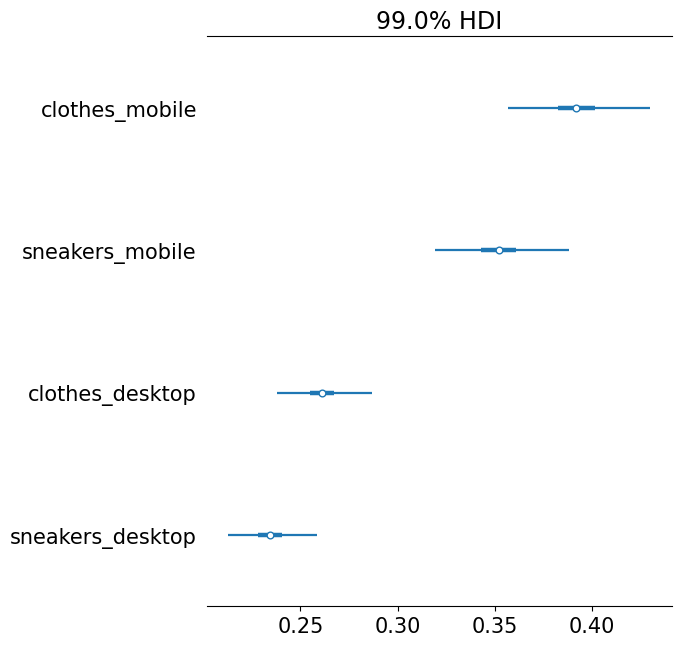

In [22]:
arviz.plot_forest(ads_costs, hdi_prob=0.99, textsize=15)
plt.show()

Now lets see what we got in the chart, if we the goal that we have is to reduce cost then going for the sneakers campaign on desktop device would be a good decision!

Decision Analyst Example for a Profit! 💹
 now we know which ads has the least and the most cost. but what about profit? lets imagined that the expected revenue per click from a mobile as is $ 4 and the one from the desktop is $$ 3. lets get started!

In [ ]:
# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": clothes_num_clicks * 4 - ads_costs["clothes_mobile"], #revenue is profit - cost
    "sneakers_mobile": sneakers_num_clicks * 4 - ads_costs["sneakers_mobile"],
     "clothes_desktop": clothes_num_clicks * 3 - ads_costs["clothes_desktop"],
    "sneakers_desktop": sneakers_num_clicks * 3 - ads_costs["sneakers_desktop"]
}

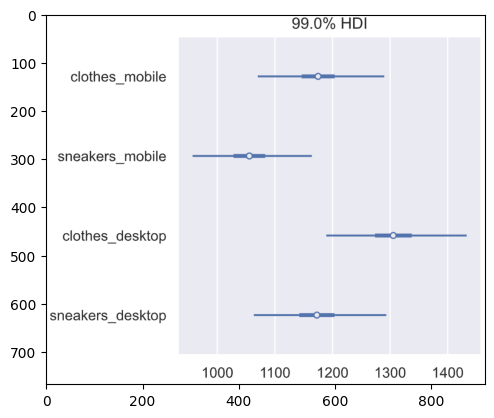

In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("/content/Screenshot 2024-03-16 at 20.34.26.png")
plt.imshow(image)
plt.show()

Now when look at the profit, investing in clothes desktop ads is a good idea! 👍